# Proyecto de Ciencia de Datos Aplicada 2025-20


En este notebook se realiza la exploración y limpieza de los datos, con el find e ser usados posteriormente en análisis estádisticos.

Librerias

In [993]:
import pandas as pd
import numpy as np
import json

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns


Archivos usados en este notebook

In [994]:
EXCEL_PATH = "/content/Base infecciones POPTH.xlsx"
CODEBOOK_PATH = "/content/new_codebook.json"

In [995]:
NO_APLICA = np.nan
GENERAL_MISSING = -1

# **1. Entendimiento inicial**

Se carga el dataset

In [996]:
#df = pd.read_excel(EXCEL_PATH, sheet_name="Base de datos principal") #HOJA ORIGINAL
df = pd.read_excel(EXCEL_PATH, sheet_name="BD") #HOJA CON PRIMERA FILA BORRADA
# formatear el nombre de las columnas, algunas tienen espacios al inicio o final
df.columns = df.columns.str.strip()

Se revisan las dimensiones del dataset.

In [997]:
print("Número de columnas(variables):", df.shape[1])
print("Número de filas (pacientes):", df.shape[0])

Número de columnas(variables): 60
Número de filas (pacientes): 557


Se listan los atributos (columnas) del dataset y sus tipos

In [998]:
df.dtypes

,0
#Paciente_Tx,int64
Año_Tx,int64
Fecha_Tx,datetime64[ns]
Código anonimizado,object
Edad,int64
Sexo,int64
Etiología_#1,int64
Etiología_#2,int64
Child_Pugh_Score,object
Meld_Score,object


In [999]:
# contar tipos de datos
df.dtypes.value_counts()

,count
object,23
float64,22
int64,14
datetime64[ns],1


Se muestran las primeras filas para entender la estructura de los datos

In [1000]:
df.head()

,#Paciente_Tx,Año_Tx,Fecha_Tx,Código anonimizado,Edad,Sexo,Etiología_#1,Etiología_#2,Child_Pugh_Score,Meld_Score,...,Inmunosupresión_con_Anticuerpos,Inmunosupresor_1_1mesPostTx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx,Vivo_Hoy,Fecha_Control/Muerte,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS
0,1,2009,2009-01-03,P001,62,1,1,0,3,18,...,1.0,1.0,1.0,2.0,1.0,0,40091,275,9.17,0.76
1,2,2009,2009-01-10,P002,62,1,3,0,2,17,...,9999.0,9999.0,9999.0,9999.0,9999.0,0,39824,1,0.03,0.00
2,3,2009,2009-02-03,P003,56,2,8,0,1,15,...,9999.0,1.0,1.0,1.0,0.0,1,45291,5444,181.47,15.12
3,4,2009,2009-02-05,P004,58,1,3,0,1,9,...,1.0,1.0,1.0,1.0,0.0,1,45291,5442,181.40,15.12
4,5,2009,2009-02-11,P005,62,2,4,0,2,22,...,9999.0,1.0,1.0,2.0,1.0,1,45291,4724,157.47,13.12


# **2. Análisis de calidad y preparación de datos**

Dimensiones de calidad:
1. Completitud: Valores nulos​
2. Unicidad: Detectar valores duplicados
3. Consistencia: Validación de los tipos de datos

In [1001]:
#Revisamos valores nulos sobre todo el dataset
display(df.isna().sum().sort_values(ascending=False))
numero_filas_con_nulos = df.isna().any(axis=1).sum()
print(f"Número de filas con al menos un valor nulo: {numero_filas_con_nulos}, lo que representa el {numero_filas_con_nulos / df.shape[0] * 100:.2f}% del total de filas.")


,0
Localización de la infección,479
Germen/Microorganismo aislado,479
Fecha_Egreso_UCI,429
Fecha_Egreso_Hospitalario,369
Antibiotico_previo_al_Tx,300
Tiempo_Isquemia_Fria,178
Tiempo_Isquemia_caliente,136
Hipertensión_Arterial,127
Inmunosupresor_2_6mesesPostTx,11
Inmunosupresor_1_6mesesPostx,11


Número de filas con al menos un valor nulo: 555, lo que representa el 99.64% del total de filas.


In [1002]:
# Revisamos duplicados sobre todo el dataset
num_duplicados = df.duplicated().sum()
print(f"Número de duplicados: {num_duplicados} (%{num_duplicados/len(df)*100:.2f})")

Número de duplicados: 0 (%0.00)


In [1003]:
# conservar datos completos
df_clean = df.dropna()
print("Número de filas sin nulos:", df_clean.shape[0])

Número de filas sin nulos: 2


### Codebook

En el archivo excel entregado por el cliente, se encuentra una hoja llamada "Codificación" que contiene la descripción de cada variable en el dataset. En caso de ser una variable categorica, incluye la codificación. A continuación se carga dicha hoja de excel.

In [1004]:
df_codebook_original = pd.read_excel(EXCEL_PATH, sheet_name="Codificación")

In [1005]:
df_codebook_original.columns = df_codebook_original.columns.str.strip()

In [1006]:
print("Número de columnas(variables):", df_codebook_original.shape[1])

Número de columnas(variables): 69


Ahora revisamos la estructura del dataframe con la codificación

In [1007]:
df_codebook_original

,#Paciente_Tx,Año_Tx,Fecha_Tx,ID,Nombre,Edad,Sexo,Etiología_#1,Etiología_#2,Child_Pugh_Score,...,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS,#,ID.1,Nombre,Infección POP,Tipo de infección,Aislamiento,Fecha
0,Interpretación,Año del trasplante,Tiempo transcurrido \ndesde el trasplante \nhe...,ID del paciente,Nombre del paciente,Tiempo transcurrido \na partir del \nnacimient...,"Condición orgánica, \nmasculina o \nfemenina",Enfermedad que \nlo llevó a la \nenfermedad he...,Enfermedad que \nlo llevó a la \nenfermedad he...,Child_Pugh_Score,...,Sobrevida en días post trasplante,Sobrevida en meses post trasplante,Sobrevida en años post trasplante,0.0,NaN,NaN,No,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NINGUNA,NINGUNA,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,Sí,ISO,K. PNEUMONIAE,NaN
2,1,NaN,NaN,NaN,NaN,NaN,M,HCV,HCV,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,IVU,CMV,NaN
3,2,NaN,NaN,NaN,NaN,NaN,F,HBV,HBV,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NEUMONÍA,ENTEROCOCO FAECIUM,NaN
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NASH,NASH,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,CVC,STREPTOCOCCUS VIRIDANS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Revisando se encontraron los siguientes problemas:
 - Hay más variables en el codebook entregado que en el dataset.
 - Hay algunas variables en el codebook que no existen en el dataset entregado o que tienen nombres diferentes.
 - No todas las variables categoricas incluyen la descripción de la codificaicón. Y en muchos casos no la siguen.



Teniendo en cuenta lo anterior, se procedió a crear un nuevo diccionario de datos.

In [1008]:
# obtener la primera fila del DataFrame, contiene las descripciones
df_original = pd.read_excel(EXCEL_PATH, sheet_name="Base de datos principal")
df_original.columns = df_original.columns.str.strip()
first_row = df_original.iloc[0].reset_index()

In [1009]:
df_codebook_new = first_row.copy()
df_codebook_new.columns = ["Column", "Description"]
df_codebook_new["Column"] = df_codebook_new["Column"].str.strip()
df_codebook_new["Description"] = df_codebook_new["Description"].str.strip().str.replace("\n", "")
df_codebook_new["Dtype"] = df_codebook_new["Column"].map(df.dtypes.astype(str))
df_codebook_new

,Column,Description,Dtype
0,#Paciente_Tx,Número de paciente,int64
1,Año_Tx,Año del trasplante,int64
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,datetime64[ns]
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object
4,Edad,Tiempo transcurrido a partir del nacimiento de...,int64
5,Sexo,"Condición orgánica, masculina o femenina",int64
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64
8,Child_Pugh_Score,Child_Pugh_Score,object
9,Meld_Score,Meld_Score,object


In [1010]:
def creat_dic(col_name, df_codebook_original):
    dic_column = {}
    # Solo intentar si la columna existe en el codebook original
    if col_name in df_codebook_original.columns:
        df_column = df_codebook_original[col_name].loc[1:]
        df_column.index = df_column.index-1
        dic_column = df_column.to_dict()
        # Elimina del diccionario todas las llaves cuyos valores son NaN.
        dic_column = {key: value for key, value in dic_column.items() if not pd.isna(value)}

    else:
        print(f"Columna '{col_name}' no encontrada en el codebook original.")
    return dic_column


# 2. Aplicar la lógica de mapeo y limpieza en un solo paso
df_codebook_new["Choices"] = df_codebook_new["Column"].map(lambda col: creat_dic(col, df_codebook_original))

# 3. Mostrar el resultado
display(df_codebook_new)

Columna 'Código anonimizado' no encontrada en el codebook original.
Columna 'Tiempo_Isquemia_caliente' no encontrada en el codebook original.


,Column,Description,Dtype,Choices
0,#Paciente_Tx,Número de paciente,int64,"{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: ..."
1,Año_Tx,Año del trasplante,int64,{}
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,datetime64[ns],{}
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{}
4,Edad,Tiempo transcurrido a partir del nacimiento de...,int64,{}
5,Sexo,"Condición orgánica, masculina o femenina",int64,"{1: 'M', 2: 'F'}"
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ..."
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ..."
8,Child_Pugh_Score,Child_Pugh_Score,object,{}
9,Meld_Score,Meld_Score,object,{}


In [1011]:
df_codebook_new.at[0, "Choices"] = {}
df_codebook_new["Var Type"] = np.where(df_codebook_new["Choices"] == {}, "Numerical", "Categorical")

In [1012]:
map_to_categorical = ["Nutrición_Enteral", "Complicaciones_Técnicas"]
df_codebook_new.loc[df_codebook_new["Column"].isin(map_to_categorical), "Var Type"] = "Categorical"

map_to_texto = ["Código anonimizado"]
df_codebook_new.loc[df_codebook_new["Column"].isin(map_to_texto), "Var Type"] = "Texto"

In [1013]:
df_codebook_new

,Column,Description,Dtype,Choices,Var Type
0,#Paciente_Tx,Número de paciente,int64,{},Numerical
1,Año_Tx,Año del trasplante,int64,{},Numerical
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,datetime64[ns],{},Numerical
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{},Texto
4,Edad,Tiempo transcurrido a partir del nacimiento de...,int64,{},Numerical
5,Sexo,"Condición orgánica, masculina o femenina",int64,"{1: 'M', 2: 'F'}",Categorical
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ...",Categorical
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ...",Categorical
8,Child_Pugh_Score,Child_Pugh_Score,object,{},Numerical
9,Meld_Score,Meld_Score,object,{},Numerical


In [1014]:
# guardar el nuevo diccionario de datos como un archivo JSON
with open(CODEBOOK_PATH, "w", encoding="utf-8") as f:
    json.dump(df_codebook_new.set_index("Column").to_dict(orient="index"), f, ensure_ascii=False, indent=3)

# **3. Análisis univariado**

In [1015]:
# cargar codebook como dataframe
df_codebook = pd.read_json(CODEBOOK_PATH, orient="index")

In [1016]:
df_codebook

,Description,Dtype,Choices,Var Type
#Paciente_Tx,Número de paciente,int64,{},Numerical
Año_Tx,Año del trasplante,int64,{},Numerical
Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,datetime64[ns],{},Numerical
Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{},Texto
Edad,Tiempo transcurrido a partir del nacimiento de...,int64,{},Numerical
Sexo,"Condición orgánica, masculina o femenina",int64,"{'1': 'M', '2': 'F'}",Categorical
Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,int64,"{'0': 'NINGUNA', '1': 'HCV', '2': 'HBV', '3': ...",Categorical
Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,int64,"{'0': 'NINGUNA', '1': 'HCV', '2': 'HBV', '3': ...",Categorical
Child_Pugh_Score,Child_Pugh_Score,object,{},Numerical
Meld_Score,Meld_Score,object,{},Numerical


In [1017]:
# Vamos a crear una copia del DataFrame original para hacer las limpiezas sugeridas, luego de consultar con el experto
df_clean = df.copy()

In [1018]:
filter_num = df_codebook['Var Type'] == 'Numerical'
df_codebook_num = df_codebook[filter_num]
num_vars = df_codebook_num.index.to_list()
df_codebook_num

,Description,Dtype,Choices,Var Type
#Paciente_Tx,Número de paciente,int64,{},Numerical
Año_Tx,Año del trasplante,int64,{},Numerical
Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,datetime64[ns],{},Numerical
Edad,Tiempo transcurrido a partir del nacimiento de...,int64,{},Numerical
Child_Pugh_Score,Child_Pugh_Score,object,{},Numerical
Meld_Score,Meld_Score,object,{},Numerical
Peso_previo_Cx,Peso en Kilogramos,float64,{},Numerical
Talla,Talla en cms,int64,{},Numerical
IMC,Indice de masa corporal,float64,{},Numerical
Dias_Estancia_Hospitalaria,Días totales de hospitalización,float64,{},Numerical


## Funciones auxiliares

In [1019]:
from matplotlib.patches import Patch

def graficar_var_categorica(df, columna, nombre_columna=None, show_legend=False, include_na=False, ordinal=True):
    """
    Grafica barras de una variable categórica con porcentajes sobre cada barra.
    - Si 'ordinal' es True, ordena las categorías en orden ascendente. Si es False, ordena por frecuencia descendente.
    - Opcional: incluye NaN como categoría.
    """
    nombre_columna = nombre_columna or columna

    if columna not in df_codebook.index:
        show_legend = False  # desactivar leyenda si no hay encoding
    else:
        encoding = df_codebook.loc[columna, "Choices"]

    # Preparar datos (opcionalmente incluir NaN como categoría visible)
    serie = df[columna]
    if include_na:
        serie = serie.fillna("NA")

    # Determinar el orden de las categorías
    if ordinal:
        # Orden ascendente para ordinales
        counts = serie.value_counts().sort_index()
    else:
        # Orden descendente por frecuencia para nominales
        counts = serie.value_counts(ascending=False)

    order = counts.index.tolist()
    percentages = (counts / counts.sum() * 100).values
    print(f"Orden de categorías para '{columna}': {order}")

    # Paleta
    #pastel = sns.color_palette("pastel") + sns.color_palette("bright")
    #n = len(order) if order is not None else serie.nunique(dropna=False)
    #pastel = pastel[:n]

    n = len(order)
    pal = sns.husl_palette(n)  # n colores distintos, sin warnings

    # Gráfico
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(data=serie.to_frame(), x=columna, order=order, palette=pal, hue=columna, legend=False)
    ax.set_title(f"Distribución por {nombre_columna}")
    ax.set_xlabel(nombre_columna)
    ax.set_ylabel("Frecuencia")

    # Anotar porcentajes - usar las barras en el orden correcto
    for i, patch in enumerate(ax.patches):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        pct = percentages[i]
        ax.annotate(f"{pct:.1f}%", (x, y), ha='center', va='bottom', fontsize=10, fontweight="bold")

    # Estética
    plt.xticks(rotation=45)
    plt.tight_layout()


    # ----------- LEYENDA PERSONALIZADA: "#_descripción" -----------

    if show_legend:
        # normaliza claves del encoding a str para evitar mismatches int/str
        encoding_str = {str(k): v for k, v in encoding.items()}

        def fmt_label(code):
            key = str(code)
            # intento de casteo si vienen como '1.0' etc.
            if key not in encoding_str:
                try:
                    key = str(int(float(key)))
                except:
                    pass
            desc = encoding_str.get(key, "No especificado")
            return f"{code}: {desc}"

        handles = [Patch(facecolor=pal[i], label=fmt_label(code)) for i, code in enumerate(sorted(order))]

        # leyenda fuera del gráfico, a la derecha
        ax.legend(
            handles=handles,
            title=nombre_columna,
            loc="upper left",
            bbox_to_anchor=(1.02, 1.0),   # fuera del eje
            frameon=False,
            borderaxespad=0.0
        )

    # deja espacio para la leyenda externa
    plt.tight_layout()
    plt.subplots_adjust(right=0.78)  # ajusta este valor si la leyenda se corta
    plt.show()


#graficar_var_categorica(df_clean, "Etiología_#1", show_legend=True, ordinal=False)


In [1020]:
def graficar_var_numerica(df, columna_a_graficar, nombre_columa = None):

    nombre_columa = nombre_columa if nombre_columa else columna_a_graficar

    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

    columna_stats = df[columna_a_graficar].describe()
    # Histograma con KDE
    sns.histplot(x = df[columna_a_graficar], bins=50, kde=True, ax=ax1, color='lightblue')
    ax1.set_title(f'Distribución de {columna_a_graficar}')
    ax1.set_xlabel(nombre_columa)
    ax1.set_ylabel('Frecuencia')
    ax1.axvline(int(columna_stats['mean']), color='red', linestyle='--', label=f'Media: {int(columna_stats["mean"])}')
    ax1.axvline(int(columna_stats['50%']), color='blue', linestyle='--', label=f'Mediana: {int(columna_stats["50%"])}')
    ax1.legend()

    # Boxplot horizontal
    sns.boxplot(x=df[columna_a_graficar], ax=ax2, color='lightgreen', showmeans=True)
    ax2.set_title(f'Box Plot de {columna_a_graficar}')
    ax2.set_xlabel(nombre_columa)
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()

## Grupo 1 — Caracterización preoperatoria y comorbilidades (baseline)

Las variables inmersas dentro este grupo son:

In [1021]:
demograficas = ["Edad", "Sexo", "Etiología_#1", "Etiología_#2", "Child_Pugh_Score", "Meld_Score", "Diabetes_Mellitus", "Tabaquismo", "Alcoholismo", "Hipertensión_Arterial", "Peso_previo_Cx", "Talla", "IMC", "Antecedente_UCI_6_meses_PreOP", "UCI_al_Momento_Tx"]



**Edad**: Se refiere a la edad del paciente. Es una variable numérica discreta.

**Sexo**: Se refiere al sexo del paciente. En el data se evidencia como una variable numérica como valores (1 o 2), pero se tratará como una variable categórica.

Posteriormente, encontramos 2 variables referentes a Etiología: **Etiología_#1** y **Etiología_#2**. Estas refieren a posibles causas de la enfermedad del paciente. Ambas son de caracter numérico discreto, con valores entre 0 y 25. Se tratará como variable categórica ya que cada una refiere al código de una causa.

**Child_Pugh_Score**: Esta variable refiere al resultado del modelo Child_Pugh, el cual puede tener valor entre 5 y 15. De acuerdo con la universidad Francisco Marroquin (n.d), esta prueba se utiliza actualmente para pronosticar expectativa de vida de un paciente con daño hepático y que se encuentra en lista de espera para un transplante, lo genera en consecuencia un sentido de urgencia a la necesidad de un transplante de hígado. Ahora, esta prueba es el resultado de una puntación asignada a rangos de valores de mediciones en: Bilirrubina, Albúmina sérica, INR / Tiempo de protrombina, Ascitis y Encefalopatía hepática. Asimismo, la sumatoria de la puntación, o Child Pugh score, se puede clasificar en tres clases: A, B y C, para puntajes entre 5-6, 7-9 y 10-15; respectivamente. Un puntaje más bajo refiere una esperanza de supervivencia más alta en un periodo de 2 años.

| Clase | Rango de puntaje | Supervivencia a 1 año | Supervivencia a 2 años |
| ----- | ---------------- | --------------------: | ---------------------: |
| **A** | 5–6              |                 ~100% |                   ~85% |
| **B** | 7–9              |                  ~80% |                   ~60% |
| **C** | 10–15            |                  ~45% |                   ~35% |


**Meld_Score**:  El MELD (Model for End-Stage Liver Disease) es un puntaje que estima el riesgo de mortalidad a 90 días en pacientes con cirrosis/enfermedad hepática avanzada y guía la priorización para trasplante. Es un valor entre 6 y 40, que traduce la necesidad de un transplante de hígado, entre más alto sea el valor, mayor será la necesidad. Asimismo, existen rangos de valores los cuales tienen asociado una probabilidad de muerte en un periodo de 90 días: 6-9, 10-19, 20-29, 30-30, 40.

**Diabetes_Mellitus**: Una variable númerica, que refiere a 3 categorías. 1 Para Diabetes tipo 1, 2 para Diabetes tipo 2 y 0 para la ausencia de diabetes en el paciente.

**Tabaquismo**: Variable binaria que indica que si el paciente presenta tabaquismo: 1 si presenta, 0 de lo contrario.

**Alcoholismo**: Variable binaria que indica que si el paciente presenta alcoholismo: 1 si presenta, 0 de lo contrario.

**Hipertensión_Arterial**: Variable binaria que indica que si el paciente presenta hipertensión arterial: 1 si presenta, 0 de lo contrario.

**Peso_previo_Cx**: Variable numérica continua que indica el peso del paciente previo a la cirugía.

**Talla**: Variable numérica discreta que indica la altura en centímetros del paciente.

**IMC**: Variable numérica continua que indica el índice de masa corporal en del paciente. Esta variable se usa dentro de la literatura para clasificar el paciente según su peso.

**Antecedente_UCI_6_meses_PreOP**: Variable binaria que indica que si el paciente tiene antecendente de asistencia a UCI en los 6 últimos meses previos a la operación: 1 si presenta, 0 de lo contrario.

**UCI_al_Momento_Tx**: Variable binaria que indica que si el paciente tiene antecendente de asistencia a UCI en el tiempo de tratamiento: 1 si presenta, 0 de lo contrario.




In [1022]:
df[demograficas].isna().sum()

,0
Edad,0
Sexo,0
Etiología_#1,0
Etiología_#2,0
Child_Pugh_Score,0
Meld_Score,1
Diabetes_Mellitus,0
Tabaquismo,0
Alcoholismo,0
Hipertensión_Arterial,127


In [1023]:
df[demograficas].dtypes

,0
Edad,int64
Sexo,int64
Etiología_#1,int64
Etiología_#2,int64
Child_Pugh_Score,object
Meld_Score,object
Diabetes_Mellitus,object
Tabaquismo,object
Alcoholismo,object
Hipertensión_Arterial,float64


### ``Peso_previo_Cx``

Peso en Kilogramos

In [1024]:
df["Peso_previo_Cx"].value_counts(dropna=False)

,count
Peso_previo_Cx,
0.0,271
65.0,17
70.0,15
63.0,13
62.0,12
...,...
65.6,1
91.0,1
160.0,1


In [1025]:
peso = df["Peso_previo_Cx"].copy()
# crear máscara para valores válidos, 0 Kg no tiene sentido
mask_valid = peso.between(1, 300)
# mapear a np.nan los valores inválidos
score_valid = peso.where(mask_valid, other=np.nan)
df_clean["Peso_previo_Cx"] = score_valid

### ``Talla``

Talla en cms

In [1026]:
df["Talla"].value_counts(dropna=False)

,count
Talla,
0,278
160,23
170,19
165,17
174,14
150,13
158,12
162,12
168,12


In [1027]:
talla = df["Talla"].copy()
# crear máscara para valores válidos, 0 cm no tiene sentido
mask_valid = talla.between(1, 272)
# mapear a np.nan los valores inválidos
score_valid = talla.where(mask_valid, other=np.nan)
df_clean["Talla"] = score_valid

### ``IMC``

In [1028]:
df["IMC"].value_counts(dropna=False)

,count
IMC,
0.00,287
26.22,4
24.22,4
29.40,4
25.39,3
...,...
25.67,1
31.89,1
25.33,1


In [1029]:
imc_calculated = df_clean["Peso_previo_Cx"] / ( (df_clean["Talla"]/100) **2 )
# crear máscara para valores válidos, 0 cm no tiene sentido
mask_valid = imc_calculated.between(10, 80)
# mapear a np.nan los valores inválidos
imc_valid = imc_calculated.where(mask_valid, other=np.nan)
df_clean["IMC"] = imc_valid.round(2)

### ``Child_Pugh_Score``

In [1030]:
df["Child_Pugh_Score"].value_counts(dropna=False)

,count
Child_Pugh_Score,
2,209
3,85
1,81
9,33
8,31
7,22
9999,20
11,19
10,17


In [1031]:
score = df["Child_Pugh_Score"].astype(str).str.strip()
mask_cat = score.isin(['A', 'B', 'C'])

# Asegura numérico (por si hay strings)
score_num = pd.to_numeric(score, errors="coerce")
mask_valid = score_num.between(5, 15)
# mapear a -1 los valores inválidos
score_valid = score_num.where(mask_valid, other=np.nan)

# Crea categorías: A=5–6, B=7–9, C=10–15
labels = ["A", "B", "C"]
score_cat = pd.cut(score_valid , bins=[-np.inf, 6, 9, 15], labels=labels, include_lowest=True)
score_cat.loc[mask_cat] = score.loc[mask_cat]

df_clean["Child_Pugh_Score"] = score_valid
df_clean["Child_Pugh_Score_Cat"] = score_cat

### ``Meld_Score``

In [1032]:
df["Meld_Score"].value_counts(dropna=False)

,count
Meld_Score,
22,114
14,42
11,40
12,38
15,30
13,29
10,27
17,24
16,23


In [1033]:
meld_score = df["Meld_Score"].astype(str).str.strip()
meld_score_num = pd.to_numeric(meld_score, errors="coerce")
meld_score_valid = meld_score_num.where(meld_score_num.between(6, 40), other=np.nan)
df_clean["Meld_Score"] = meld_score_valid

In [1034]:
df_clean["Meld_Score"].value_counts(dropna=False)

,count
Meld_Score,
22.0,114
14.0,42
11.0,40
12.0,38
15.0,30
13.0,29
10.0,27
17.0,24
16.0,23


### graficas var númericas

In [1035]:
num_vars = ["Edad","Child_Pugh_Score", "Meld_Score", "Peso_previo_Cx", "Talla", "IMC"]

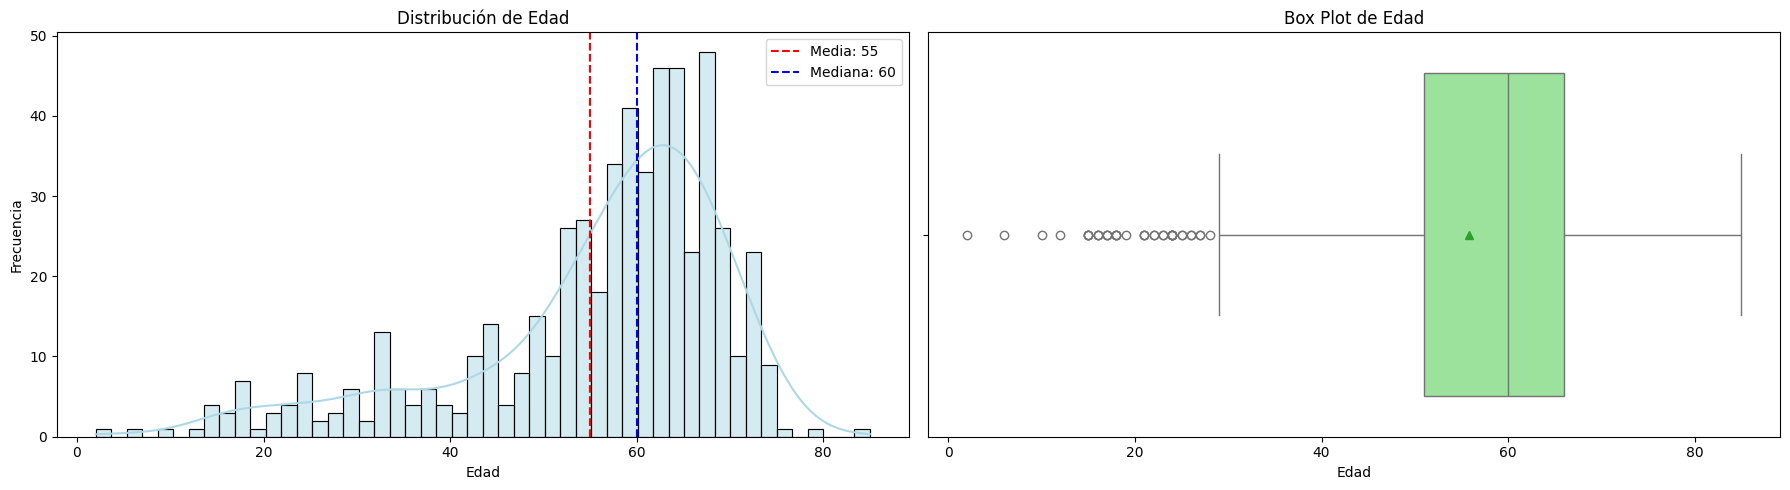

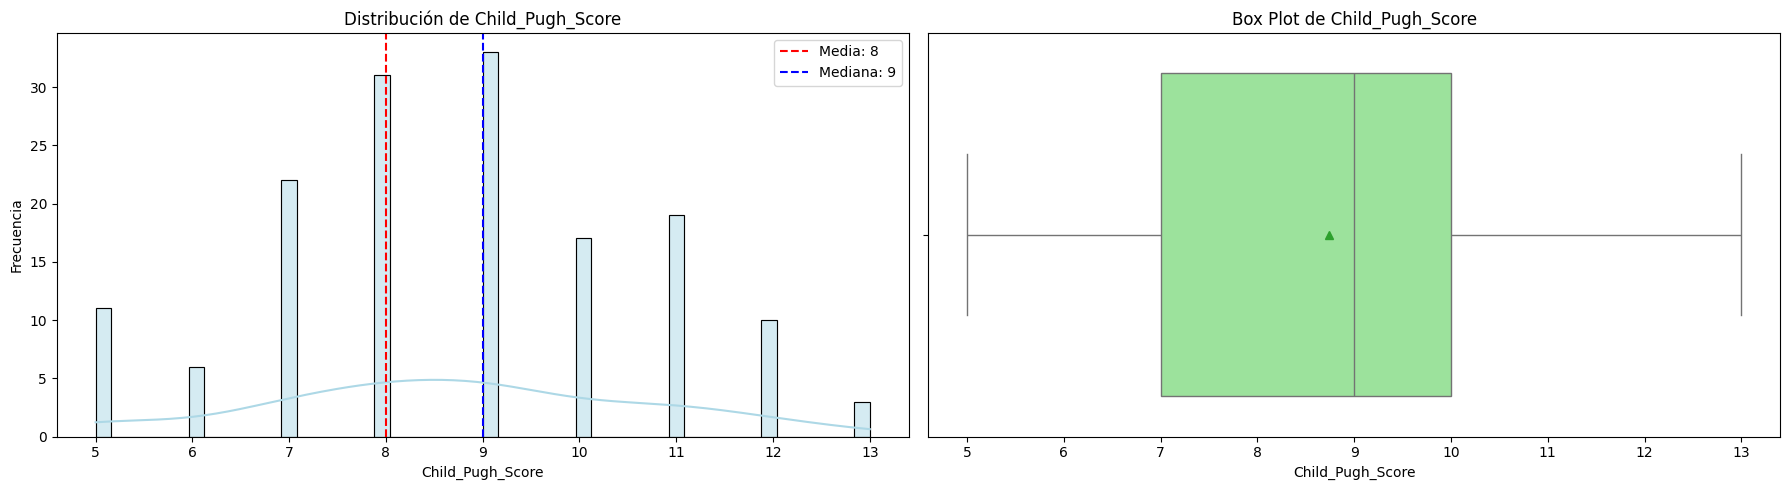

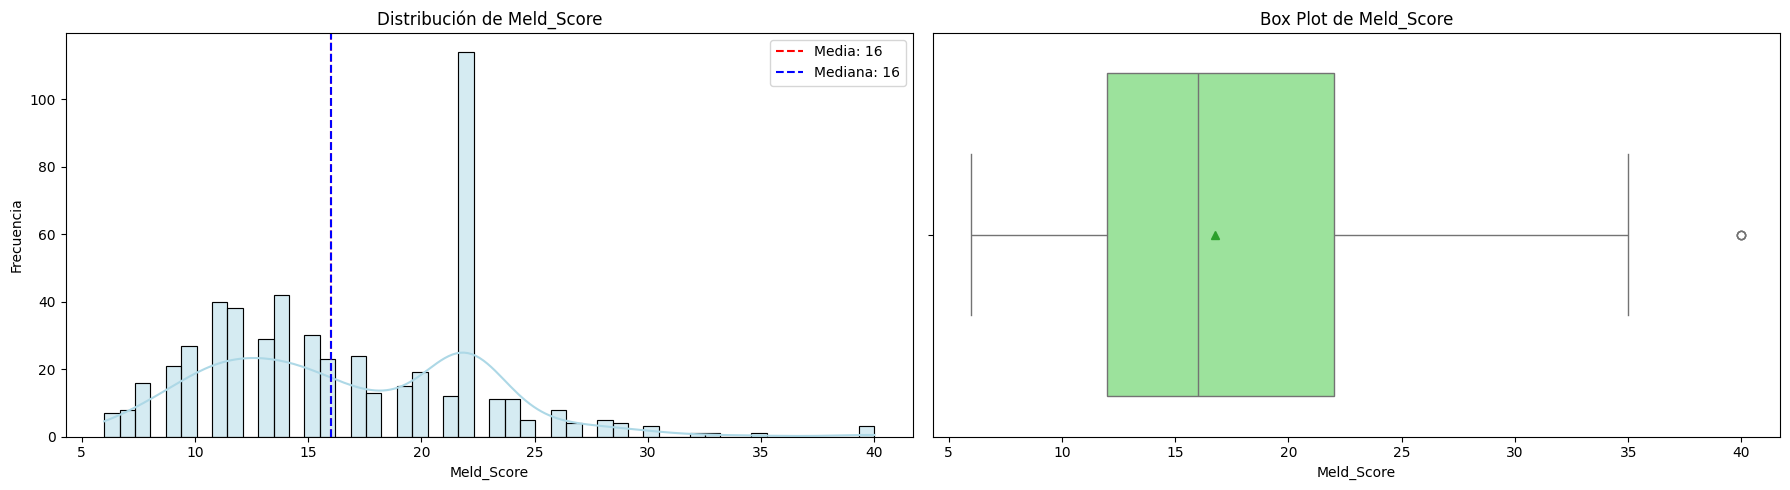

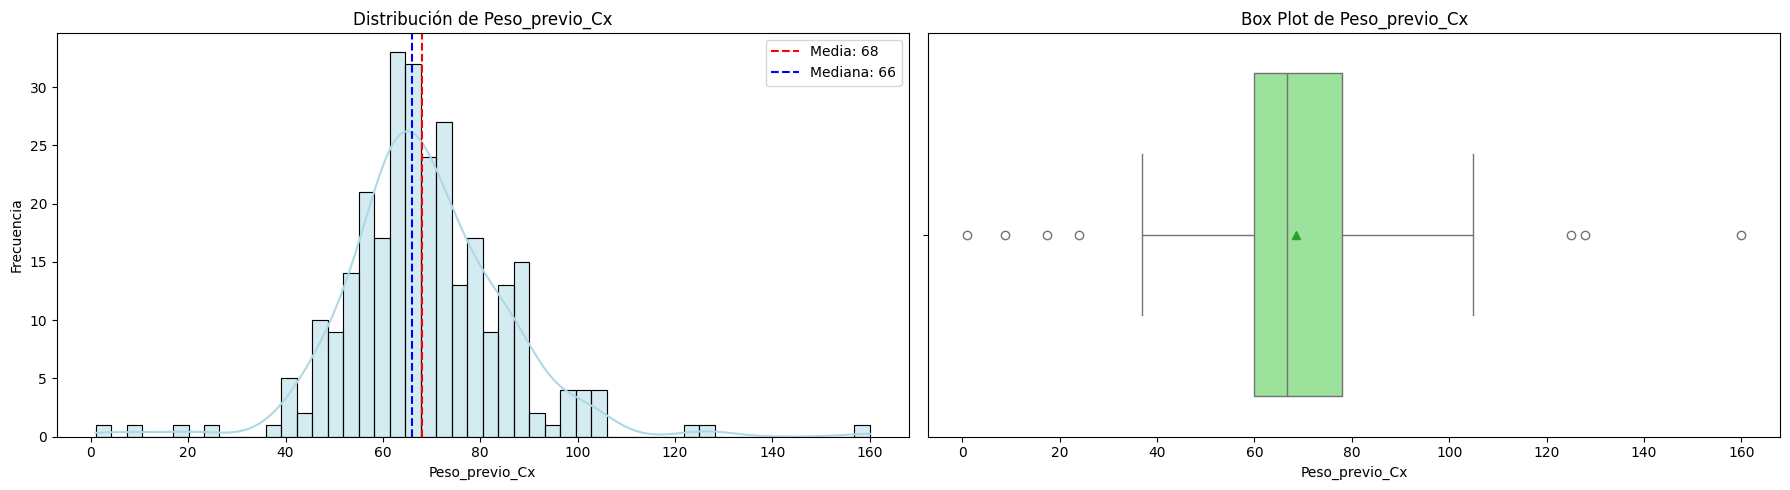

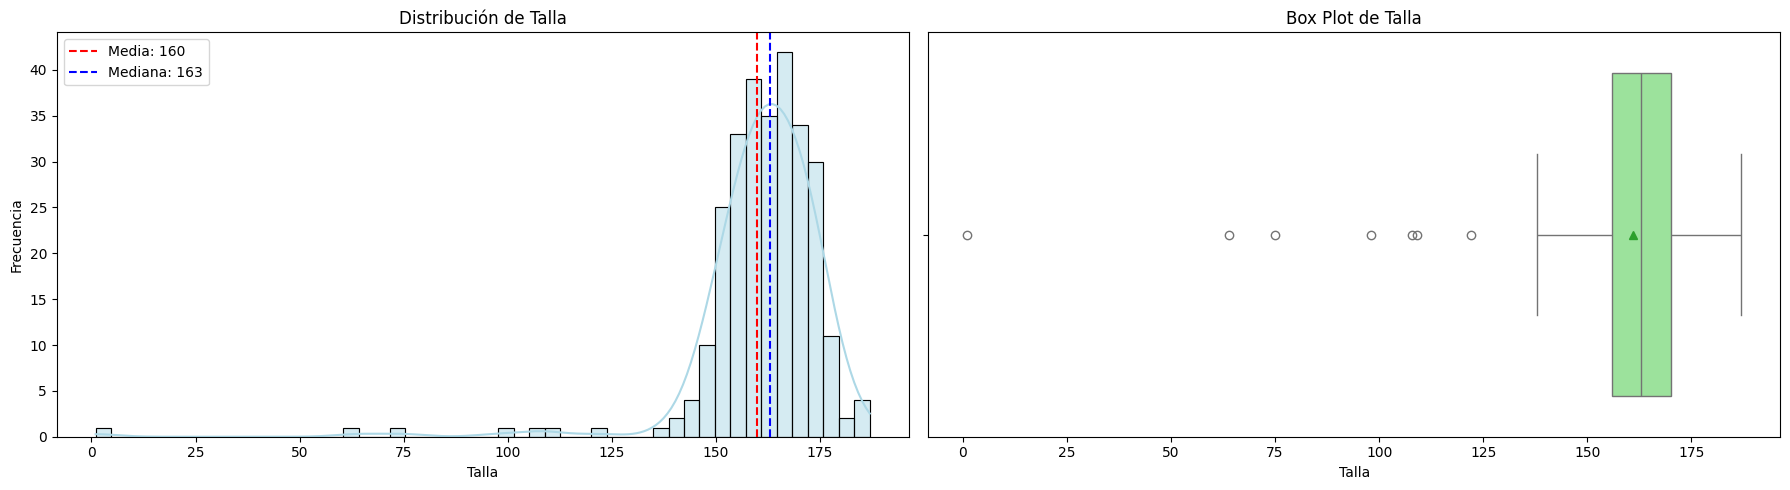

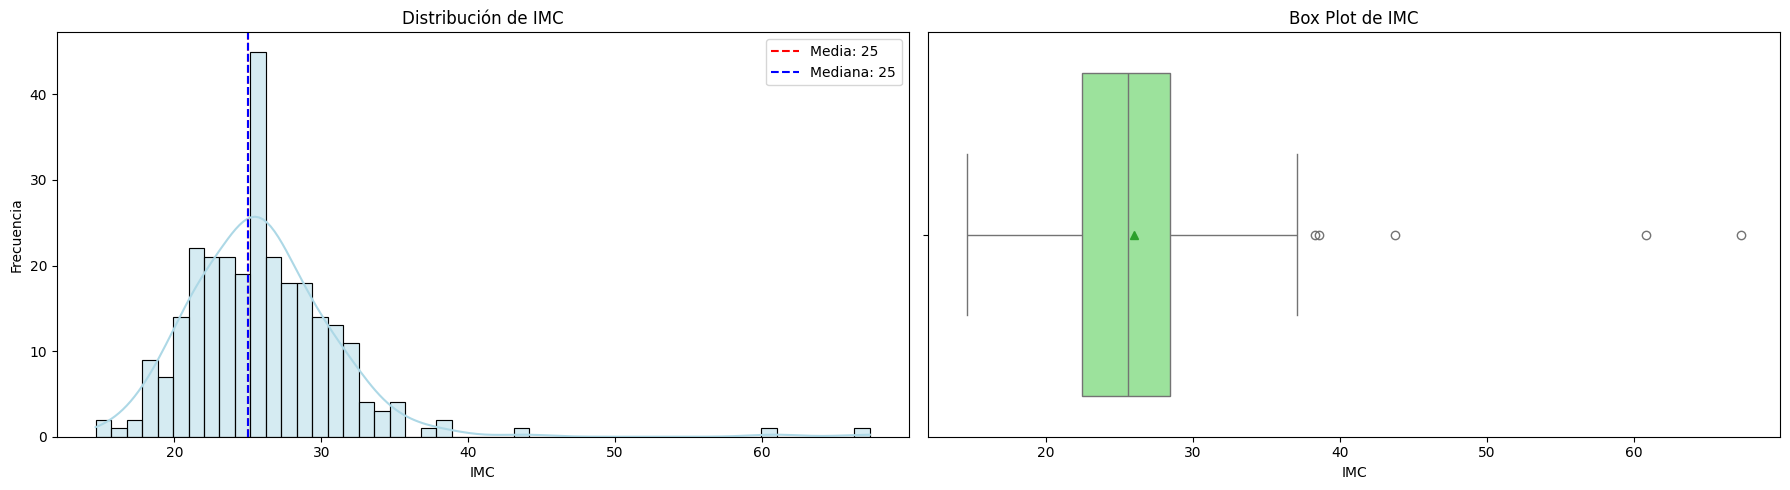

In [1036]:
for var in num_vars:
    try:
        graficar_var_numerica(df_clean, var)
    except Exception as e:
        print(f"Error al graficar {var}: {e}")

### ``Diabetes_Mellitus``

In [1037]:
df["Diabetes_Mellitus"].value_counts()

,count
Diabetes_Mellitus,
0,386
1,161
,5
9999,4
2,1


In [1038]:
esDiabetico = df["Diabetes_Mellitus"].copy()
mask_valid = esDiabetico.isin([0, 1])
esDiabetico[~mask_valid] = np.nan
df_clean["Diabetes_Mellitus"] = pd.to_numeric(esDiabetico, errors="coerce").astype('Int64')

### ``Tabaquismo``

In [1039]:
df["Tabaquismo"].value_counts(dropna=False)

,count
Tabaquismo,
0,382
1,170
,5


In [1040]:
esTabaquismo = df["Tabaquismo"].copy()
mask_valid = esTabaquismo.isin([0, 1])
esTabaquismo[~mask_valid] = np.nan
df_clean["Tabaquismo"] = pd.to_numeric(esTabaquismo, errors="coerce").astype('Int64')

In [1041]:
df_clean["Tabaquismo"].value_counts(dropna=False)

,count
Tabaquismo,
0,382
1,170
<NA>,5


### ``Hipertensión_Arterial``

In [1042]:
df["Hipertensión_Arterial"].value_counts()

,count
Hipertensión_Arterial,
0.0,347
1.0,83


In [1043]:
df_clean["Hipertensión_Arterial"] = pd.to_numeric(df["Hipertensión_Arterial"], errors="coerce").astype('Int64')

### ``Alcoholismo``


In [1044]:
df["Alcoholismo"].value_counts()

,count
Alcoholismo,
0,359
1,193
,5


In [1045]:

df_clean["Alcoholismo"] = pd.to_numeric(df["Alcoholismo"], errors="coerce").astype('Int64')

### ``Antecedente_UCI_6_meses_PreOP``

In [1046]:
df["Antecedente_UCI_6_meses_PreOP"].value_counts()

,count
Antecedente_UCI_6_meses_PreOP,
0,447
1,103
9999,5
1*,1


In [1047]:
serie = df["Antecedente_UCI_6_meses_PreOP"].astype(str).str.strip()
mask_1 = df["Antecedente_UCI_6_meses_PreOP"].isin(["1*"])
serie[mask_1] = "1"
mask_valid = serie.isin(["0", "1"])
serie[~mask_valid] = np.nan
df_clean["Antecedente_UCI_6_meses_PreOP"] = pd.to_numeric(serie, errors="coerce").astype('Int64')

### ``UCI_al_Momento_Tx``

In [1048]:
df["UCI_al_Momento_Tx"].value_counts()

,count
UCI_al_Momento_Tx,
0.0,511
1.0,43
9.0,1
9999.0,1


In [1049]:
esUCI = df["UCI_al_Momento_Tx"].copy()
mask_valid = esUCI.isin([0, 1])
esUCI[~mask_valid] = np.nan
df_clean["UCI_al_Momento_Tx"] = pd.to_numeric(esUCI, errors="coerce").astype('Int64')

### ``Etiología_#1``

In [1050]:
df_clean["Etiología_#1"].value_counts(dropna=False)

,count
Etiología_#1,
3,143
4,92
1,78
8,62
11,44
9,41
12,19
23,16
10,11


### graficas categoricas

In [1051]:
cat_vars = ["Sexo","Etiología_#1", "Etiología_#2","Diabetes_Mellitus", "Tabaquismo", "Alcoholismo", "Hipertensión_Arterial",  "Antecedente_UCI_6_meses_PreOP", "UCI_al_Momento_Tx"]

Orden de categorías para 'Sexo': [1, 2]


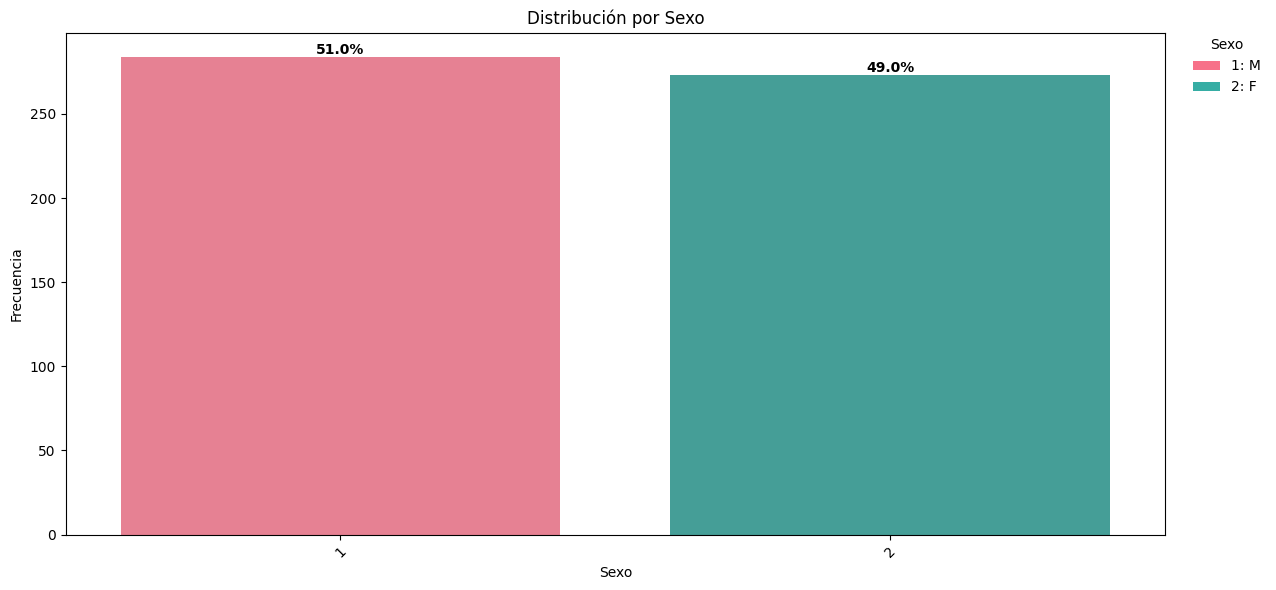

Orden de categorías para 'Etiología_#1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23, 25, 27]


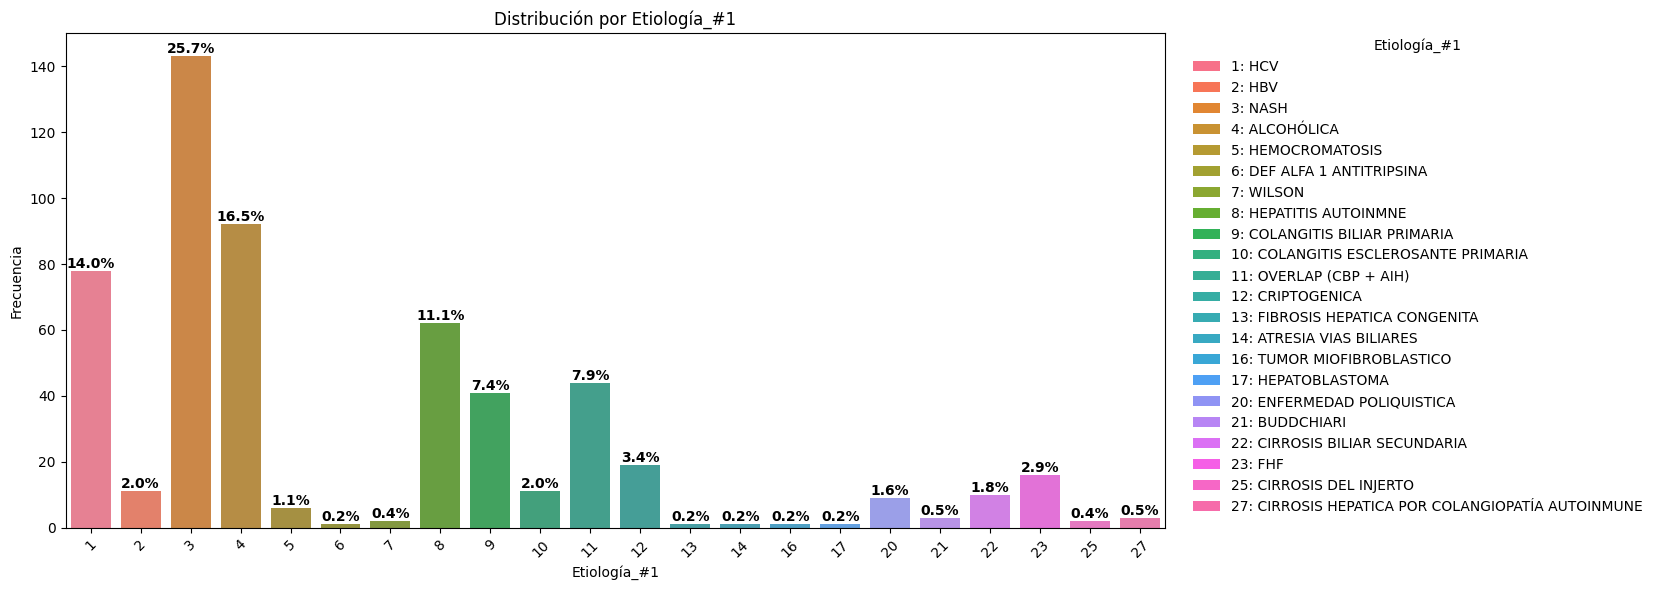

Orden de categorías para 'Etiología_#2': [0, 2, 3, 4, 5, 8, 9, 10, 21, 25]


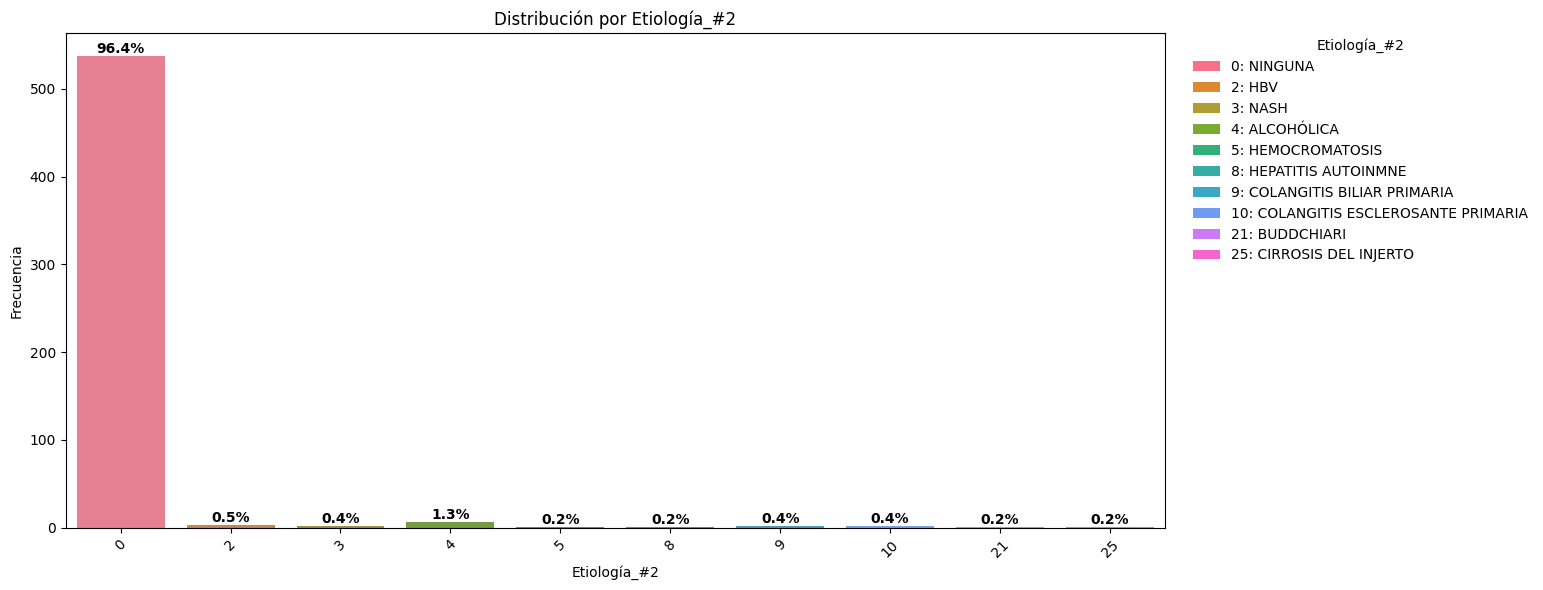

Orden de categorías para 'Diabetes_Mellitus': [0, 1]


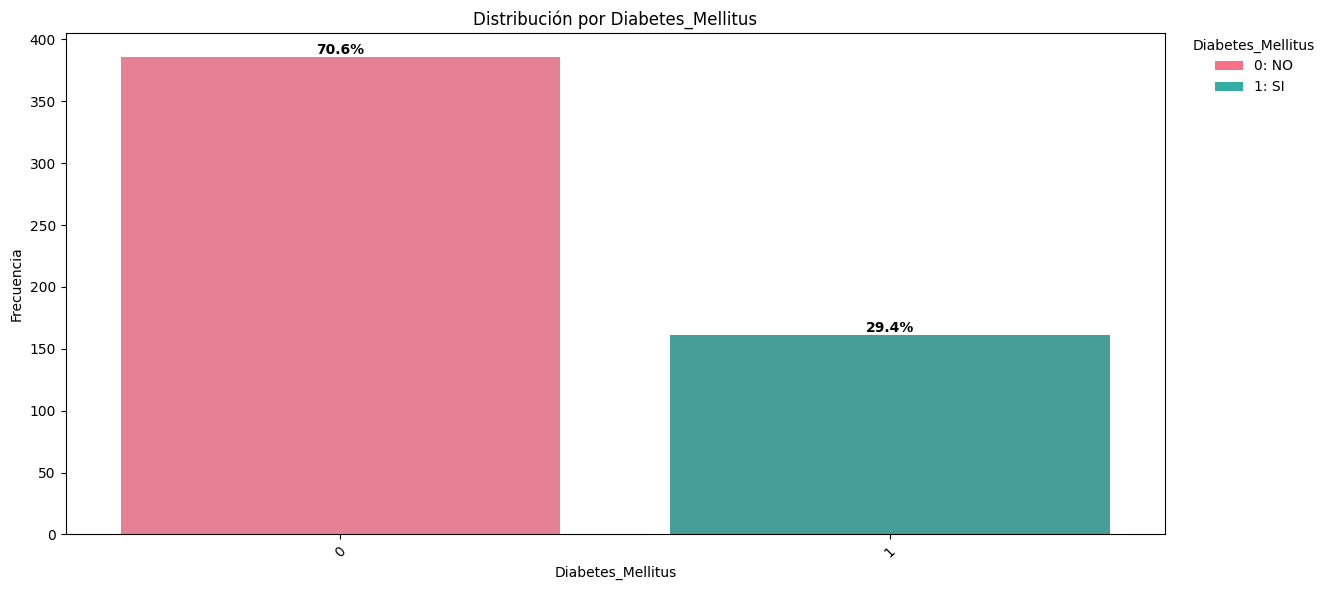

Orden de categorías para 'Tabaquismo': [0, 1]


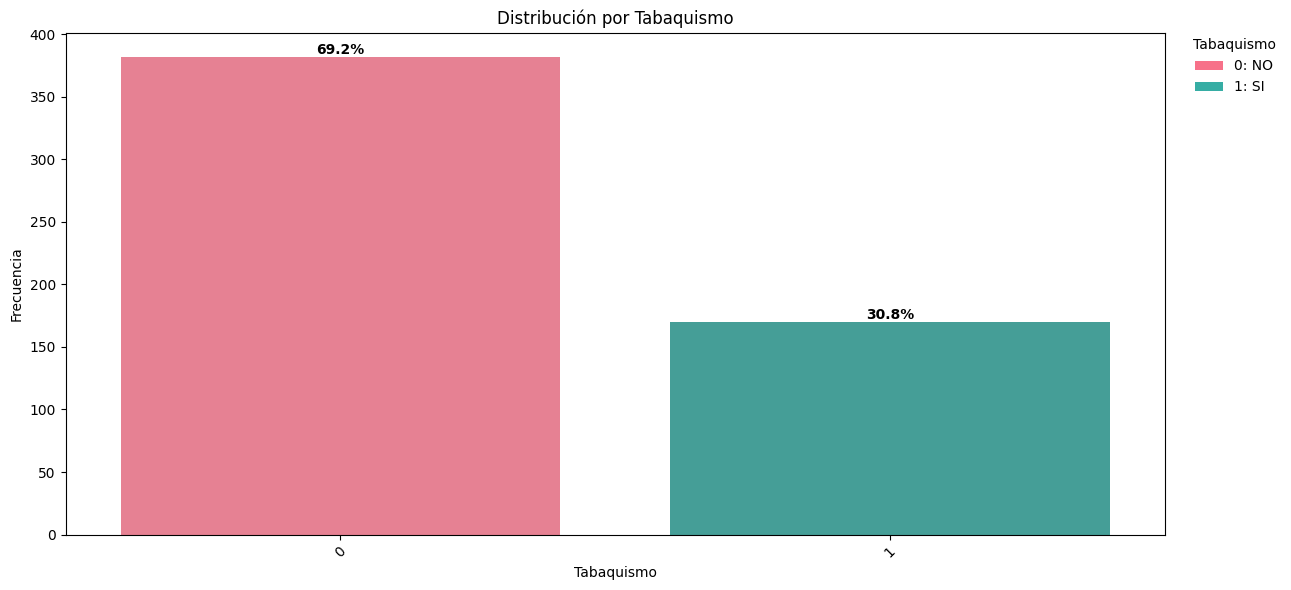

Orden de categorías para 'Alcoholismo': [0, 1]


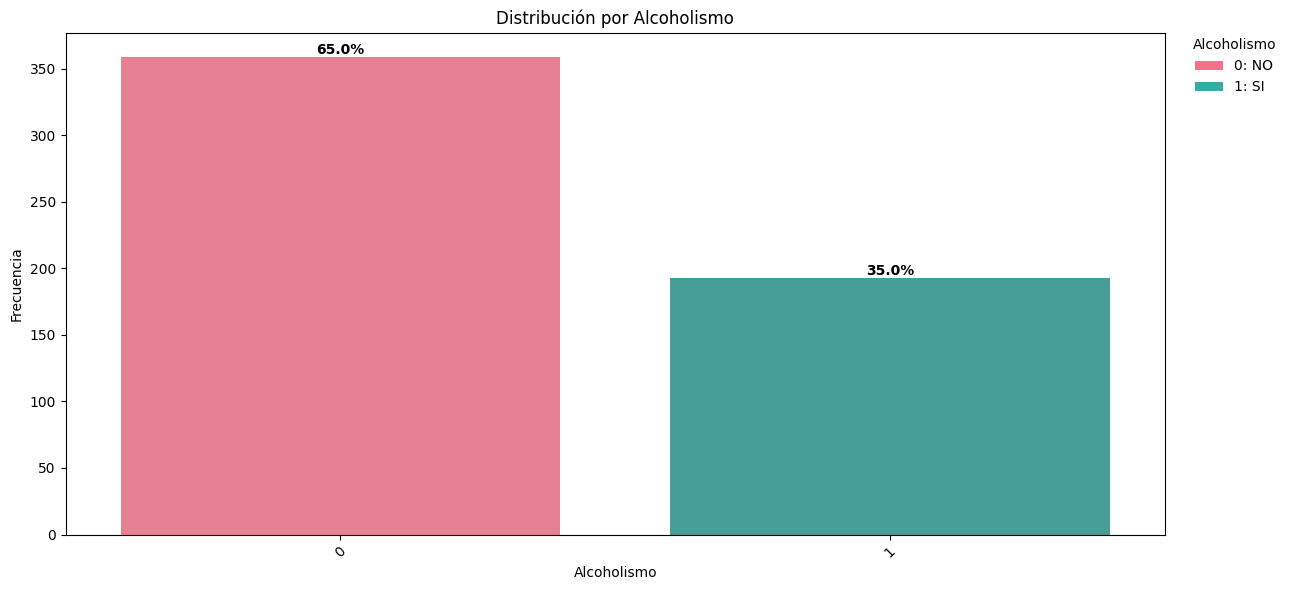

Orden de categorías para 'Hipertensión_Arterial': [0, 1]


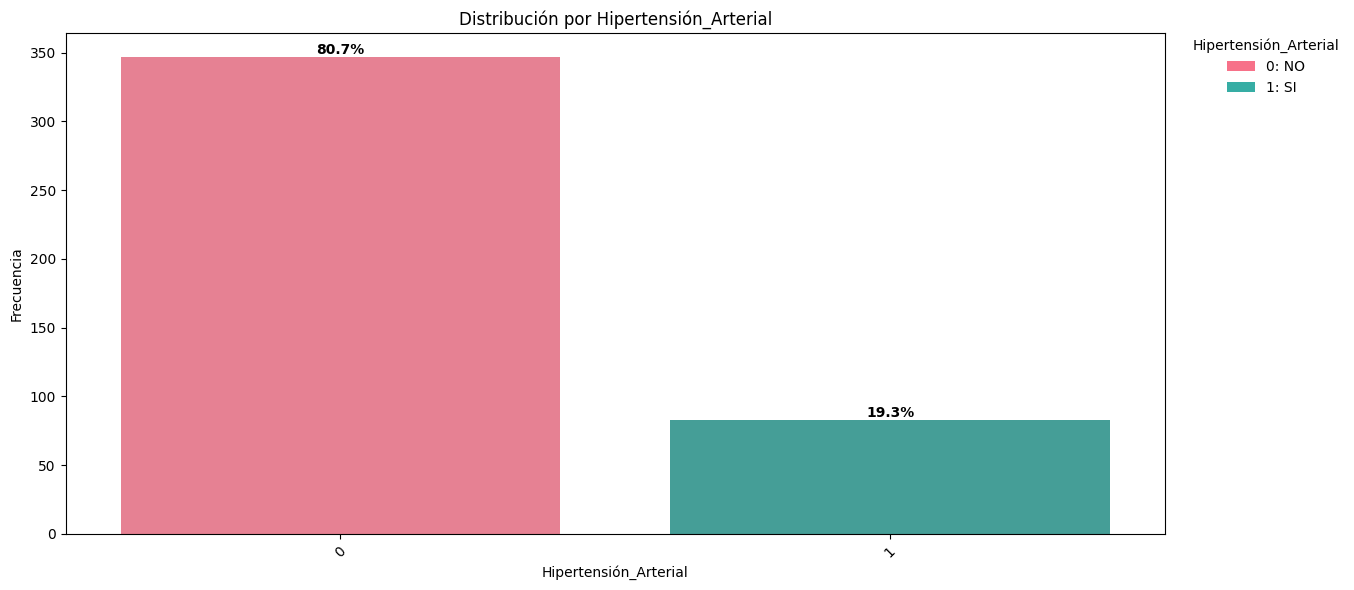

Orden de categorías para 'Antecedente_UCI_6_meses_PreOP': [0, 1]


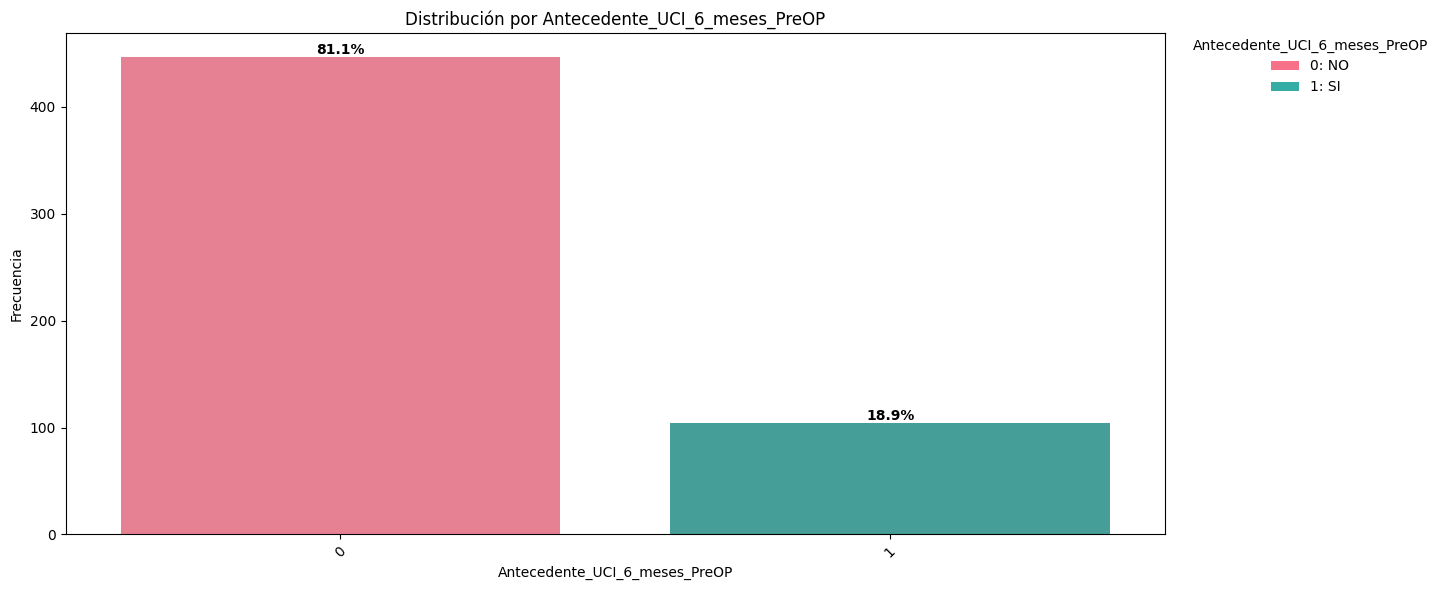

Orden de categorías para 'UCI_al_Momento_Tx': [0, 1]


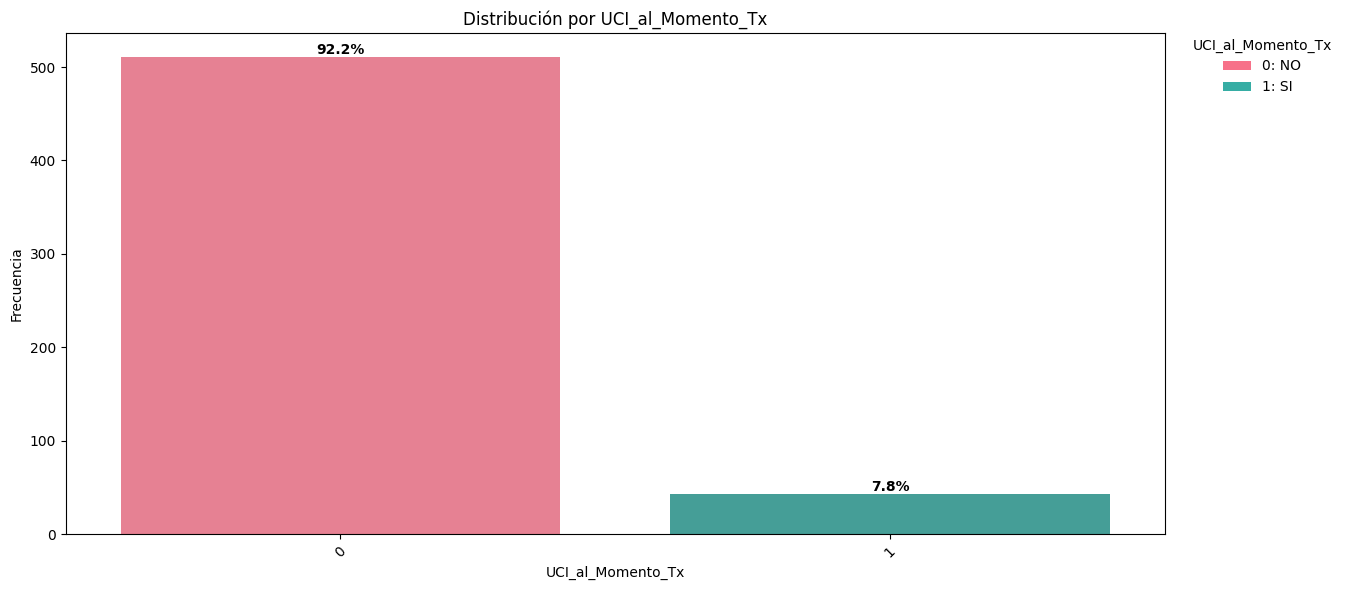

In [1052]:
for var in cat_vars:
    try:
        graficar_var_categorica(df_clean, var, show_legend=True)
    except Exception as e:
        print(f"Error al graficar {var}: {e}")

## *Grupo 2 — Intraoperatorio, profilaxis antibiótica y metadatos de registro*

Año_Tx; Fecha_Tx; Tiempo_Cx; Tiempo_Isquemia_Fria; Tiempo_Isquemia_caliente; Tipo_Reconstrucción_Biliar; Antibiótico_Profiláctico_VS_Terapéutico; Antibiotico_previo_al_Tx; Días_Tratamiento_Antibiótico_Previo_A_Tx#1; Tiempo_De_Dosis_Hasta_Tx#1; Antibiótico_1__Tx#1; Antibiótico_2_Tx#1; Antibiótico_3_Tx#1; Antifúngico_Tx#1; Infección_Al_Momento_Tx.

In [1053]:
columnas = ['Año_Tx', 'Fecha_Tx', 'Tiempo_Cx', 'Tiempo_Isquemia_Fria', 'Tiempo_Isquemia_caliente', 'Tipo_Reconstrucción_Biliar', 'Antibiótico_Profiláctico_VS_Terapéutico', 'Antibiotico_previo_al_Tx', 'Días_Tratamiento_Antibiótico_Previo_A_Tx#1', 'Tiempo_De_Dosis_Hasta_Tx#1', 'Antibiótico_1__Tx#1', 'Antibiótico_2_Tx#1', 'Antibiótico_3_Tx#1', 'Antifúngico_Tx#1', 'Infección_Al_Momento_Tx']

#### ``Año_Tx``
Año del trasplante

In [1054]:
df["Año_Tx"].isna().sum()

np.int64(0)

In [1055]:
df["Año_Tx"].value_counts(dropna=False)

,count
Año_Tx,
2017,58
2009,44
2016,43
2010,43
2015,40
2018,38
2012,37
2023,37
2014,35


In [1056]:
df["Año_Tx"].describe()

,Año_Tx
count,557.000000
mean,2015.924596
std,4.500766
min,2009.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2024.000000


Orden de categorías para 'Año_Tx': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


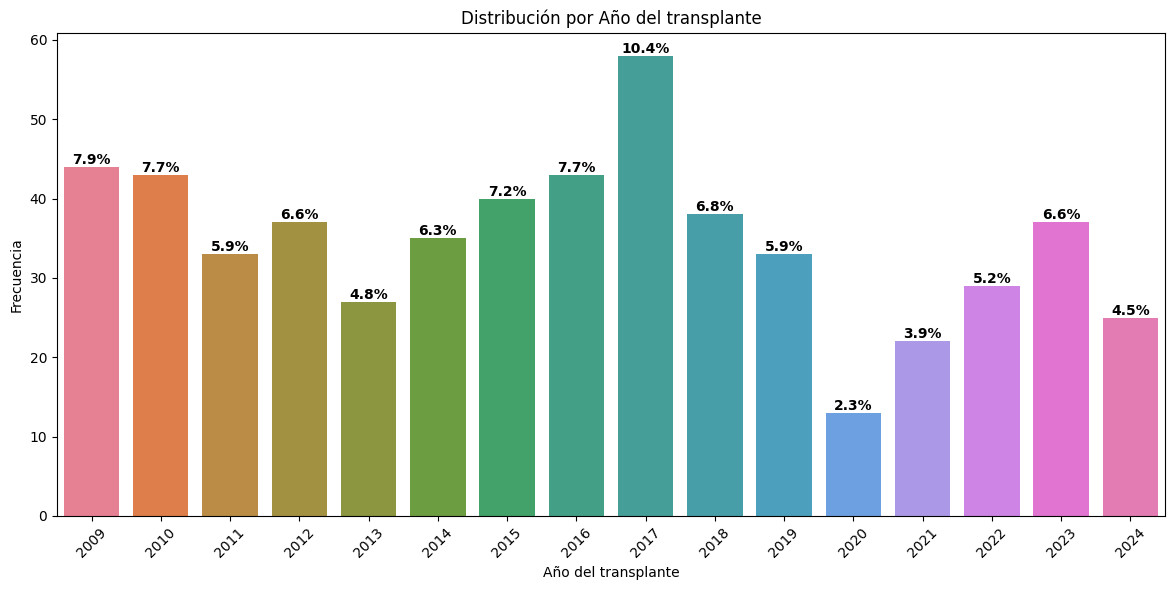

In [1057]:
graficar_var_categorica(df, "Año_Tx", "Año del transplante", ordinal=True)

#### ``Fecha_Tx``
Fecha del trasplante hepático

In [1058]:
df["Fecha_Tx"].isna().sum()

np.int64(0)

In [1059]:
# format as just date
df_clean.loc[:, "Fecha_Tx"] = pd.to_datetime(df_clean["Fecha_Tx"]).dt.date

In [1060]:

print(f"Fecha_Tx range: {df_clean['Fecha_Tx'].min()} to {df_clean['Fecha_Tx'].max()}")
df_clean['Fecha_Tx'].value_counts()

Fecha_Tx range: 2009-01-03 00:00:00 to 2024-10-29 00:00:00


,count
Fecha_Tx,
2023-01-23,2
2023-02-01,2
2014-03-20,2
2024-03-02,2
2023-09-23,2
...,...
2014-01-07,1
2014-02-02,1
2014-02-12,1


In [1061]:
# Verificamos que el año extraído de la fecha coincide con la columna Año_Tx
(pd.to_datetime(df["Fecha_Tx"]).dt.year == df["Año_Tx"]).value_counts()

,count
True,557


In [1062]:
# crearemos unas nuevas columna con el mes
df_clean['Mes_Tx'] = pd.to_datetime(df['Fecha_Tx']).dt.month

In [1063]:
df_clean['Mes_Tx'].value_counts().sort_index()

,count
Mes_Tx,
1,43
2,51
3,60
4,45
5,41
6,45
7,45
8,41
9,47


Orden de categorías para 'Mes_Tx': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


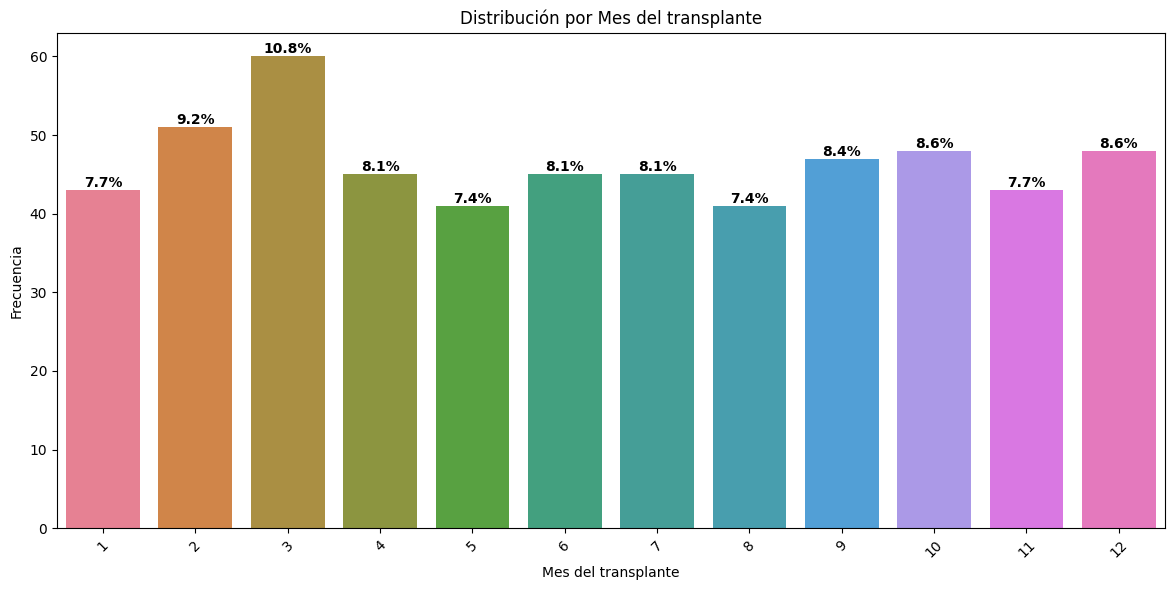

In [1064]:
graficar_var_categorica(df_clean, "Mes_Tx", "Mes del transplante", ordinal=True)

#### ``Tiempo_Cx``
Duración de la cirugia en horas.

Recomendación del experto: remover filas con duración inferior a las 2 horas.

In [1065]:
df["Tiempo_Cx"].isna().sum()

np.int64(0)

In [1066]:
df["Tiempo_Cx"].value_counts(dropna=False).sort_index()

,count
Tiempo_Cx,
0.00,83
0.02,1
1.83,1
1.92,1
2.00,1
...,...
19.00,1
20.00,1
20.50,1


In [1067]:
tiempo_operacion = df["Tiempo_Cx"].copy()
# crear máscara para valores válidos, 0 horas no tiene sentido
mask_valid = tiempo_operacion > 2 # mayor o igual a 2 horas
tiempo_operacion[~mask_valid] = np.nan
df_clean["Tiempo_Cx"] = pd.to_numeric(tiempo_operacion, errors="coerce")

In [1068]:
df_clean["Tiempo_Cx"].describe()

,Tiempo_Cx
count,470.000000
mean,8.989149
std,2.570930
min,2.250000
25%,7.557500
50%,8.670000
75%,9.787500
max,22.820000


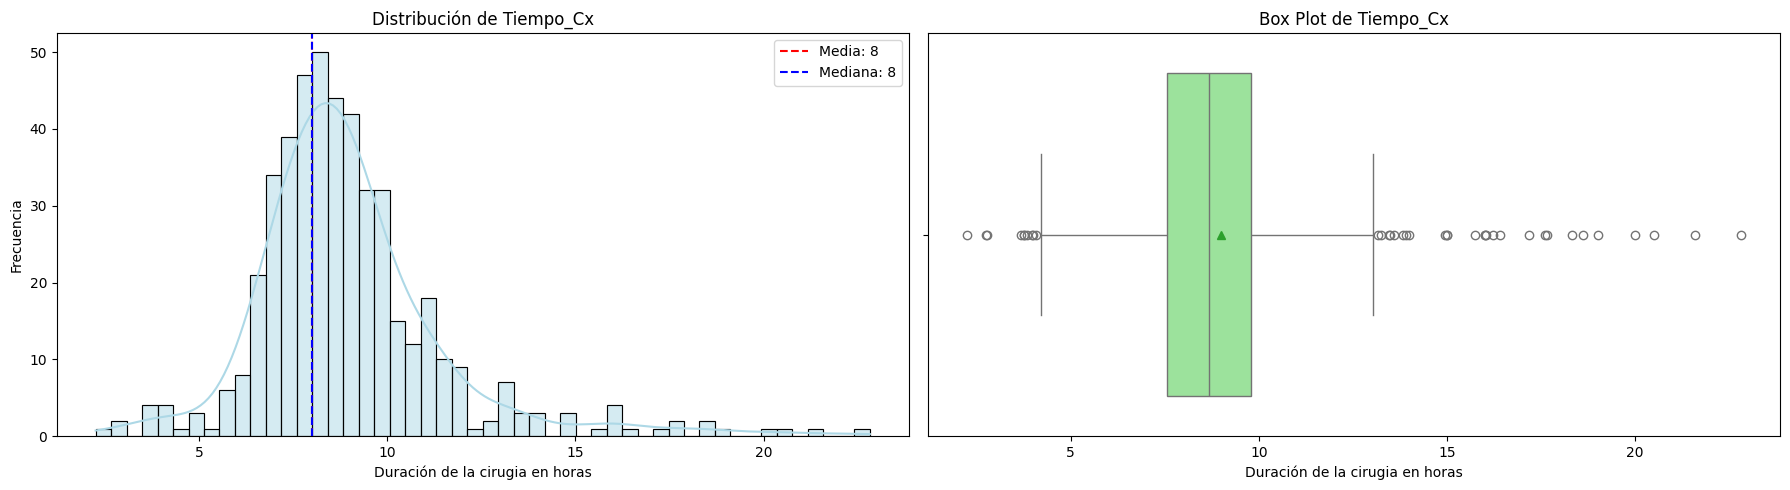

In [1069]:
graficar_var_numerica(df_clean, "Tiempo_Cx", "Duración de la cirugia en horas")

#### ``Tiempo_Isquemia_Fria``
Tiempo de isquemia fría reportado en la historia clínica en horas

In [1070]:
df["Tiempo_Isquemia_Fria"].isna().sum()

np.int64(178)

In [1071]:
import re
def extraer_horas_minutos(value):
    minutos = np.nan
    value = str(value).strip().lower()
    numeros = re.findall(r'\d+', value)
    if len(numeros) == 2:
        minutos = int(numeros[0]) * 60 + int(numeros[1]) # convertir todo a minutos
    elif len(numeros) == 1:
        if "h" in value:
            minutos = int(numeros[0]) * 60
        elif "m" in value:
            minutos = int(numeros[0])
        else:
            # Caso "solo números" (sin texto h o m): asumir MINUTOS
            minutos = int(numeros[0])
    return minutos

In [1072]:
# Creamos un DataFrame temporal para visualizar la transformación
df_temp = pd.DataFrame()
df_temp["Tiempo_Isquemia_Fria new"] = df["Tiempo_Isquemia_Fria"].apply(extraer_horas_minutos)
df_temp["Tiempo_Isquemia_Fria"] = df["Tiempo_Isquemia_Fria"].copy()
df_temp

,Tiempo_Isquemia_Fria new,Tiempo_Isquemia_Fria
0,NaN,NaN
1,662.0,11 HO 2
2,388.0,6H 28MIN
3,NaN,NaN
4,NaN,NaN
...,...,...
552,NaN,NaN
553,NaN,NaN
554,NaN,NaN
555,NaN,NaN


In [1073]:
# aplicamos la transformación al DataFrame limpio
df_clean["Tiempo_Isquemia_Fria"] = (df["Tiempo_Isquemia_Fria"].apply(extraer_horas_minutos) / 60).round(2)

In [1074]:
df_clean["Tiempo_Isquemia_Fria"].value_counts(dropna=False).sort_index()

,count
Tiempo_Isquemia_Fria,
0.08,1
0.13,1
2.42,1
2.75,1
3.00,4
...,...
13.00,5
13.07,1
14.50,1


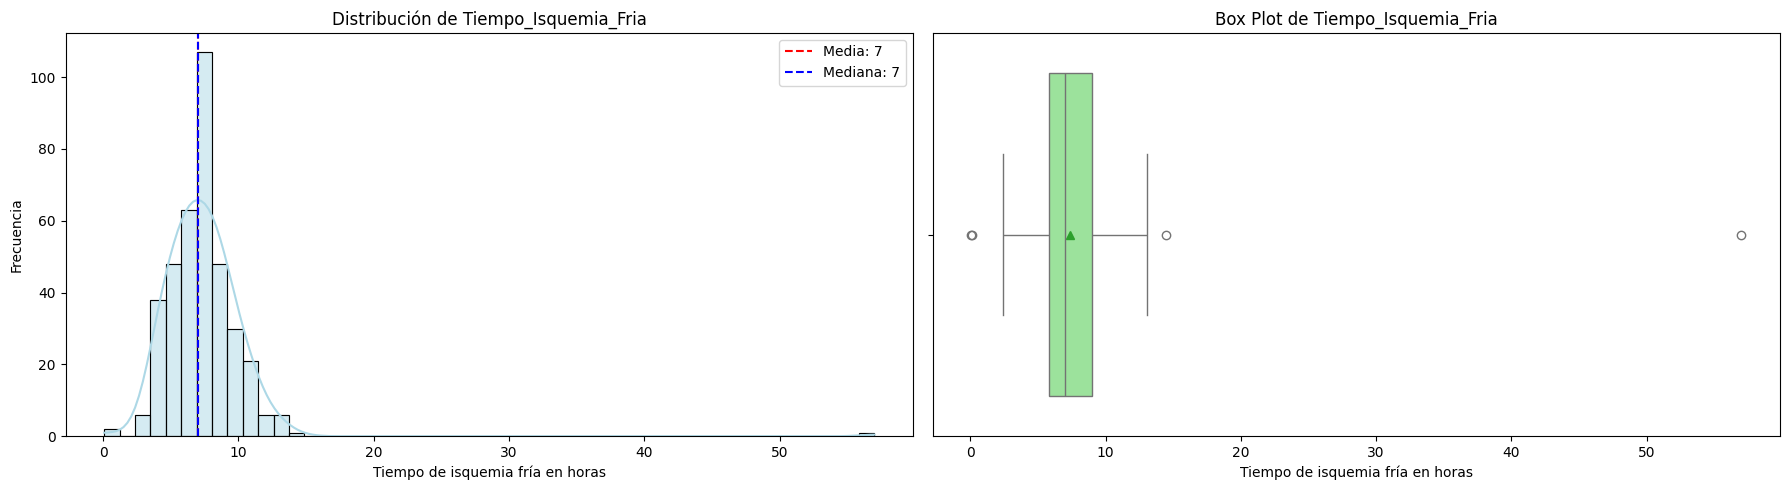

In [1075]:
graficar_var_numerica(df_clean, "Tiempo_Isquemia_Fria", "Tiempo de isquemia fría en horas")

In [1076]:
df_clean["Tiempo_Isquemia_Fria"].describe().round(2)

,Tiempo_Isquemia_Fria
count,377.00
mean,7.38
std,3.44
min,0.08
25%,5.85
50%,7.00
75%,9.00
max,57.00


#### `Tiempo_Isquemia_caliente`
Tiempo de isquemia caliente reportado en la historia clínica ne minutos


In [1077]:
df["Tiempo_Isquemia_caliente"].isna().sum()

np.int64(136)

In [1078]:
# aplicamos la transformación al DataFrame limpio
df_clean["Tiempo_Isquemia_caliente"] = df["Tiempo_Isquemia_caliente"].apply(extraer_horas_minutos)

In [1079]:
df_clean["Tiempo_Isquemia_caliente"].describe().round(2)

,Tiempo_Isquemia_caliente
count,415.00
mean,36.67
std,16.55
min,20.00
25%,30.00
50%,34.00
75%,40.00
max,301.00


In [1080]:
df_clean["Tiempo_Isquemia_caliente"].value_counts(dropna=False)

,count
Tiempo_Isquemia_caliente,
NaN,142
30.0,38
35.0,28
34.0,27
33.0,22
28.0,20
38.0,19
31.0,19
36.0,17


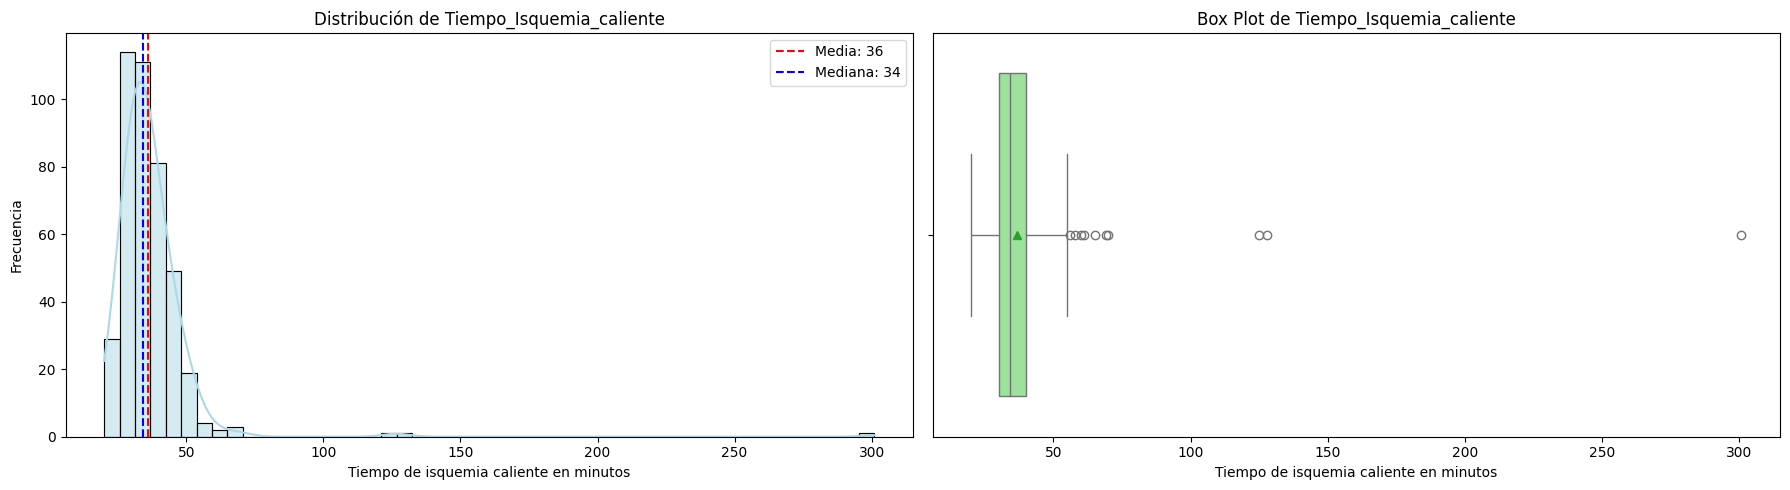

In [1081]:
graficar_var_numerica(df_clean, "Tiempo_Isquemia_caliente", "Tiempo de isquemia caliente en minutos")

#### ``Días_Tratamiento_Antibiótico_Previo_A_Tx#1``

Si fue terapéutico, definir desde cuánto tiempo antes recibió el Antibiotico

In [1082]:
df["Días_Tratamiento_Antibiótico_Previo_A_Tx#1"].isna().sum()

np.int64(0)

In [1083]:
df["Días_Tratamiento_Antibiótico_Previo_A_Tx#1"].value_counts(dropna=False)

,count
Días_Tratamiento_Antibiótico_Previo_A_Tx#1,
0,526
2,8
3,5
5,4
4,3
1,3
14,3
10,2
9,1


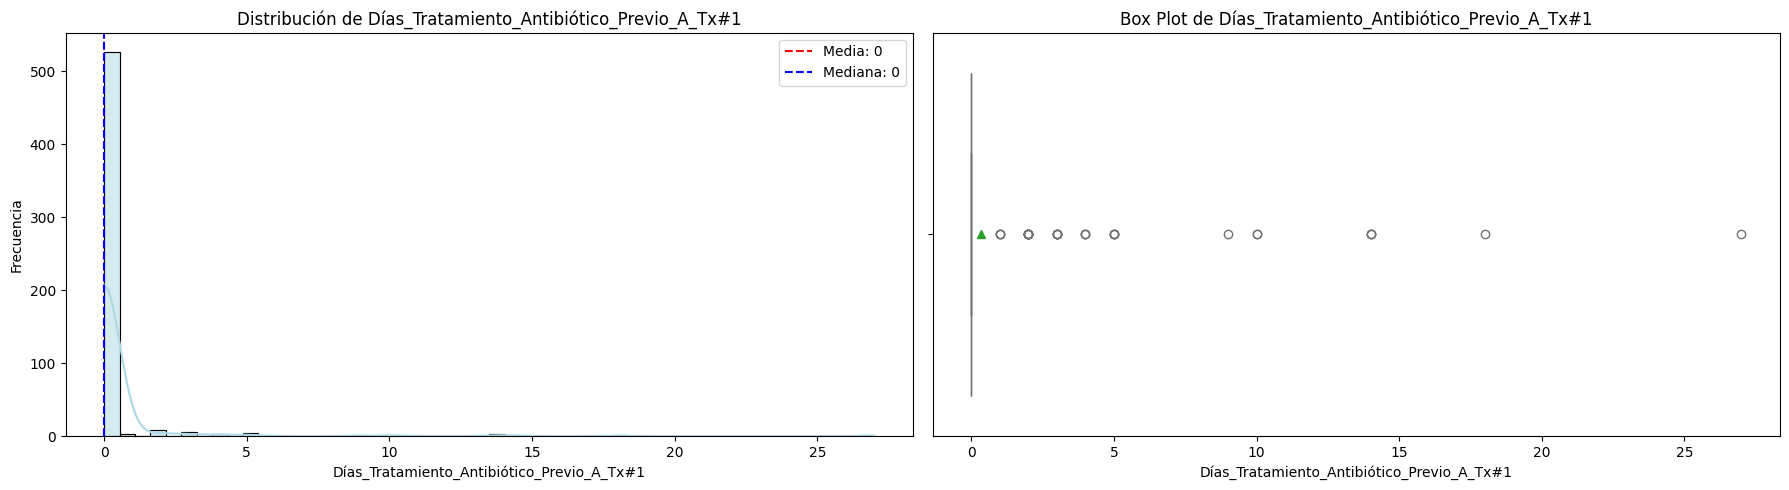

In [1084]:
graficar_var_numerica(df, "Días_Tratamiento_Antibiótico_Previo_A_Tx#1", "Días_Tratamiento_Antibiótico_Previo_A_Tx#1")

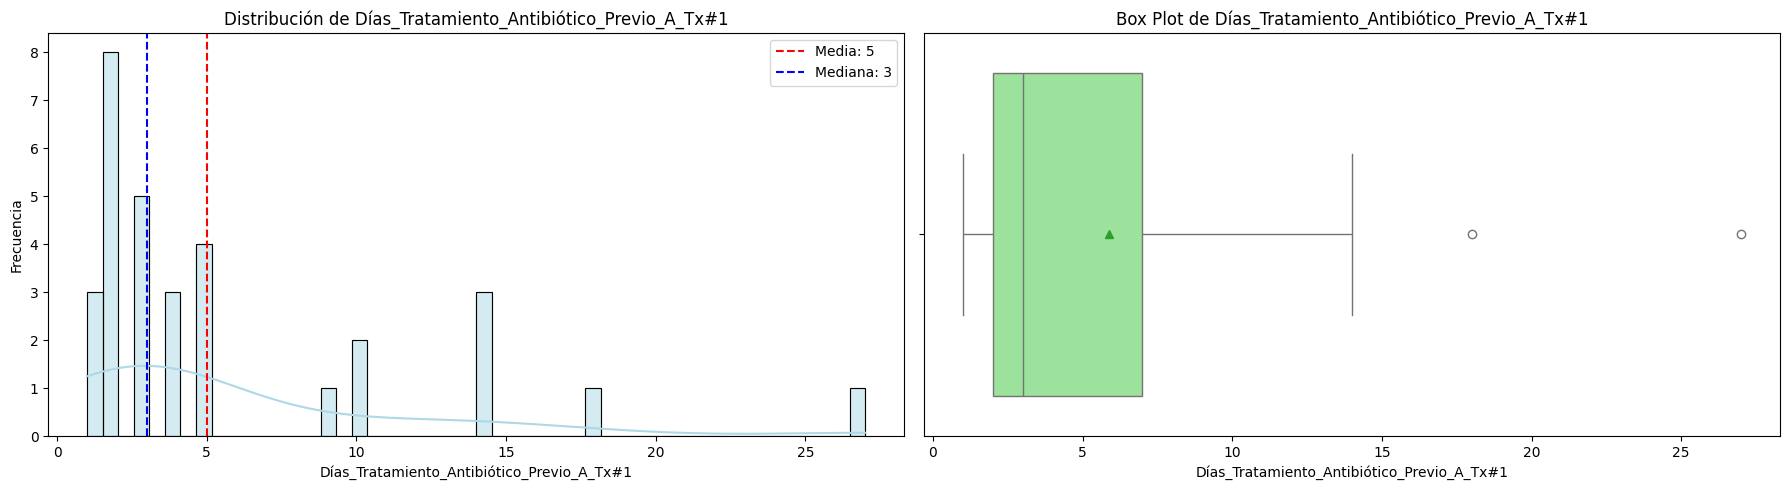

In [1085]:
graficar_var_numerica(df[df["Días_Tratamiento_Antibiótico_Previo_A_Tx#1"]!=0], "Días_Tratamiento_Antibiótico_Previo_A_Tx#1", "Días_Tratamiento_Antibiótico_Previo_A_Tx#1")

#### ``Tiempo_De_Dosis_Hasta_Tx#1``

TIEMPO ENTRE LA PROFILAXIS ANTIBIÓTICA Y LA INCISION (min)

In [1086]:
df["Tiempo_De_Dosis_Hasta_Tx#1"].isna().sum()

np.int64(3)

dejar solo los enteros, borrar decimales y negativos

In [1087]:
col = "Tiempo_De_Dosis_Hasta_Tx#1"

# 1) Asegura numérico
s = pd.to_numeric(df[col], errors="coerce")

# 2) Deja NaN donde haya decimales (solo se castea si es entero)
non_integer = ~s.isna() & (s != np.floor(s))
s = s.where(~non_integer)

# 3) Deja NaN donde haya negativos
s = s.where(s >= 0)

# 4) Reemplaza 9999 y 99999 por -2
s = s.where(~s.isin([9999, 99999]), NO_APLICA)

# 5) Ahora sí, castear a entero anulable
df_clean[col] = s.copy()


In [1088]:
df_clean["Tiempo_De_Dosis_Hasta_Tx#1"].describe().round(2)

,Tiempo_De_Dosis_Hasta_Tx#1
count,306.00
mean,40.93
std,123.30
min,0.00
25%,10.00
50%,26.00
75%,46.00
max,2083.00


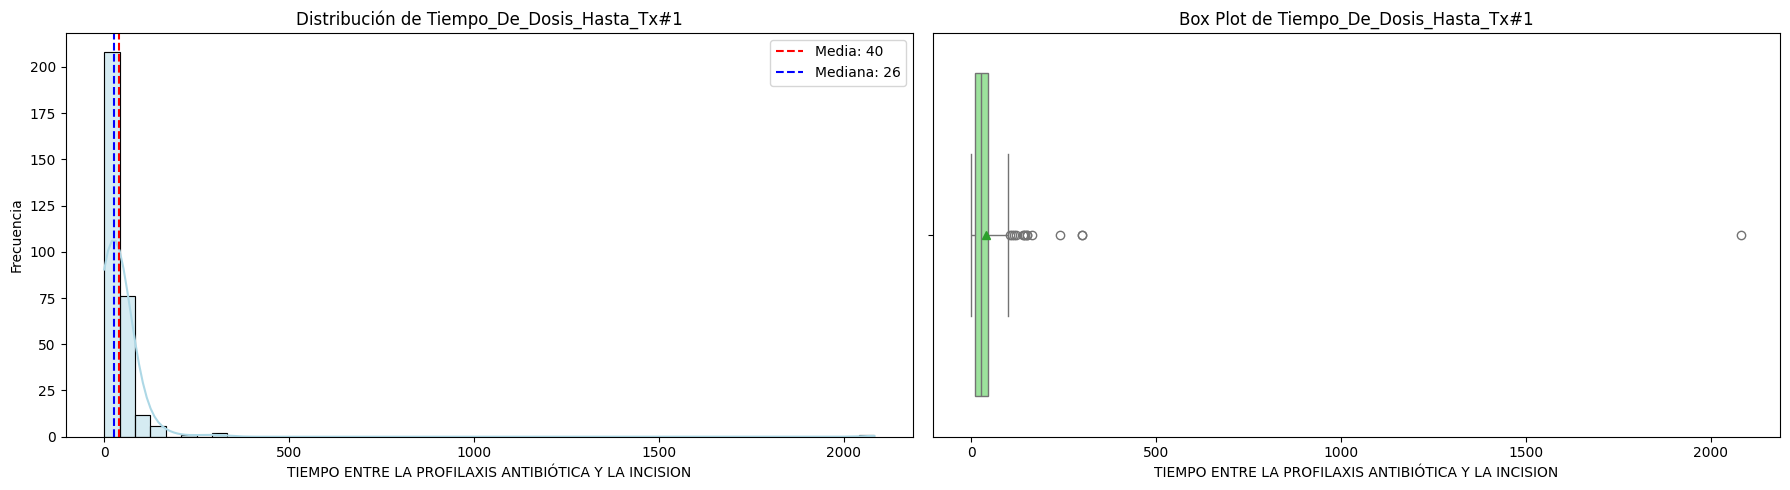

In [1089]:
graficar_var_numerica(df_clean, "Tiempo_De_Dosis_Hasta_Tx#1", "TIEMPO ENTRE LA PROFILAXIS ANTIBIÓTICA Y LA INCISION")

#### ``Tipo_Reconstrucción_Biliar``

Define cómo se reconstruyó la vía biliar

{'1': 'Ducto - Ducto', '2': 'Hepatico o Coledocoyeyunostomía + Reconstrucción en Y de Roux'}

In [1090]:
df["Tipo_Reconstrucción_Biliar"].isna().sum()

np.int64(1)

In [1091]:
df["Tipo_Reconstrucción_Biliar"].value_counts(dropna=False)

,count
Tipo_Reconstrucción_Biliar,
1,482
2,36
9999-cavo-cavostomia latero lateral,31
9999,2
NaN,1
RECONSUTRCCION BILIAR COLEDOCO-COLEDOCOSTOMIA TERMINO-TERMINAL,1
?,1
no hay nota operatoria,1
BILIAR HEPATICO- COLEDOCO STOMIA TERMINO TERMINAL.,1


In [1092]:
s = df["Tipo_Reconstrucción_Biliar"].copy()
# identificar no aplica
mask = s.isin(["9999-cavo-cavostomia latero lateral	31", 9999, 0, "RECONSUTRCCION BILIAR COLEDOCO-COLEDOCOSTOMIA TERMINO-TERMINAL", "BILIAR HEPATICO- COLEDOCO STOMIA TERMINO TERMINAL.	1"])
s = s.where(~mask, np.nan)
# el resto de valores se castean a nan
df_clean["Tipo_Reconstrucción_Biliar"] = pd.to_numeric(s, errors="coerce").astype("Int64")

In [1093]:
df_clean["Tipo_Reconstrucción_Biliar"].value_counts(dropna=False)

,count
Tipo_Reconstrucción_Biliar,
1,482
<NA>,39
2,36


Orden de categorías para 'Tipo_Reconstrucción_Biliar': [1, 2]


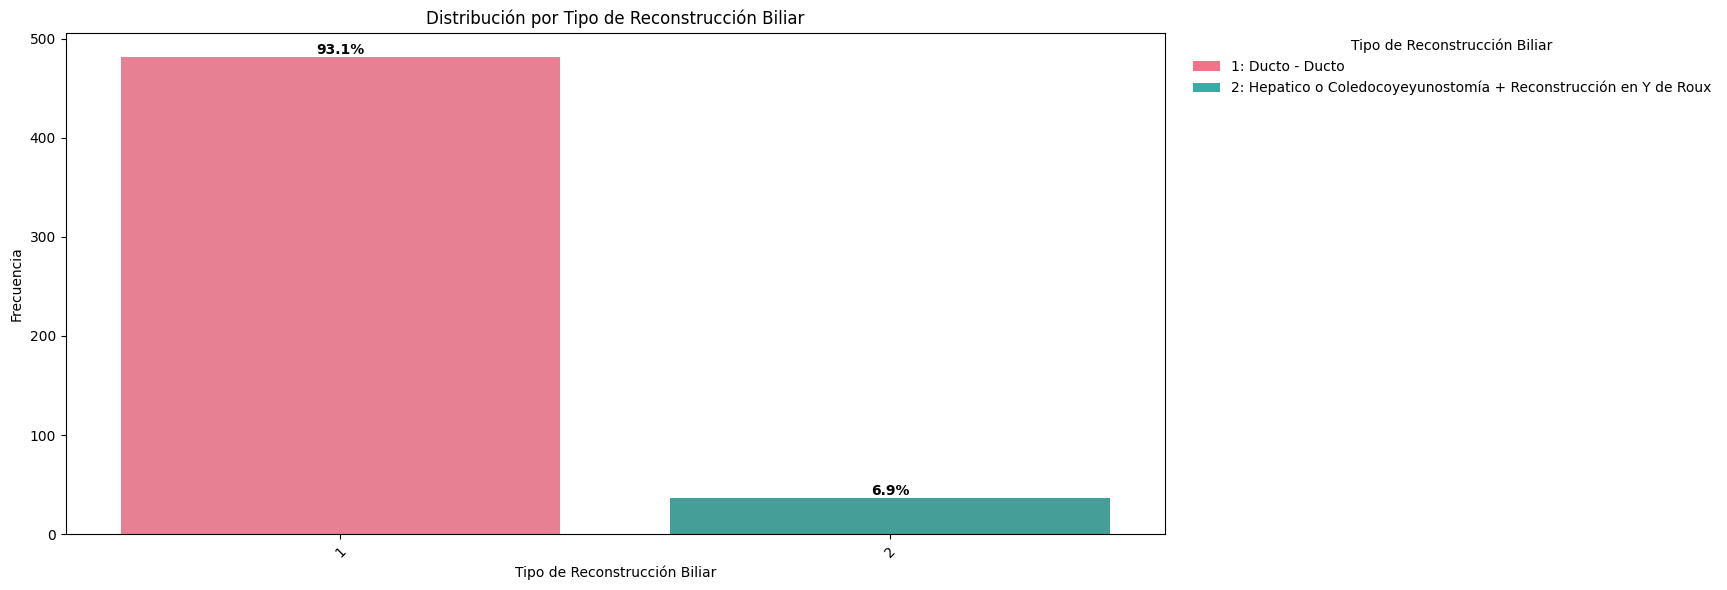

In [1094]:
graficar_var_categorica(df_clean, "Tipo_Reconstrucción_Biliar", "Tipo de Reconstrucción Biliar", show_legend=True, ordinal=False)

#### ``Antibiótico_Profiláctico_VS_Terapéutico``

Define si el AB que recibió al momento de la Cx fue profiláctico como parte de un tratamiento

{'0': 'Profiláctico', '1': 'Terapéutico '}

In [1095]:
df["Antibiótico_Profiláctico_VS_Terapéutico"].isna().sum()

np.int64(0)

In [1096]:
df["Antibiótico_Profiláctico_VS_Terapéutico"].value_counts(dropna=False)

,count
Antibiótico_Profiláctico_VS_Terapéutico,
0,522
1,35


Orden de categorías para 'Antibiótico_Profiláctico_VS_Terapéutico': [0, 1]


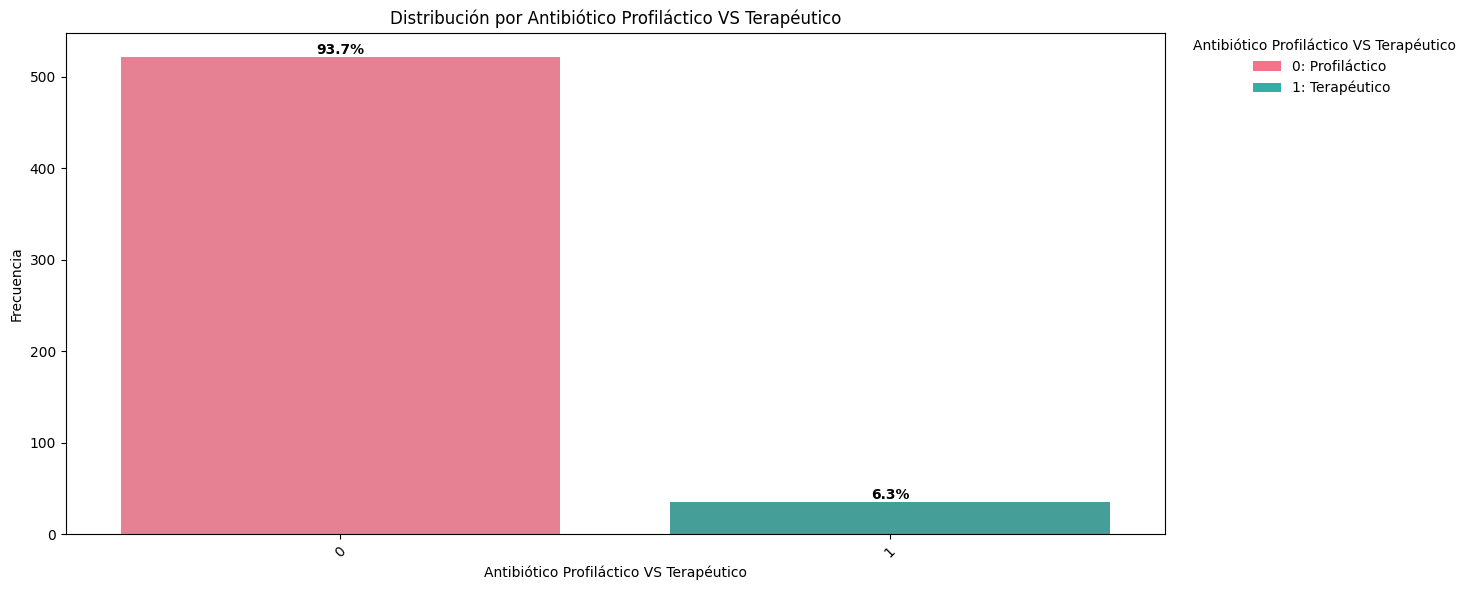

In [1097]:
graficar_var_categorica(df, "Antibiótico_Profiláctico_VS_Terapéutico", "Antibiótico Profiláctico VS Terapéutico", show_legend=True, ordinal=False)

#### ``Antibiotico_previo_al_Tx``

Antibiótico terapia previa a 3 meses

{'0': 'NO', '1': 'SI'}


In [1098]:
df["Antibiotico_previo_al_Tx"].isna().sum()

np.int64(300)

In [1099]:
df["Antibiotico_previo_al_Tx"].value_counts(dropna=False)

,count
Antibiotico_previo_al_Tx,
NaN,300
"AMPICILINA-SULBACTAM, GENTAMICINA",14
AMPICILINA-SULBACTAM,11
AMPICILINA SULBACTAM - GENTAMICINA,10
AMPICILINA SULBACTAM,10
...,...
CEFTAZIDIME AVIBACTAM + AMIKACINA (ANTIBIOTITOC TERAPEUTIC,1
PIPERACILINA TZOBACTAM (INICIO 10+47 - FINALIZA 11+30) COM,1
PIERACILINA/TAZOBACTAM 4,1


In [1100]:
s = df["Antibiotico_previo_al_Tx"].copy()
s.loc[~s.isna()] = 1 # si valor, sí recibió antibiótico previo
s = s.fillna(0) # si nan, no recibió antibiótico previo
df_clean["Antibiotico_previo_al_Tx"] = s.astype("int64")

/tmp/ipython-input-3252847760.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.fillna(0) # si nan, no recibió antibiótico previo


Orden de categorías para 'Antibiotico_previo_al_Tx': [0, 1]


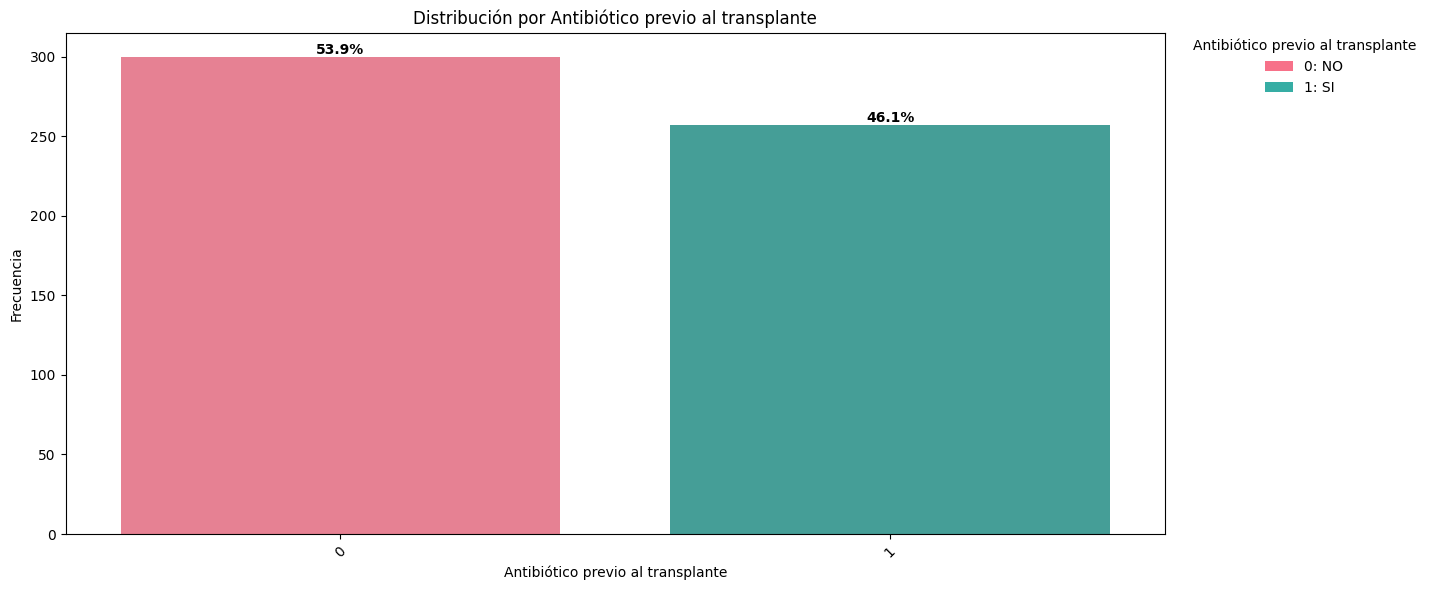

In [1101]:
graficar_var_categorica(df_clean, "Antibiotico_previo_al_Tx", "Antibiótico previo al transplante", show_legend=True, ordinal=False)

#### ``Antibiótico_1__Tx#1``
MEDICAMENTO ANTIBIÓTICO UTILIZADO COMO PROFILAXIS O TRATAMIENTO

{'0': 'NO', '1': 'CEFAZOLINA', '2': 'CEFUROXIMA', '3': 'CEFTRIAXONA', '4': 'CEFEPIME', '5': 'AMPICILINA SULBACTAM ', '6': 'PIPERACILINA TAZOBACTAM ', '7': 'CEFTAZIDIMA AVIBACTAM', '8': 'MEROPENEM ', '9': 'ERTAPENEM ', '10': 'GENTAMICINA', '11': 'AMIKACINA', '12': 'CIPROFLOXACINA', '13': 'CLINDAMICINA', '14': 'VANCOMICINA', '15': 'LINEZOLID', '16': 'TIGECICLINA', '17': 'METRONIDAZOL', '18': 'TRIMETROPIM/SULFAMETOXAZOL'}


In [1102]:
df["Antibiótico_1__Tx#1"].isna().sum()

np.int64(0)

In [1103]:
df["Antibiótico_1__Tx#1"].value_counts(dropna=False)

,count
Antibiótico_1__Tx#1,
5,392
6,99
8,19
2,15
10,7
7,7
18,6
16,4
9,3


Orden de categorías para 'Antibiótico_1__Tx#1': [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 18]


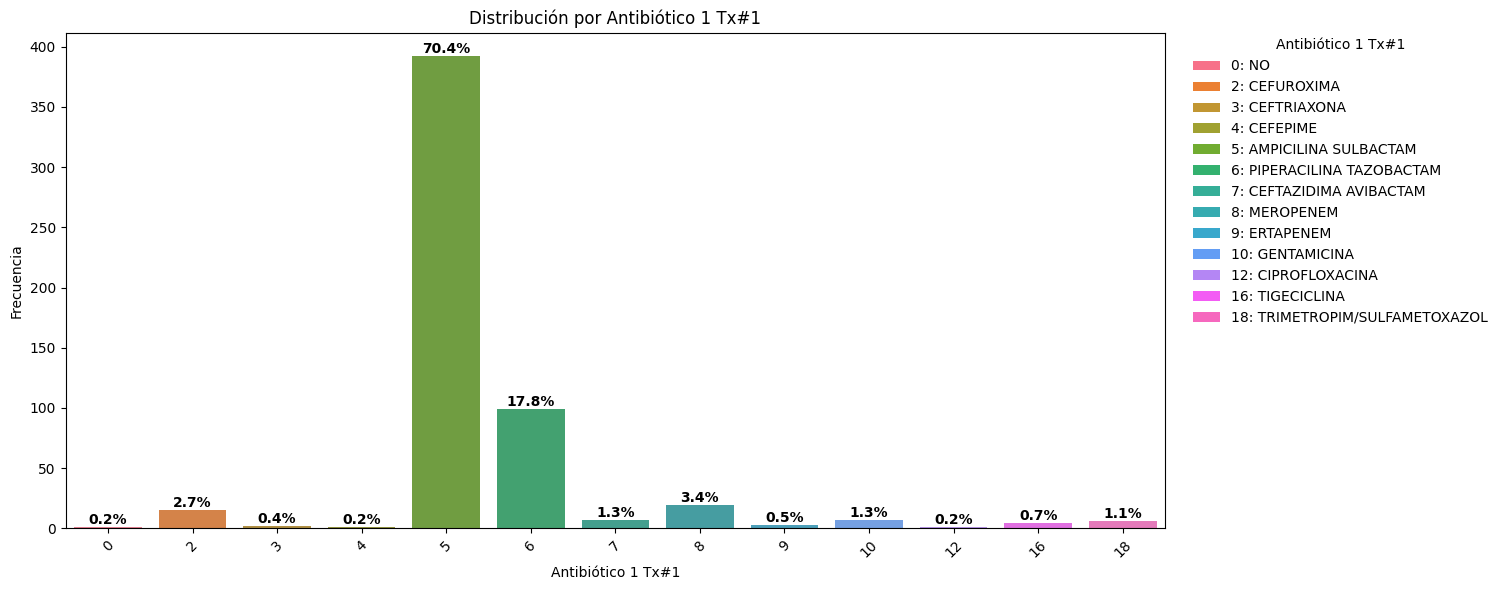

In [1104]:
graficar_var_categorica(df, "Antibiótico_1__Tx#1", "Antibiótico 1 Tx#1", show_legend=True)

#### ``Antibiótico_2_Tx#1	``

MEDICAMENTO ANTIBIÓTICO UTILIZADO COMO PROFILAXIS O TRATAMIENTO

{'0': 'NO', '1': 'CEFAZOLINA', '2': 'CEFUROXIMA', '3': 'CEFTRIAXONA', '4': 'CEFEPIME', '5': 'AMPICILINA SULBACTAM ', '6': 'PIPERACILINA TAZOBACTAM ', '7': 'CEFTAZIDIMA AVIBACTAM', '8': 'MEROPENEM ', '9': 'ERTAPENEM ', '10': 'GENTAMICINA', '11': 'AMIKACINA', '12': 'CIPROFLOXACINA', '13': 'CLINDAMICINA', '14': 'VANCOMICINA', '15': 'LINEZOLID', '16': 'TIGECICLINA', '17': 'METRONIDAZOL', '18': 'TRIMETROPIM/SULFAMETOXAZOL', '19': 'DAPTOMICINA', '20': 'AZTREONAM'}	Categorical

In [1105]:
df["Antibiótico_2_Tx#1"].isna().sum()

np.int64(0)

In [1106]:
df["Antibiótico_2_Tx#1"].value_counts(dropna=False)

,count
Antibiótico_2_Tx#1,
10,361
0,154
17,15
5,8
15,4
14,3
11,2
13,1
3,1


Orden de categorías para 'Antibiótico_2_Tx#1': [0, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


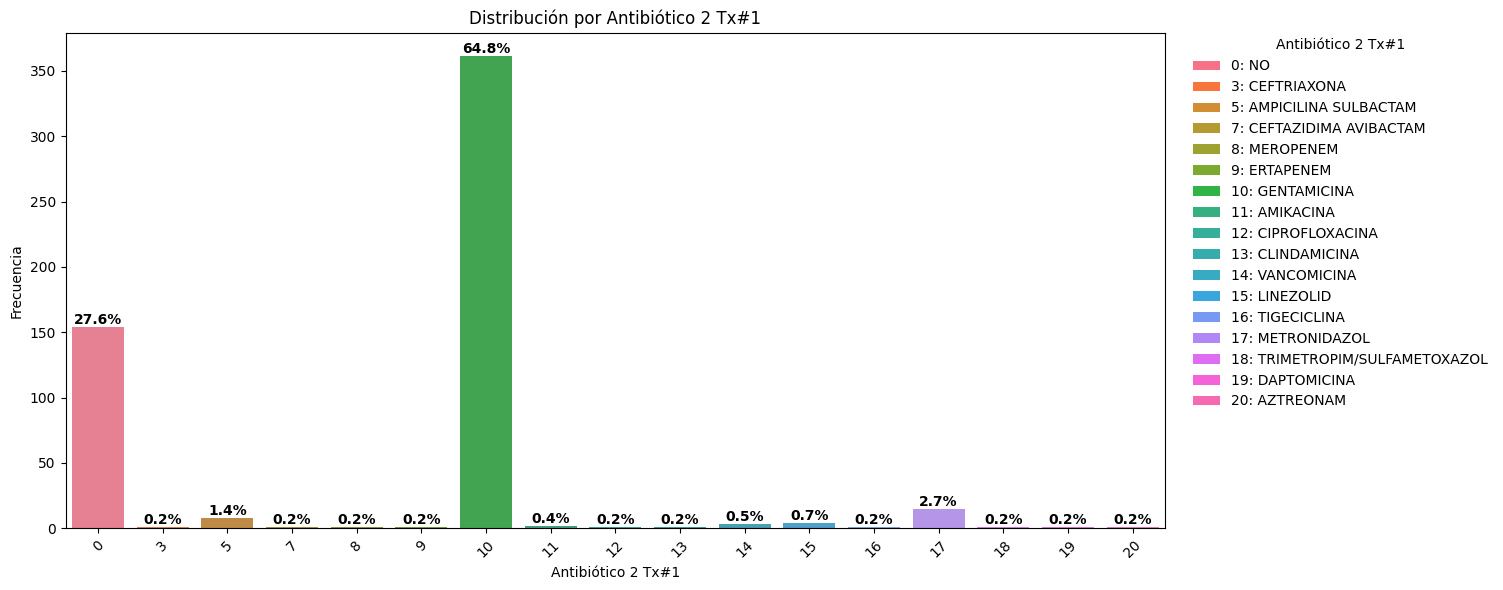

In [1107]:
graficar_var_categorica(df, "Antibiótico_2_Tx#1", "Antibiótico 2 Tx#1", show_legend=True)

#### ``Antifúngico_Tx#1``

MEDICAMENTO ANTIFÚNGICO UTILIZADO COMO PROFILAXIS O TRATAMIENTO
{'0': 'NO', '1': 'FLUCONAZOL ', '2': 'VORICONAZOL'}

In [1108]:
df["Antifúngico_Tx#1"].isna().sum()

np.int64(0)

In [1109]:
df["Antifúngico_Tx#1"].value_counts(dropna=False)

,count
Antifúngico_Tx#1,
0,546
1,6
2,1
1*,1
1* EL 17,1
0 voriconazol el 19,1
FLUCONAZOL EL 12/11,1


In [1110]:

s = df["Antifúngico_Tx#1"].copy()
# mapear a 1: Fluconazol
mask1 = df["Antifúngico_Tx#1"].isin([ '1*', 'FLUCONAZOL EL 12/11', "1* EL 17"])
s = s.where(~mask1, 1)
#mapear a 2: Voriconazol
mask2 = df["Antifúngico_Tx#1"].isin(["0 voriconazol el 19"])
s = s.where(~mask2, 2)
df_clean["Antifúngico_Tx#1"] = pd.to_numeric(s, errors="coerce").astype("Int64")


In [1111]:
df_clean["Antifúngico_Tx#1"].value_counts(dropna=False)

,count
Antifúngico_Tx#1,
0,546
1,9
2,2


Orden de categorías para 'Antifúngico_Tx#1': [0, 1, 2]


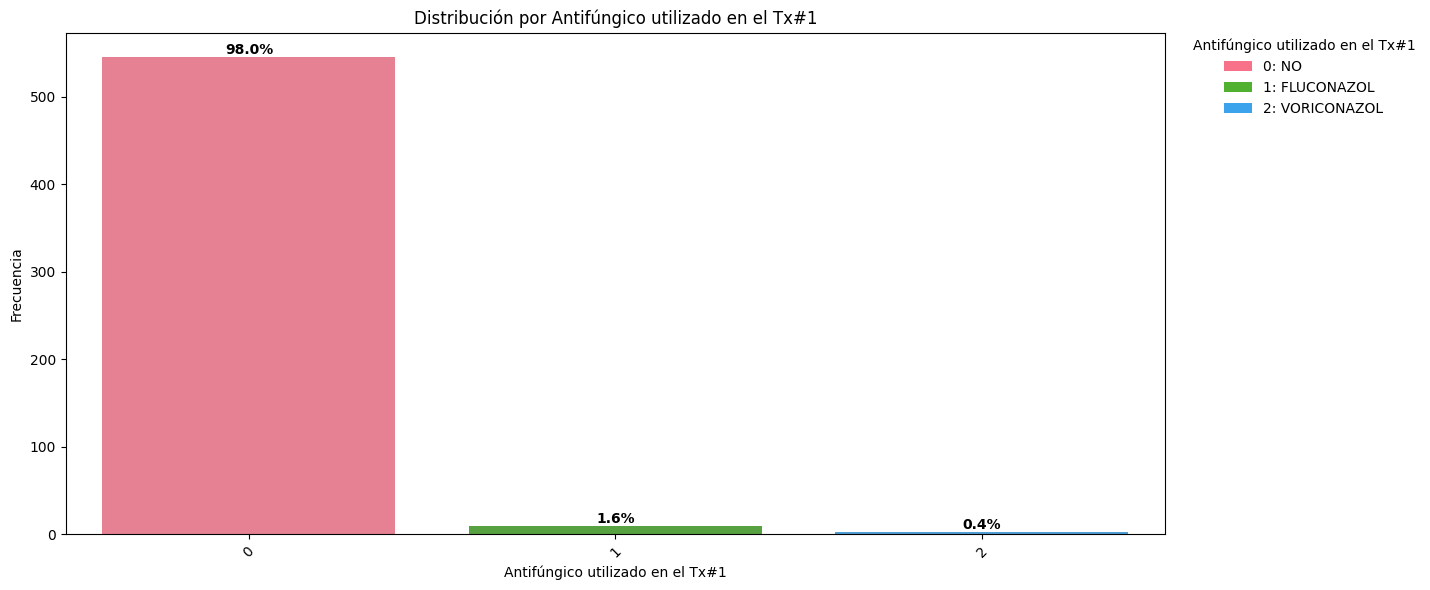

In [1112]:
graficar_var_categorica(df_clean, "Antifúngico_Tx#1", "Antifúngico utilizado en el Tx#1", show_legend=True)

## Grupo 3 — Infección y curso postoperatorio temprano

Localización de la infección; Germen/Microorganismo aislado; Nutrición_Enteral; Días_Nutrición_Enteral; Requerimiento_de_diálisis; Trasfusión_GRE_hasta_1m_POP; Reintervención_Quirúrgica_hasta_1m_POP; Complicaciones_Técnicas; Días_En_UCI_POP; Días_En_Hospitalización_Piso; Días_Totales_Intrahospitalarios; Fecha_Egreso_UCI; Fecha_Egreso_Hospitalario; Retrasplante; Infección_Al_Momento_Tx

In [1113]:
estancias_globales = [
    "Infección_Al_Momento_Tx",
    "Localización de la infección",
    "Germen/Microorganismo aislado",
    "Nutrición_Enteral",
    "Requerimiento_de_diálisis",
    "Trasfusión_GRE_hasta_1m_POP",
    "Complicaciones_Técnicas",
    "Días_En_UCI_POP",
    "Días_En_Hospitalización_Piso",
    "Días_Totales_Intrahospitalarios",
    "Fecha_Egreso_UCI",
    "Fecha_Egreso_Hospitalario",
    "Retrasplante"]

In [1114]:
df_codebook.loc[estancias_globales]

,Description,Dtype,Choices,Var Type
Infección_Al_Momento_Tx,Infección al momento del trasplante,object,"{'0': 'NO', '1': 'SI'}",Categorical
Localización de la infección,Tipo de infección inicial para la que se recib...,float64,"{'1': 'Bacteremia primaria ', '2': 'Neumonia '...",Categorical
Germen/Microorganismo aislado,Germen aislado culpable de la infección,float64,"{'0': 'Escherichia coli', '1': 'Klebsiella pne...",Categorical
Nutrición_Enteral,Define si recibió nutrición enteral,float64,{},Categorical
Requerimiento_de_diálisis,Define si requirió diálisis postoperatoria,object,"{'0': 'NO', '1': 'SI'}",Categorical
Trasfusión_GRE_hasta_1m_POP,Define si requirió trasfusión postoperatoria,object,"{'0': 'NO', '1': 'SI'}",Categorical
Complicaciones_Técnicas,Reporte en historia clínica de compliaciones t...,object,{},Categorical
Días_En_UCI_POP,Días en UCI post Tx,object,{},Numerical
Días_En_Hospitalización_Piso,Días en piso post Tx,float64,{},Numerical
Días_Totales_Intrahospitalarios,Días en totales post Tx,object,{},Numerical


#### ``Localización de la infección``
LOCALIZACIÓN DE LA INFECCIÓN

{
         "1": "Bacteremia primaria ",
         "2": "Neumonia ",
         "3": "IVU ",
         "4": "Bacteremia asociada a catéter ",
         "5": "Infección intraabdominal "
      },

Debido al stake holder, vamos a relacionar esta columna con la columna Localización de la infección.

Por el mal uso de la ingesta de datos, la información que debería estar en la localización de la infección, está en la Infección_Al_Momento, que solo es binaria.

Por lo que, si la columna Infección_Al_Momento tiene texto, se va a interpretar como un si, y con ayuda del stakeholder se clasificó en la columna Localización de la infección.

- Si tiene las siglas IVU, se les puede poner clasificación 3 (IVU)

- Si la columna contiene TBC (Tuberculósis), se les puede poner clasificación 2 (Neumonía)

- Si la columna tiene peritonitis, se les puede poner clasificación 5 (Infección intra abdominal)

In [1115]:
df_clean["Localización de la infección"].value_counts()

,count
Localización de la infección,
0.0,61
10.0,8
6.0,3
3.0,3
7.0,2
2.0,1


In [1116]:
df2 = df_clean[["Infección_Al_Momento_Tx" , "Localización de la infección"]].copy()
# Si en la columna 'Infección_Al_Momento_Tx' aparece 'IVU',
# clasificar como categoría 3 (IVU)
df2.loc[
    df2["Infección_Al_Momento_Tx"].astype(str).str.contains('IVU', case=False, na=False),
    "Localización de la infección"
] = 3.0

# Si en la columna 'Infección_Al_Momento_Tx' aparece 'TBC',
# clasificar como categoría 2 (Neumonía)
df2.loc[
    df2["Infección_Al_Momento_Tx"].astype(str).str.contains('TBC', case=False, na=False),
    "Localización de la infección"
] = 2.0


# Si en la columna 'Infección_Al_Momento_Tx' aparece 'peritonitis',
# clasificar como categoría 5 (Infección Intra abdominal)
df2.loc[
    df2["Infección_Al_Momento_Tx"].astype(str).str.contains('peritonitis', case=False, na=False),
    "Localización de la infección"
] = 5.0

In [1117]:
df2["Localización de la infección"].value_counts()

,count
Localización de la infección,
0.0,61
2.0,28
3.0,14
5.0,8
10.0,8
6.0,3
7.0,2


In [1118]:
# Pasar a int y poner vacíos como -1
df2["Localización de la infección"] = pd.to_numeric(df2["Localización de la infección"], errors='coerce').fillna(GENERAL_MISSING).astype(int)

In [1119]:
df_clean["Localización de la infección"] = df2["Localización de la infección"].copy()
df_clean["Localización de la infección"].value_counts()

,count
Localización de la infección,
-1,433
0,61
2,28
3,14
5,8
10,8
6,3
7,2


In [1120]:
df_clean.shape

(557, 62)

Orden de categorías para 'Localización de la infección': [-1, 0, 2, 3, 5, 6, 7, 10]


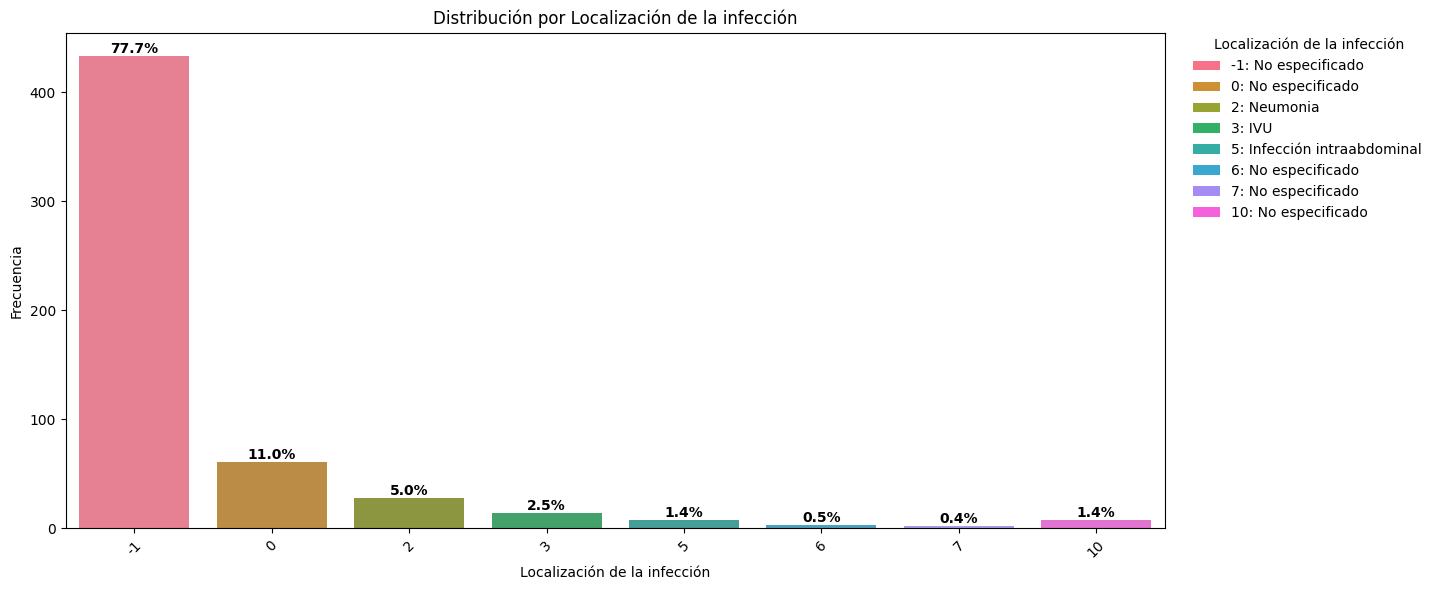

In [1121]:
graficar_var_categorica(df_clean, "Localización de la infección", "Localización de la infección", show_legend=True)

#### ``Infección_Al_Momento_Tx``
ME INDICA SI HAY O NO INFECCIÓN AL MOMENTO DEL TRANSPLANTE

{'0': 'NO', '1': 'SI'}

In [1122]:
col = "Infección_Al_Momento_Tx"

In [1123]:
df2["Infección_Al_Momento_Tx"].value_counts(dropna=False)

,count
Infección_Al_Momento_Tx,
0,461
1,14
TBC LATENTE,14
1-IVU,3
"IGG TOXOPLASMA, CMV Y EBV",2
...,...
PERITONITIS BACTERIANA ESPONTANEA 19/08/2019 EN TRATAMIENTO,1
PERITONITIS BACTERIANA,1
"BACTEREMIA POR COCOS GRAM POSITIVOS STAPHYLOCOCCUS EPIDERMIDIS, SEUDOMONA LIBANENSIS, PSEUDOMONA ORYZHYHABITANS, AEROCOCCOS VIRIDANS EN TRATAMIENTO MODULADA.",1


In [1124]:
df2.loc[~df2[col].isin([0, 1]), col] = 1

df_clean[col] = pd.to_numeric(df2[col], errors='coerce').fillna(GENERAL_MISSING).astype(int)
df_clean["Infección_Al_Momento_Tx"].value_counts(dropna=False)

,count
Infección_Al_Momento_Tx,
0,461
1,96


Orden de categorías para 'Infección_Al_Momento_Tx': [0, 1]


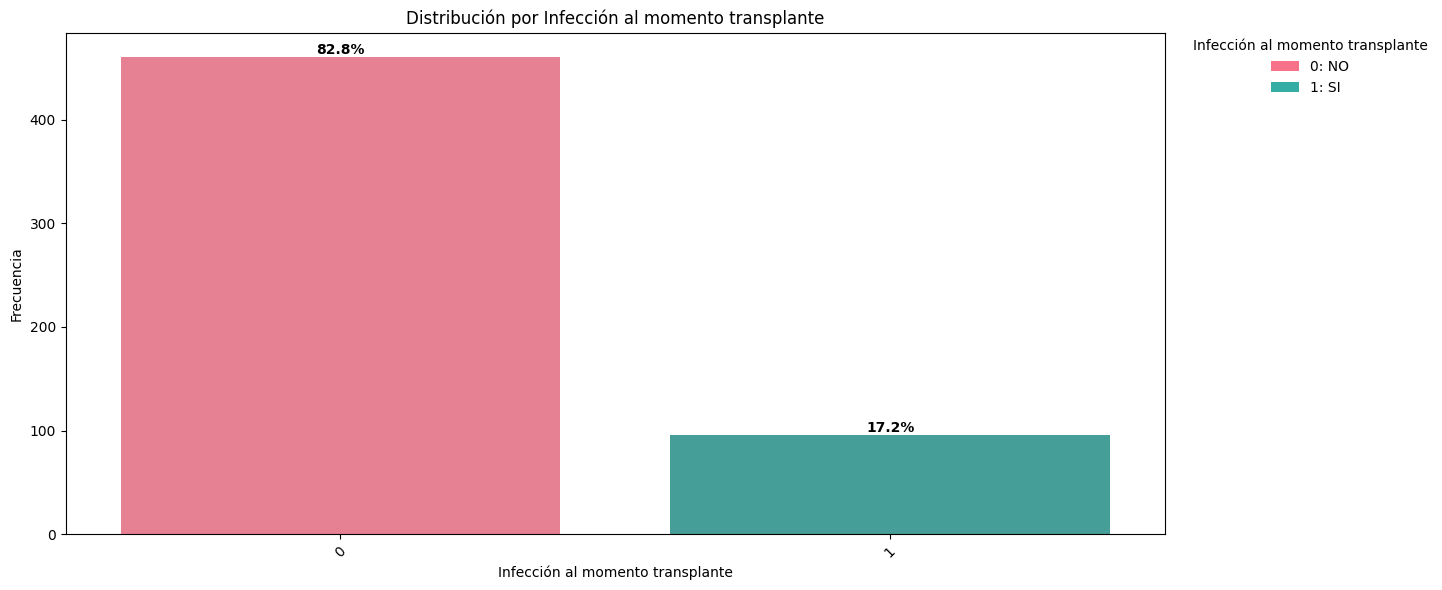

In [1125]:
graficar_var_categorica(df_clean, "Infección_Al_Momento_Tx", "Infección al momento transplante", show_legend=True)

#### ``Germen/Microorganismo aislado``
Me indica el microorganismo asociado

{
         "0": "Escherichia coli",
         "1": "Klebsiella pneumoniae ss. pneumoniae",
         "2": "Staphylococcus aureus ss. aureus",
         "3": "Candida albicans",
         "4": "Enterococcus faecalis",
         "5": "Pseudomonas aeruginosa",
         "6": "Staphylococcus epidermidis",
         "7": "Candida glabrata",
         "8": "Enterococcus faecium",
         "9": "Enterobacter cloacae",
         "10": "Proteus mirabilis",
         "11": "Staphylococcus hominis ss. hominis",
         "12": "Candida parapsilosis",
         "13": "Citrobacter freundii",
         "14": "Staphylococcus haemolyticus",
         "15": "Morganella morganii ss. morganii",
         "16": "Klebsiella oxytoca",
         "17": "Klebsiella aerogenes",
         "18": "Candida tropicalis",
         "19": "Stenotrophomonas maltophilia",
         "20": "Enterobacter asburiae",
         "21": "Acinetobacter calcoaceticus-baumannii complex",
         "22": "Streptococcus agalactiae",
         "23": "Enterococcus gallinarum",
         "24": "Enterococcus durans",
         "25": "Enterobacter sp.",
         "26": "Candida kefyr (pseudotropicalis)",
         "27": "Acinetobacter baumannii",
         "28": "Pseudomonas putida",
         "29": "Enterococcus avium",
         "30": "Serratia marcescens",
         "31": "Citrobacter amalonaticus",
         "32": "Streptococcus salivarius",
         "33": "Streptococcus mitis",
         "34": "Candida sp.",
         "35": "Staphylococcus warneri",
         "36": "Staphylococcus capitis ss. capitis",
         "37": "Streptococcus pneumoniae",
         "38": "Moraxella (Branh.) catarrhalis",
         "39": "Salmonella sp.",
         "40": "Staphylococcus lugdunensis",
         "41": "Streptococcus, beta-haem. Group B",
         "42": "Raoultella planticola",
         "43": "Klebsiella pneumoniae ss. ozaenae",
         "44": "Saccharomyces cerevisiae",
         "45": "Pseudomonas fluorescens",
         "46": "Hafnia alvei",
         "47": "Gemella morbillorum",
         "48": "Enterococcus casseliflavus",
         "49": "Citrobacter koseri (diversus)",
         "50": "Haemophilus influenzae",
         "51": "Streptococcus constellatus",
         "52": "Candida krusei",
         "53": "Erysipelothrix rhusiopathiae",
         "54": "Chryseomonas luteola",
         "55": "Pantoea agglomerans",
         "56": "Candida famata",
         "57": "Streptococcus sanguinis I",
         "58": "Acinetobacter lwoffii",
         "59": "Streptococcus intermedius",
         "60": "Staphylococcus intermedius",
         "61": "Providencia rettgeri",
         "62": "Candida intermedia",
         "63": "Streptococcus parasanguinis",
         "64": "Gemella sp.",
         "65": "Candida lusitaniae",
         "66": "Klebsiella sp.",
         "67": "Cutibacterium acnes",
         "68": "Enterococcus raffinosus",
         "69": "Enterococcus sp.",
         "70": "Lactobacillus sp.",
         "71": "Leifsonia aquatica"
      }

In [1126]:
col = "Germen/Microorganismo aislado"

In [1127]:
df_clean[col].value_counts()

,count
Germen/Microorganismo aislado,
0.0,67
1.0,5
2.0,2
7.0,1
14.0,1
23.0,1
10.0,1


In [1128]:
df[col].value_counts()

,count
Germen/Microorganismo aislado,
0.0,67
1.0,5
2.0,2
7.0,1
14.0,1
23.0,1
10.0,1


In [1129]:
#Convertir a int y vacíos a -1
s = pd.to_numeric(df[col], errors='coerce').fillna(GENERAL_MISSING).astype(int).copy()
df_clean[col] = s.copy()
df_clean[col].value_counts()

,count
Germen/Microorganismo aislado,
-1,479
0,67
1,5
2,2
7,1
14,1
23,1
10,1


Orden de categorías para 'Germen/Microorganismo aislado': [-1, 0, 1, 2, 7, 10, 14, 23]


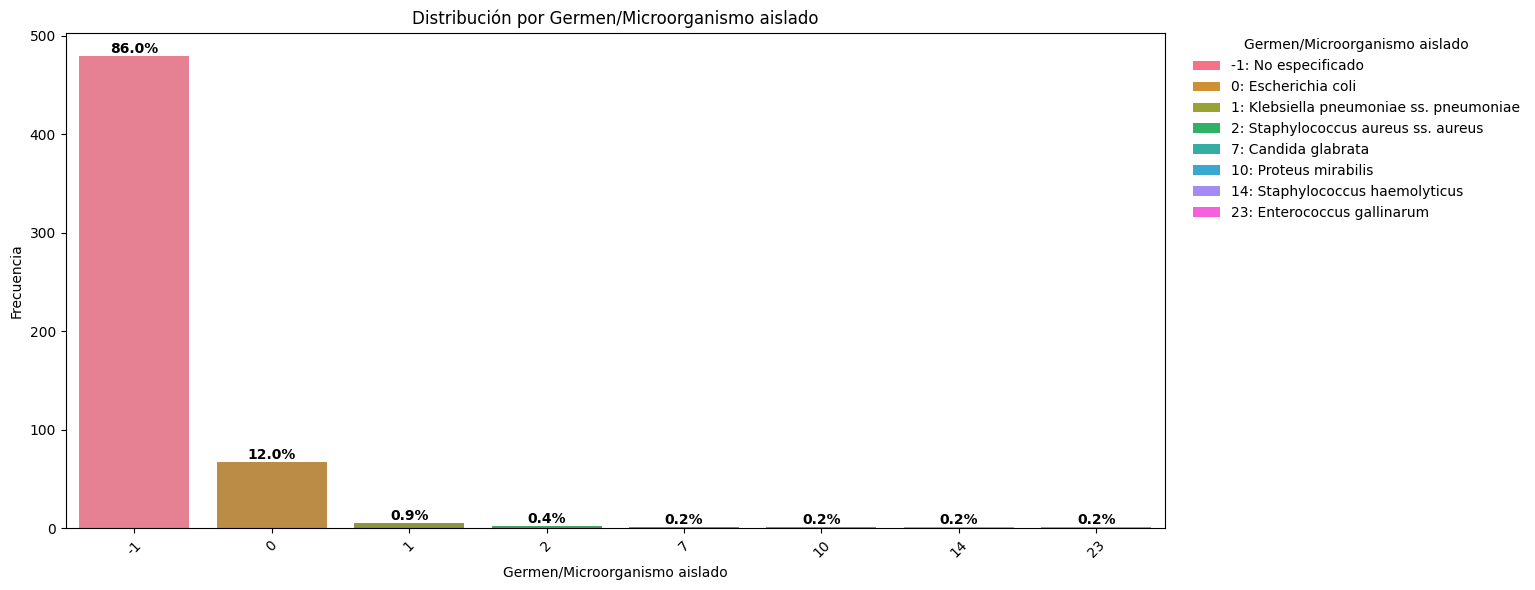

In [1130]:
graficar_var_categorica(df_clean, col, "Germen/Microorganismo aislado", show_legend=True)

#### ``Nutrición_Enteral``
DEFINE SI RECIBIÓ NUTRICIÓN ENTERAL

{'0': 'NO', '1': 'SI'}

In [1131]:
col = "Nutrición_Enteral"

In [1132]:
df[col].value_counts()

,count
Nutrición_Enteral,
0.0,514
1.0,40


In [1133]:
#Convertir a int y vacíos a -1
s = pd.to_numeric(df[col], errors='coerce').fillna(GENERAL_MISSING).astype(int).copy()
df_clean[col] = s.copy()
df_clean[col].value_counts()

,count
Nutrición_Enteral,
0,514
1,40
-1,3


Orden de categorías para 'Nutrición_Enteral': [-1, 0, 1]


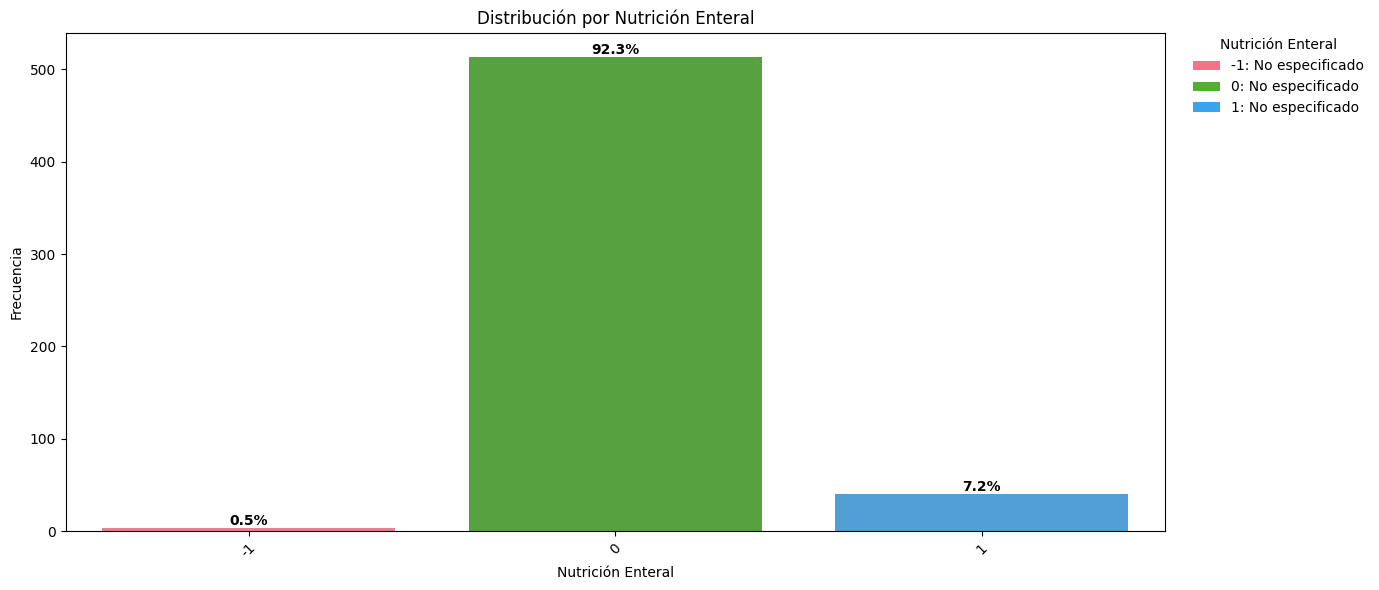

In [1134]:
graficar_var_categorica(df_clean, col, "Nutrición Enteral", show_legend=True)

#### ``Requerimiento_de_diálisis``
DEFINE SI RECIBIÓ DIÁLISIS POST OPERATORIA

{'0': 'NO', '1': 'SI'}

In [1135]:
col = "Requerimiento_de_diálisis"

In [1136]:
df[col].value_counts()

,count
Requerimiento_de_diálisis,
0,507
1,43
HEMODIALISIS,2
1 HEMO,1


In [1137]:
#Convertir a int y vacíos a -1

s = df[col].fillna(GENERAL_MISSING).copy()
# Las palabras HEMODIALISIS y HEMO indican que sí hubo diálisis
s.loc[~s.isin([0, 1, -1])] = 1
df_clean[col] = pd.to_numeric(s, errors='coerce').copy()
df_clean[col].value_counts()

,count
Requerimiento_de_diálisis,
0,507
1,46
-1,4


Orden de categorías para 'Requerimiento_de_diálisis': [-1, 0, 1]


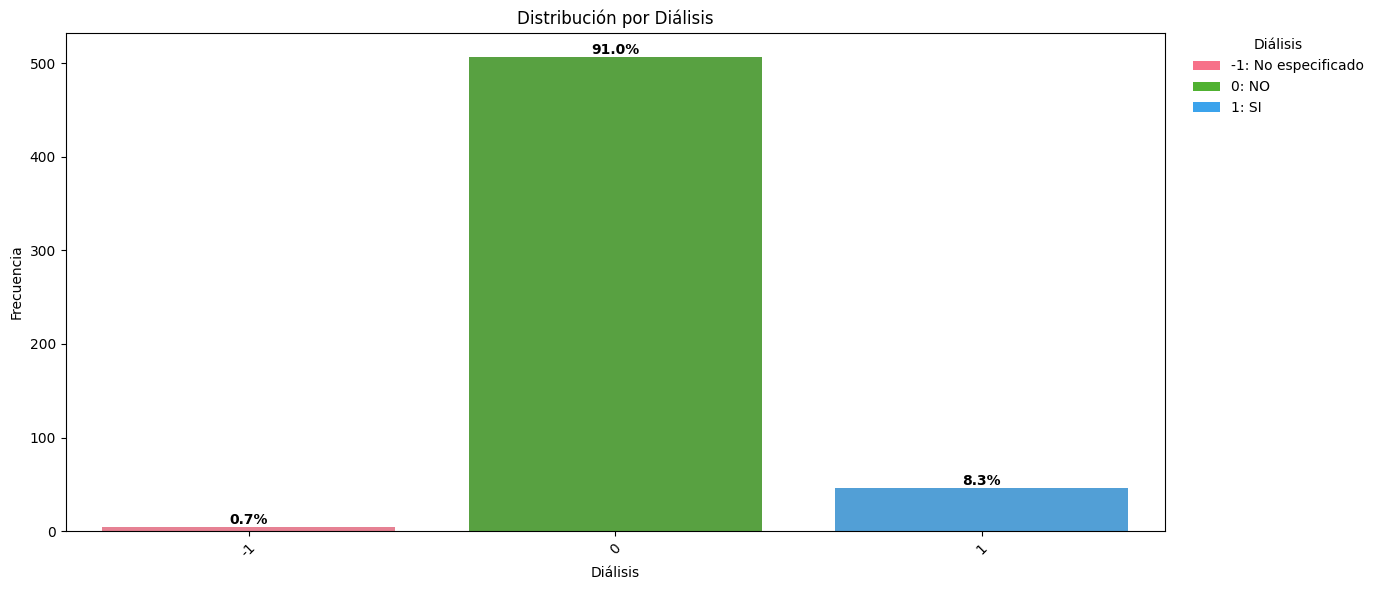

In [1138]:
graficar_var_categorica(df_clean, col, "Diálisis", show_legend=True)

#### ``Trasfusión_GRE_hasta_1m_POP``
DEFINE SI REQUIRIÓ TRASTUSIÓN POST OPERATORIA

{'0': 'NO', '1': 'SI'}

In [1139]:
col = "Trasfusión_GRE_hasta_1m_POP"
df[col].value_counts()

,count
Trasfusión_GRE_hasta_1m_POP,
0,507
1,10
4,7
2,6
3,4
7,2
8,2
13,2
5,1


El diccionario y el stakeholder nos indicó que la variable es binaria

In [1141]:
s = df[col].fillna(GENERAL_MISSING).copy()
# Las que son mayores a 1, pasarlas a 1
s.loc[~s.isin([0, 1, -1])] = 1
df_clean[col] = pd.to_numeric(s, errors='coerce').copy()
df_clean[col].value_counts()

,count
Trasfusión_GRE_hasta_1m_POP,
0,507
1,46
-1,4


Orden de categorías para 'Trasfusión_GRE_hasta_1m_POP': [-1, 0, 1]


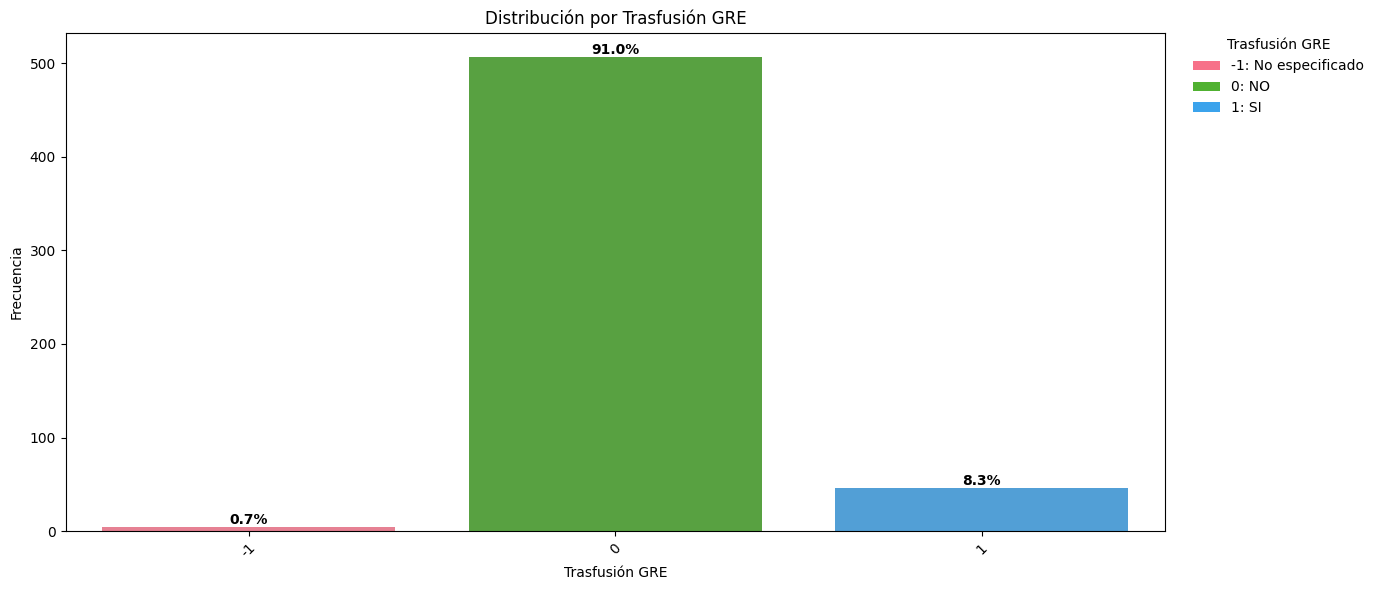

In [1142]:
graficar_var_categorica(df_clean, col, "Trasfusión GRE", show_legend=True)

#### ``Complicaciones_Técnicas``
Reporte en historia clínica de compliaciones técnicas: fuga biliar o trombosis arterial hepática

{'0': 'NO', '1': 'SI'}

In [1143]:
col = "Complicaciones_Técnicas"
df[col].value_counts()

,count
Complicaciones_Técnicas,
0,402
1,94
0 (cpre),41
0 (drenaje percutaneo),2
0 (cpre?),1
1 (reint + cpre),1
0 (drenaje de absceso cerebral - traqueo - cpre),1
0 (Traqueo perc),1
0 (tubo de torax),1


In [1144]:
s = df[col].fillna(GENERAL_MISSING).copy()
# Las que son texto, me indican que si hubo complicaciones técnicas
s.loc[~s.isin([0, 1, -1])] = 1
df_clean[col] = pd.to_numeric(s, errors='coerce').copy()
df_clean[col].value_counts()

,count
Complicaciones_Técnicas,
0,402
1,150
-1,5


Orden de categorías para 'Complicaciones_Técnicas': [-1, 0, 1]


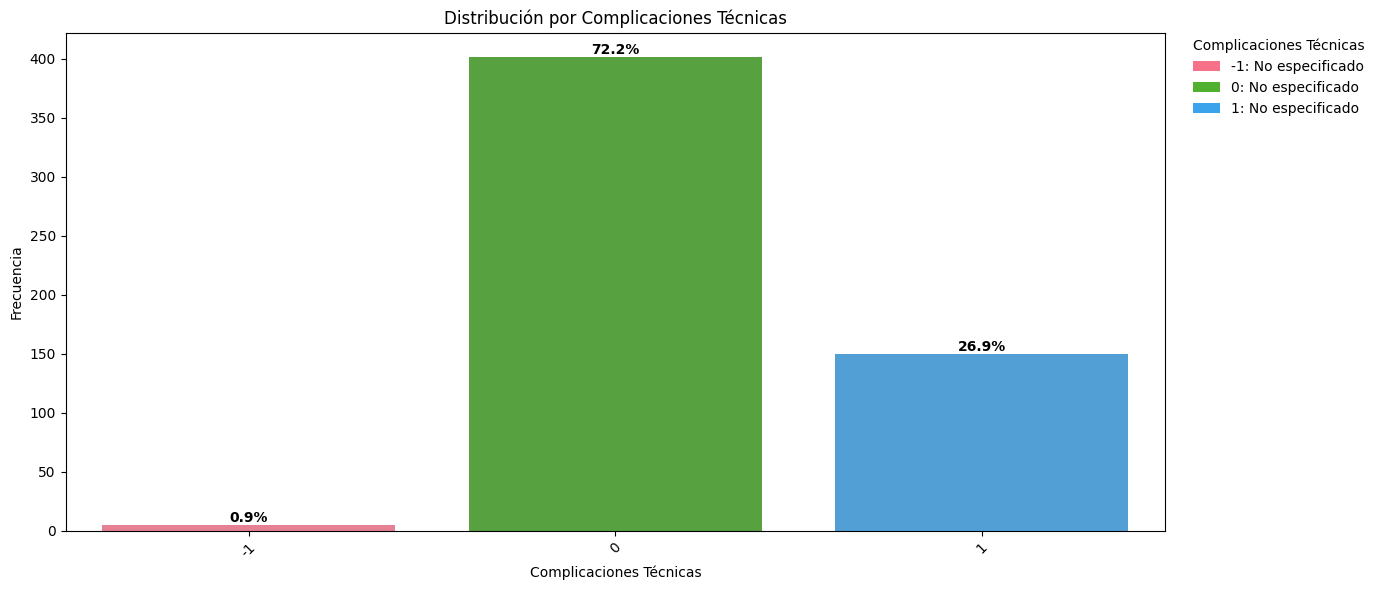

In [1145]:
graficar_var_categorica(df_clean, col, "Complicaciones Técnicas", show_legend=True)

#### ``Días_En_UCI_POP``
DÍAS EN UCI POST TRANSPLANTE

Numerica

In [1146]:
col = "Días_En_UCI_POP"
df[col].value_counts()

,count
Días_En_UCI_POP,
2,121
1,118
3,65
0,50
4,48
...,...
45386,1
3*,1
45488,1


In [1147]:
#Convertir a int y vacíos a -1
s = pd.to_numeric(df[col], errors='coerce').fillna(GENERAL_MISSING).astype(int).copy()
df_clean[col] = s.copy()
df_clean[col].value_counts()

,count
Días_En_UCI_POP,
2,121
1,118
3,65
0,50
4,48
...,...
45342,1
45386,1
45488,1


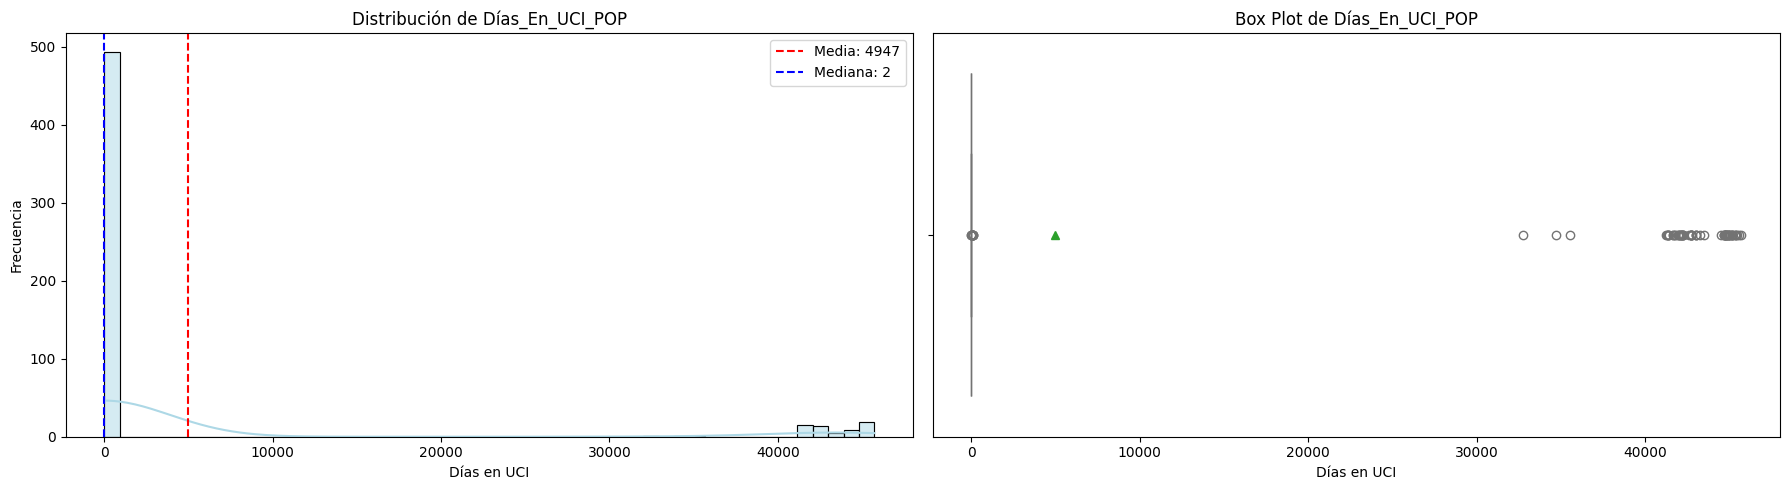

In [1148]:
graficar_var_numerica(df_clean, col, "Días en UCI")

#### ``Días_En_Hospitalización_Piso``
DÍAS EN PISO POST TRANSPLANTE

Numerica

In [1149]:
col = "Días_En_Hospitalización_Piso"
df[col].value_counts()

,count
Días_En_Hospitalización_Piso,
4.0,68
7.0,53
5.0,52
8.0,47
6.0,42
0.0,42
3.0,37
9.0,37
2.0,21


In [1150]:
#Convertir a int y vacíos a -1
s = pd.to_numeric(df[col], errors='coerce').fillna(GENERAL_MISSING).astype(int).copy()
df_clean[col] = s.copy()
df_clean[col].value_counts()

,count
Días_En_Hospitalización_Piso,
4,68
7,53
5,52
8,47
6,42
0,42
9,37
3,37
2,21


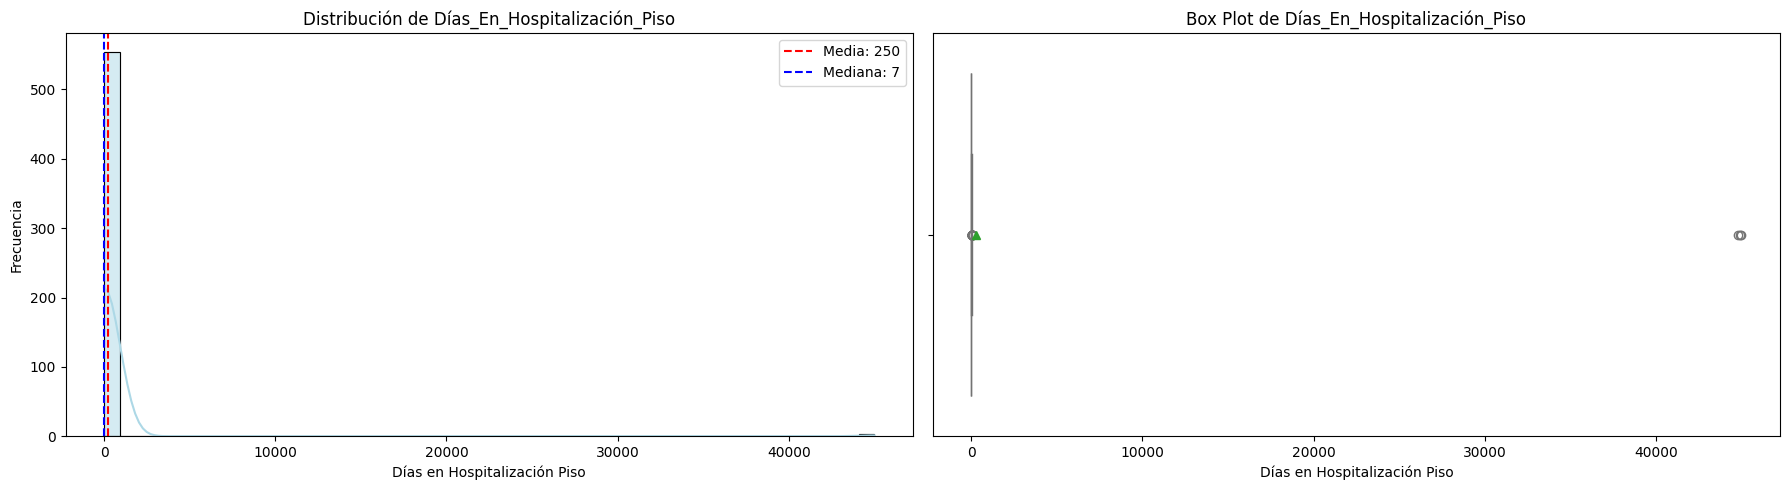

In [1151]:
graficar_var_numerica(df_clean, col, "Días en Hospitalización Piso")

#### ``Días_Totales_Intrahospitalarios``
DÍAS TOTALES POST TRANSPLANTE

Numerica

In [1152]:
col = "Días_Totales_Intrahospitalarios"
df[col].value_counts()

,count
Días_Totales_Intrahospitalarios,
6,45
7,43
8,38
9,38
10,36
...,...
35578,1
45540,1
45557,1


In [1153]:
#Convertir a int y vacíos a -1
s = pd.to_numeric(df[col], errors='coerce').fillna(GENERAL_MISSING).astype(int).copy()
df_clean[col] = s.copy()
df_clean[col].value_counts()

,count
Días_Totales_Intrahospitalarios,
6,45
7,43
9,38
8,38
10,36
...,...
35578,1
45540,1
45557,1


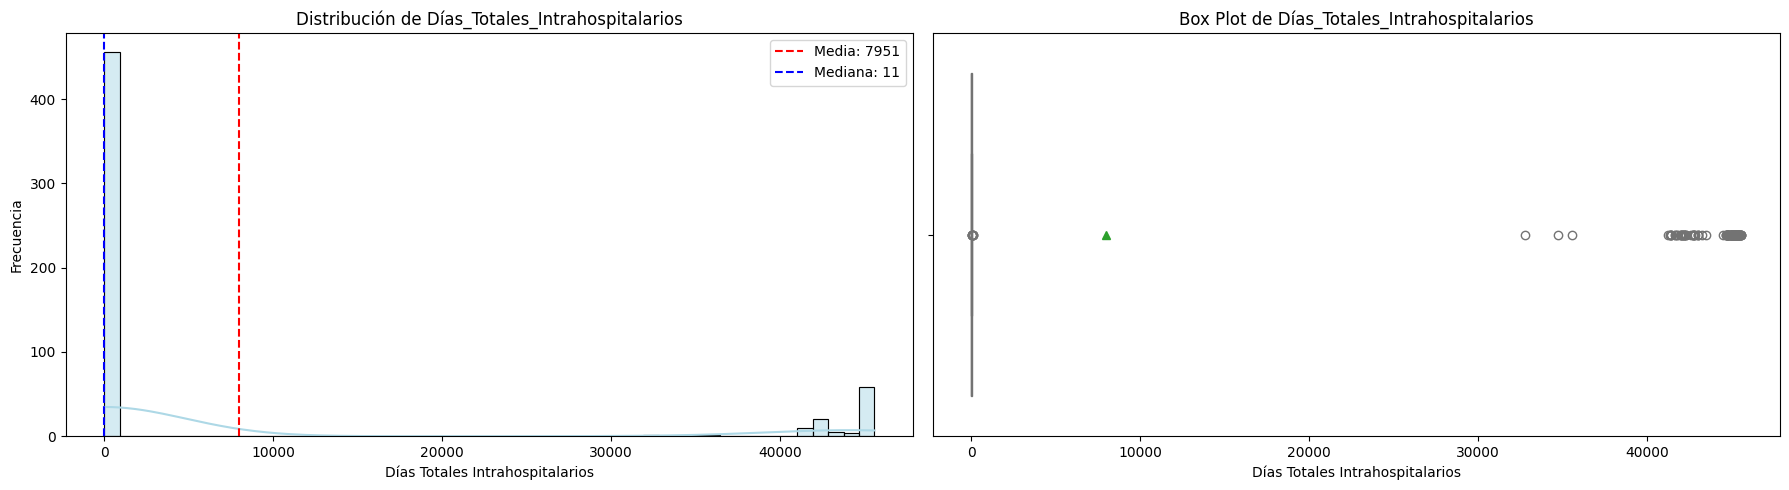

In [1154]:
graficar_var_numerica(df_clean, col, "Días Totales Intrahospitalarios")

#### ``Fecha_Egreso_UCI``
Fecha de egreso de la UCI
Date

In [1155]:
col = "Fecha_Egreso_UCI"
df[col].value_counts()

,count
Fecha_Egreso_UCI,
2010-07-12 00:00:00,2
2010-04-29 00:00:00,2
2010-09-22 00:00:00,2
2017-11-09 00:00:00,2
2009-10-24 00:00:00,1
...,...
2024-04-26 00:00:00,1
2024-05-25 00:00:00,1
2024-08-08 00:00:00,1


In [1156]:
df_clean.loc[:, col] = pd.to_datetime(df[col]).dt.date
df_clean[col].value_counts(dropna = False)

,count
Fecha_Egreso_UCI,
NaT,429
2010-07-12,2
2010-04-29,2
2010-09-22,2
2017-11-09,2
...,...
2024-04-26,1
2024-05-25,1
2024-08-08,1


#### ``Fecha_Egreso_Hospitalario``
Fecha de egreso hospitalización general

Date

In [941]:
col = "Fecha_Egreso_Hospitalario"
df[col].value_counts()

,count
Fecha_Egreso_Hospitalario,
2010-01-12 00:00:00,2
2009-07-16 00:00:00,2
2022-02-12 00:00:00,2
2017-11-10 00:00:00,2
2023-01-28 00:00:00,2
...,...
2024-08-08 00:00:00,1
2024-09-11 00:00:00,1
2024-09-27 00:00:00,1


In [942]:
df_clean.loc[:, col] = pd.to_datetime(df[col]).dt.date
df_clean[col].value_counts(dropna = False)

,count
Fecha_Egreso_Hospitalario,
NaT,369
2010-01-12,2
2009-07-16,2
2022-02-12,2
2017-11-10,2
...,...
2024-08-08,1
2024-09-11,1
2024-09-27,1


#### ``Retrasplante``
DEFINE SI REQUIRIÓ RETRANSPLANTE

{'0': 'NO', '1': 'SI'}

In [1158]:
col = "Retrasplante"
df[col].value_counts()

,count
Retrasplante,
0.0,513
1.0,42


In [1159]:
#Convertir a int y vacíos a -1
s = pd.to_numeric(df[col], errors='coerce').fillna(GENERAL_MISSING).astype(int).copy()
df_clean[col] = s.copy()
df_clean[col].value_counts()

,count
Retrasplante,
0,513
1,42
-1,2


Orden de categorías para 'Retrasplante': [-1, 0, 1]


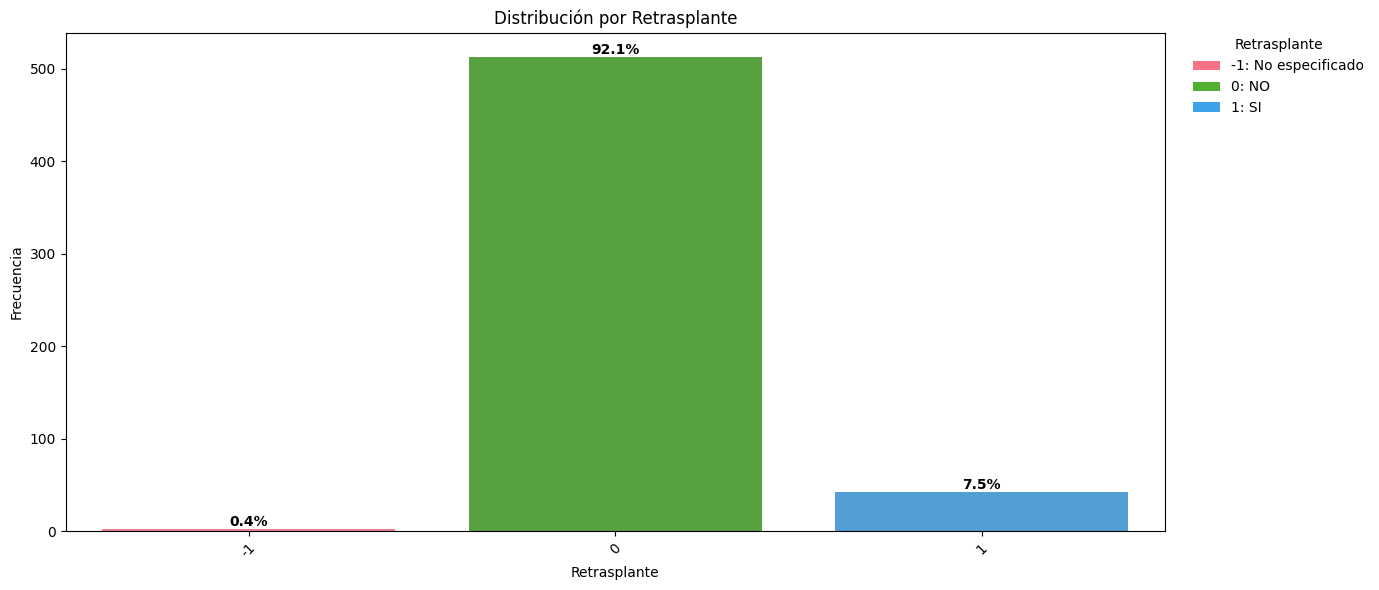

In [1160]:
graficar_var_categorica(df_clean, col, "Retrasplante", show_legend=True)

## Grupo 4 — Estancias globales, inmunosupresión y desenlaces
Inmunosupresor_1_Postx; Inmunosupresor_2_PostTx; Inmunosupresión_con_Anticuerpos; Inmunosupresor_1_1mesPostTx; Inmunosupresor_2_PostTx_1mesPx; Inmunosupresor_1_6mesesPostx; Inmunosupresor_2_6mesesPostTx; Vivo_Hoy; Fecha_Control/Muerte; SOBREVIDA_DIAS; SOBREVIDA_MESES; SOBREVIDA_AÑOS; Dias_Estancia_Hospitalaria; Días_Hospitalización_UCI.

In [945]:
estancias_globales = [
    "Inmunosupresor_1_Postx",
    "Inmunosupresor_2_PostTx",
    "Inmunosupresión_con_Anticuerpos",
    "Inmunosupresor_1_1mesPostTx",
    "Inmunosupresor_2_PostTx_1mesPx",
    "Inmunosupresor_1_6mesesPostx",
    "Inmunosupresor_2_6mesesPostTx",
    "Vivo_Hoy",
    "Fecha_Control/Muerte",
    "SOBREVIDA_DIAS",
    "SOBREVIDA_MESES",
    "SOBREVIDA_AÑOS",
    "Dias_Estancia_Hospitalaria",
    "Días_Hospitalización_UCI"
]

In [946]:
df_codebook.loc[estancias_globales]

,Description,Dtype,Choices,Var Type
Inmunosupresor_1_Postx,INMUNOSUPRESOR BASAL POST TRASPLANTE,object,"{'0': 'No', '1': 'CICLOSPORINA', '2': 'TACROLI...",Categorical
Inmunosupresor_2_PostTx,INMUNOSUPRESOR AÑADIDO POSTRASPLANTE,float64,"{'0': 'No', '1': 'MICOFENOLATO', '2': 'AZATIOP...",Categorical
Inmunosupresión_con_Anticuerpos,INMUNOSUPRESIÓN CON ANTICUERPOS RECOMBINADOS P...,float64,"{'0': 'No', '1': 'SIMULECT (BASILIXIMAB)', '2'...",Categorical
Inmunosupresor_1_1mesPostTx,INMUNOSUPRESOR BASAL 1 MES POST TX,float64,"{'0': 'No', '1': 'CICLOSPORINA', '2': 'TACROLI...",Categorical
Inmunosupresor_2_PostTx_1mesPx,INMUNOSUPRESOR AÑADIDO 1 MES POST TX,float64,"{'0': 'No', '1': 'MICOFENOLATO', '2': 'AZATIOP...",Categorical
Inmunosupresor_1_6mesesPostx,INMUNOSUPRESOR BASAL 6 MES POST TX,float64,"{'0': 'No', '1': 'CICLOSPORINA', '2': 'TACROLI...",Categorical
Inmunosupresor_2_6mesesPostTx,INMUNOSUPRESOR AÑADIDO 6 MES POST TX,float64,"{'0': 'No', '1': 'MICOFENOLATO', '2': 'AZATIOP...",Categorical
Vivo_Hoy,Define Si está vivo hoy,int64,"{'0': 'NO', '1': 'SI'}",Categorical
Fecha_Control/Muerte,Fecha de control/Muerte,int64,{},Numerical
SOBREVIDA_DIAS,Sobrevida en días post trasplante,int64,{},Numerical


#### ``Inmunosupresor_1_Postx``
INMUNOSUPRESOR BASAL POST TRASPLANTE

{'0': 'No', '1': 'CICLOSPORINA', '2': 'TACROLIMUS', '3': 'SIROLIMUS'}

In [947]:
df["Inmunosupresor_1_Postx"].value_counts(dropna=False)

,count
Inmunosupresor_1_Postx,
1,346
2,193
9999,11
0,4
3,1
/,1
NaN,1


In [948]:
s = df["Inmunosupresor_1_Postx"].copy()
# Identificar no aplica
mask = s.isin([9999])
s[mask] = NO_APLICA
# el resto de valores se castean a nan

df_clean["Inmunosupresor_1_Postx"] = pd.to_numeric(s, errors="coerce").astype("Int64")

In [949]:
df_clean["Inmunosupresor_1_Postx"].value_counts(dropna=False)

,count
Inmunosupresor_1_Postx,
1,346
2,193
<NA>,13
0,4
3,1


Orden de categorías para 'Inmunosupresor_1_Postx': [0, 1, 2, 3]


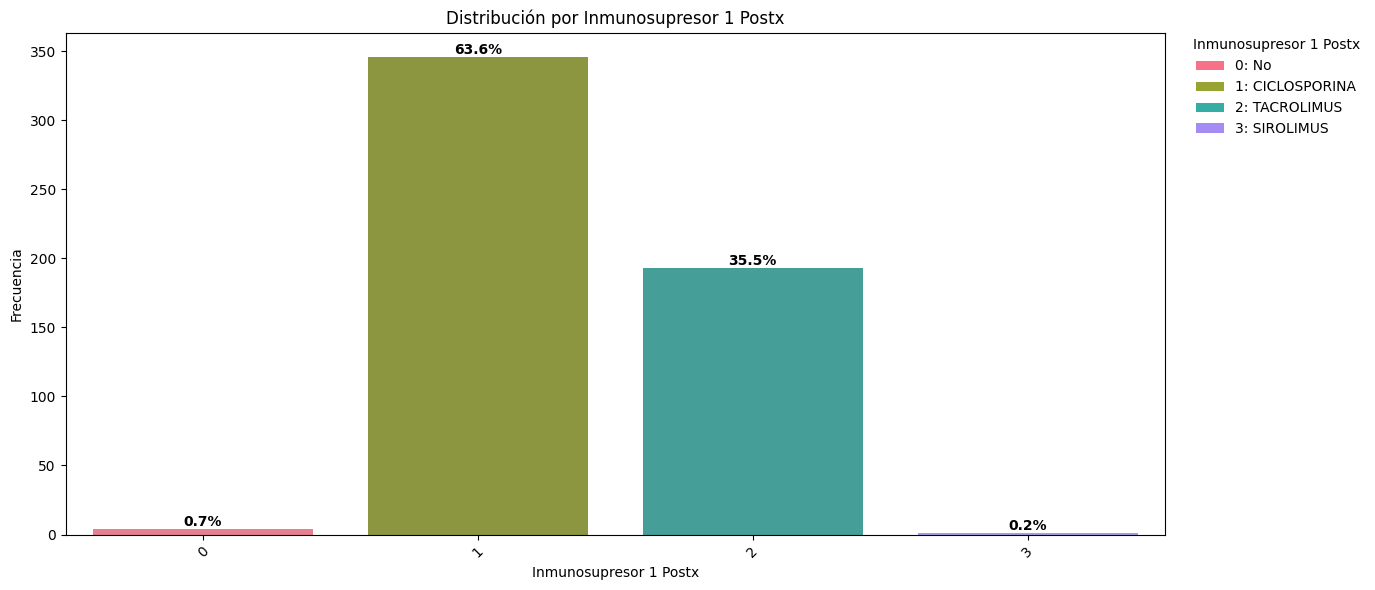

In [950]:
graficar_var_categorica(df_clean, "Inmunosupresor_1_Postx", "Inmunosupresor 1 Postx", show_legend=True)

#### ``Inmunosupresor_2_PostTx``
INMUNOSUPRESOR AÑADIDO POSTRASPLANTE

{'0': 'No', '1': 'MICOFENOLATO', '2': 'AZATIOPRINA'}

In [951]:
df["Inmunosupresor_2_PostTx"].value_counts(dropna=False).sort_index()

,count
Inmunosupresor_2_PostTx,
0.0,7
1.0,536
2.0,1
9999.0,11
NaN,2


In [952]:
s = df["Inmunosupresor_2_PostTx"].copy()
# Identificar no aplica
mask = s.isin([9999])
s = s.where(~mask, NO_APLICA)

# el resto de valores se castean a nan
s = pd.to_numeric(s, errors="coerce").astype("Int64")

df_clean["Inmunosupresor_2_PostTx"] = s.copy()

Orden de categorías para 'Inmunosupresor_2_PostTx': [0, 1, 2]


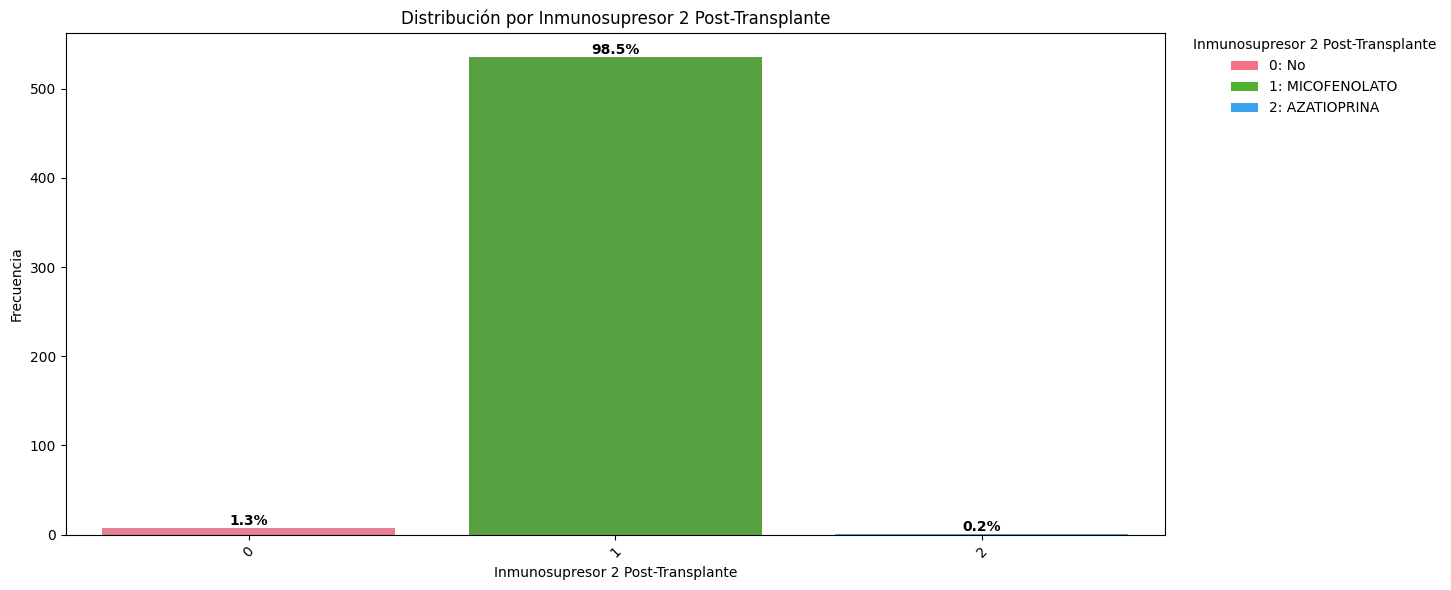

In [953]:
graficar_var_categorica(df_clean, "Inmunosupresor_2_PostTx", "Inmunosupresor 2 Post-Transplante", show_legend=True)

#### ``Inmunosupresión_con_Anticuerpos	``

INMUNOSUPRESIÓN CON ANTICUERPOS RECOMBINADOS POSTRASPLANTE

{'0': 'No', '1': 'SIMULECT (BASILIXIMAB)', '2': 'ZENAPAX (DACLIZUMAB)', '3': 'OKT3 (ORTHOCLONE)', '4': 'TIMOGLOBULINA'}	Categorical

In [954]:
df["Inmunosupresión_con_Anticuerpos"].value_counts(dropna=False)

,count
Inmunosupresión_con_Anticuerpos,
9999.0,360
0.0,171
1.0,19
NaN,7


In [955]:
s = df["Inmunosupresión_con_Anticuerpos"].copy()
mask_no_aplica = s.isin([9999.0])
s[mask_no_aplica] = NO_APLICA
s = pd.to_numeric(s, errors="coerce").astype("Int64")
df_clean["Inmunosupresión_con_Anticuerpos"] = s.copy()

Orden de categorías para 'Inmunosupresión_con_Anticuerpos': [0, 1]


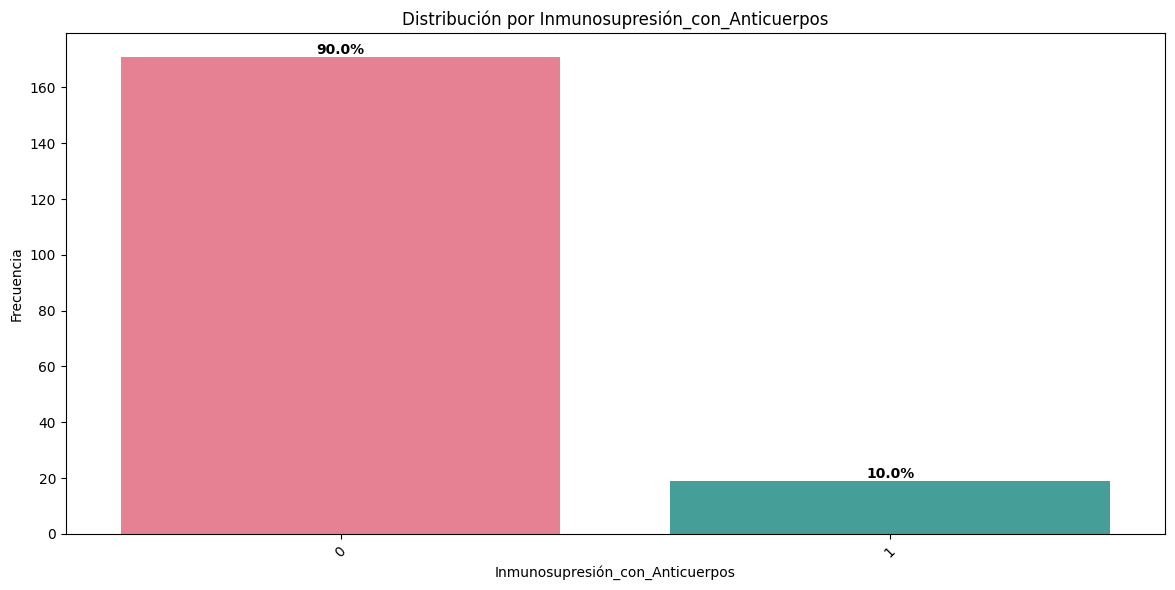

In [956]:
graficar_var_categorica(df_clean, "Inmunosupresión_con_Anticuerpos")

#### ``Inmunosupresor_1_1mesPostTx``

INMUNOSUPRESOR BASAL 1 MES POST TX

{'0': 'No', '1': 'CICLOSPORINA', '2': 'TACROLIMUS', '3': 'SIROLIMUS'}

In [957]:
df["Inmunosupresor_1_1mesPostTx"].value_counts(dropna=False)

,count
Inmunosupresor_1_1mesPostTx,
1.0,281
2.0,224
9999.0,33
0.0,10
NaN,8
3.0,1


In [958]:
s = df["Inmunosupresor_1_1mesPostTx"].copy()
mask_no_aplica = s.isin([9999.0])
s[mask_no_aplica] = NO_APLICA
s = pd.to_numeric(s, errors="coerce").astype("Int64")
df_clean["Inmunosupresor_1_1mesPostTx"] = s.copy()

Orden de categorías para 'Inmunosupresor_1_1mesPostTx': [0, 1, 2, 3]


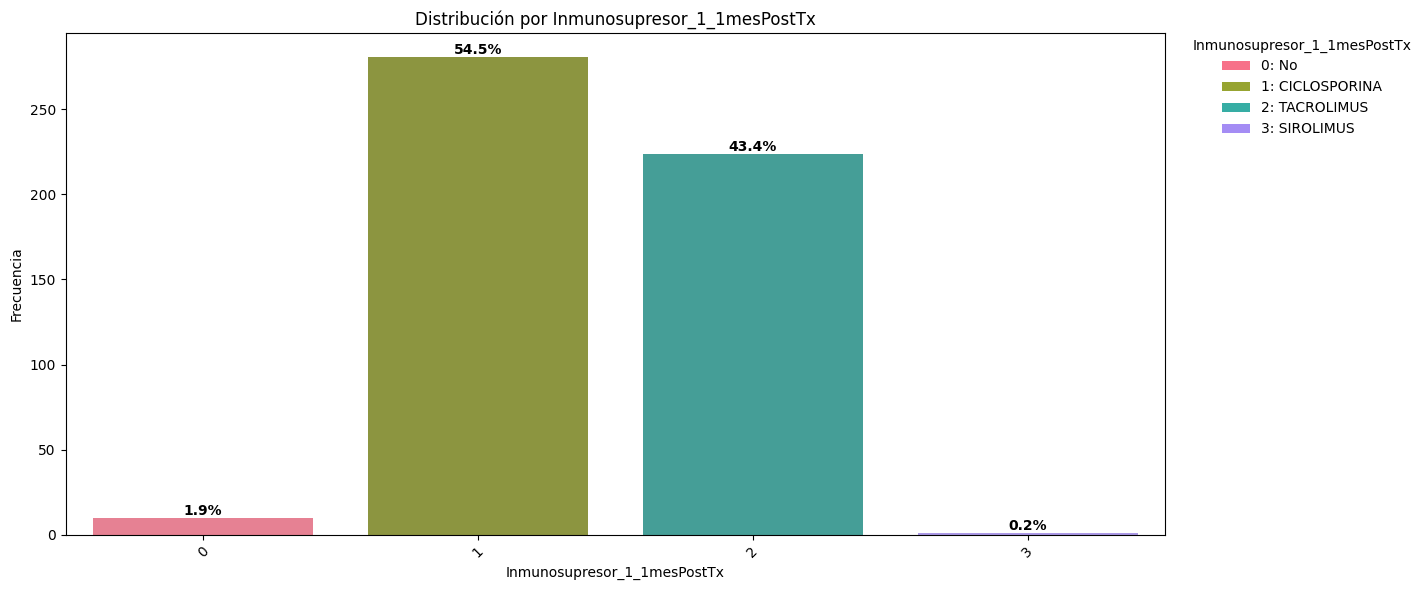

In [959]:
graficar_var_categorica(df_clean, "Inmunosupresor_1_1mesPostTx", show_legend=True)

#### ``Inmunosupresor_2_PostTx_1mesPx``

INMUNOSUPRESOR AÑADIDO 1 MES POST TX

{'0': 'No', '1': 'MICOFENOLATO', '2': 'AZATIOPRINA'}

In [960]:
df["Inmunosupresor_2_PostTx_1mesPx"].value_counts(dropna=False)

,count
Inmunosupresor_2_PostTx_1mesPx,
1.0,494
9999.0,33
0.0,22
NaN,8


In [961]:
s = df["Inmunosupresor_2_PostTx_1mesPx"].copy()
mask_no_aplica = s.isin([9999.0])
s[mask_no_aplica] = NO_APLICA
s = pd.to_numeric(s, errors="coerce").astype("Int64")
df_clean["Inmunosupresor_2_PostTx_1mesPPx"] = s.copy()

In [962]:
df_clean["Inmunosupresor_2_PostTx_1mesPPx"].value_counts(dropna=False)

,count
Inmunosupresor_2_PostTx_1mesPPx,
1,494
<NA>,41
0,22


Orden de categorías para 'Inmunosupresor_2_PostTx_1mesPPx': [0, 1]


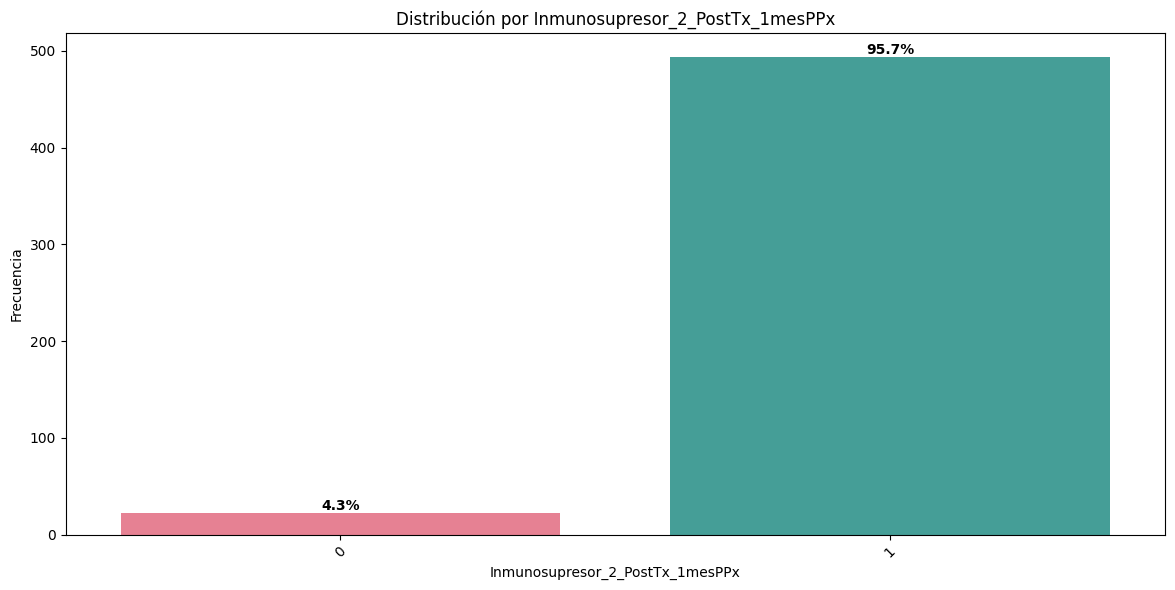

In [963]:
graficar_var_categorica(df_clean, "Inmunosupresor_2_PostTx_1mesPPx")

#### ``Inmunosupresor_1_6mesesPostx``

INMUNOSUPRESOR BASAL 6 MES POST TX

{'0': 'No', '1': 'CICLOSPORINA', '2': 'TACROLIMUS', '3': 'SIROLIMUS'}

In [964]:
df["Inmunosupresor_1_6mesesPostx"].value_counts(dropna=False)

,count
Inmunosupresor_1_6mesesPostx,
2.0,261
1.0,220
9999.0,56
NaN,11
3.0,5
0.0,4


In [965]:
s = df["Inmunosupresor_1_6mesesPostx"].copy()
mask_no_aplica = s.isin([9999.0])
s[mask_no_aplica] = NO_APLICA
s = pd.to_numeric(s, errors="coerce").astype("Int64")
df_clean["Inmunosupresor_1_6mesesPostx"] = s.copy()

Orden de categorías para 'Inmunosupresor_1_6mesesPostx': [0, 1, 2, 3]


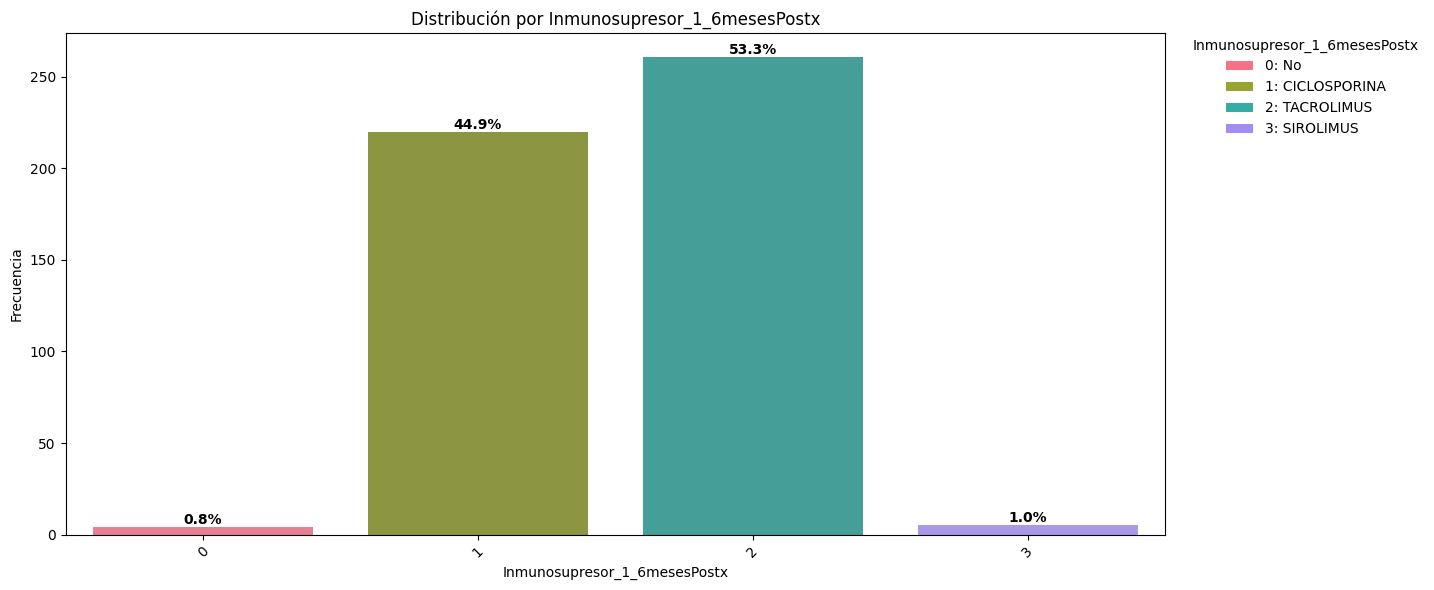

In [966]:
graficar_var_categorica(df_clean, "Inmunosupresor_1_6mesesPostx", show_legend=True)


#### ``Inmunosupresor_2_6mesesPostTx``

INMUNOSUPRESOR AÑADIDO 6 MES POST TX

{'0': 'No', '1': 'MICOFENOLATO', '2': 'AZATIOPRINA'}

In [967]:
df["Inmunosupresor_2_6mesesPostTx"].value_counts(dropna=False)

,count
Inmunosupresor_2_6mesesPostTx,
1.0,425
0.0,60
9999.0,57
NaN,11
2.0,4


In [968]:
s = df["Inmunosupresor_2_6mesesPostTx"].copy()
mask_no_aplica = s.isin([9999.0])
s[mask_no_aplica] = NO_APLICA
s = pd.to_numeric(s, errors="coerce").astype("Int64")
df_clean["Inmunosupresor_2_6mesesPostTx"] = s.copy()

In [969]:
df_clean["Inmunosupresor_2_6mesesPostTx"].value_counts(dropna=False)

,count
Inmunosupresor_2_6mesesPostTx,
1,425
<NA>,68
0,60
2,4


Orden de categorías para 'Inmunosupresor_2_6mesesPostTx': [0, 1, 2]


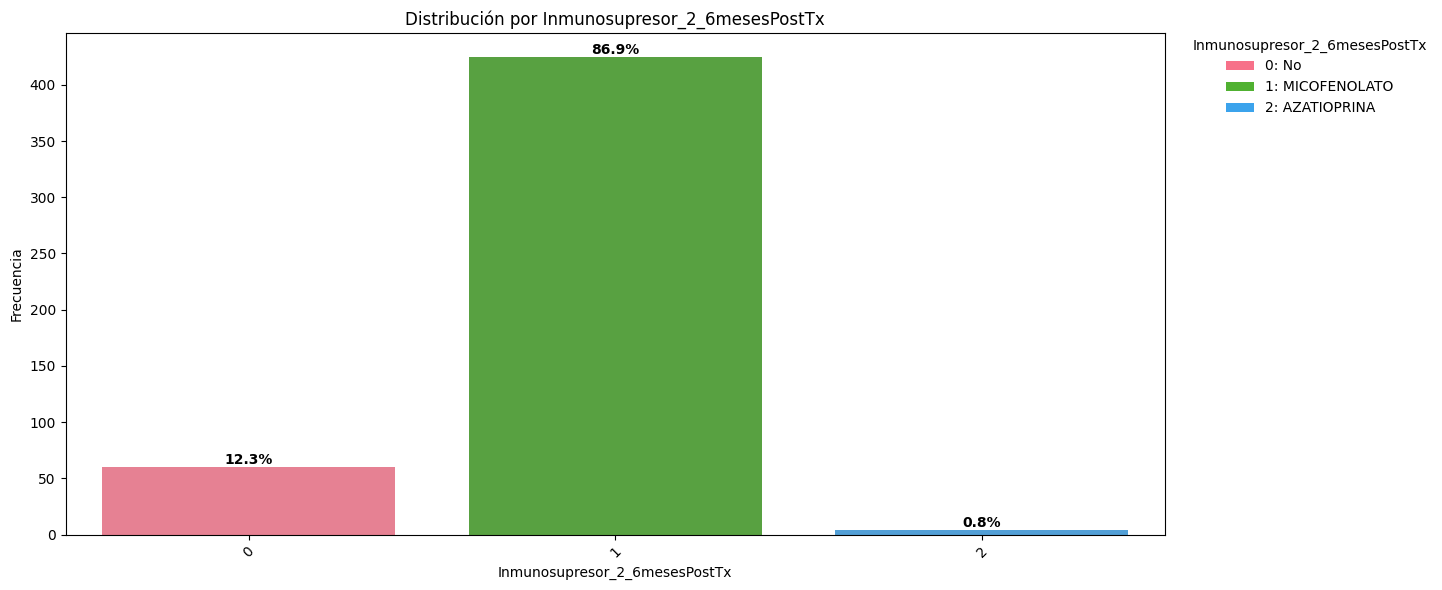

In [970]:
graficar_var_categorica(df_clean, "Inmunosupresor_2_6mesesPostTx", show_legend=True)

``Vivo_Hoy``

Define Si está vivo hoy

{'0': 'NO', '1': 'SI'}


In [971]:
df["Vivo_Hoy"].value_counts(dropna=False)

,count
Vivo_Hoy,
1,395
0,162


Orden de categorías para 'Vivo_Hoy': [0, 1]


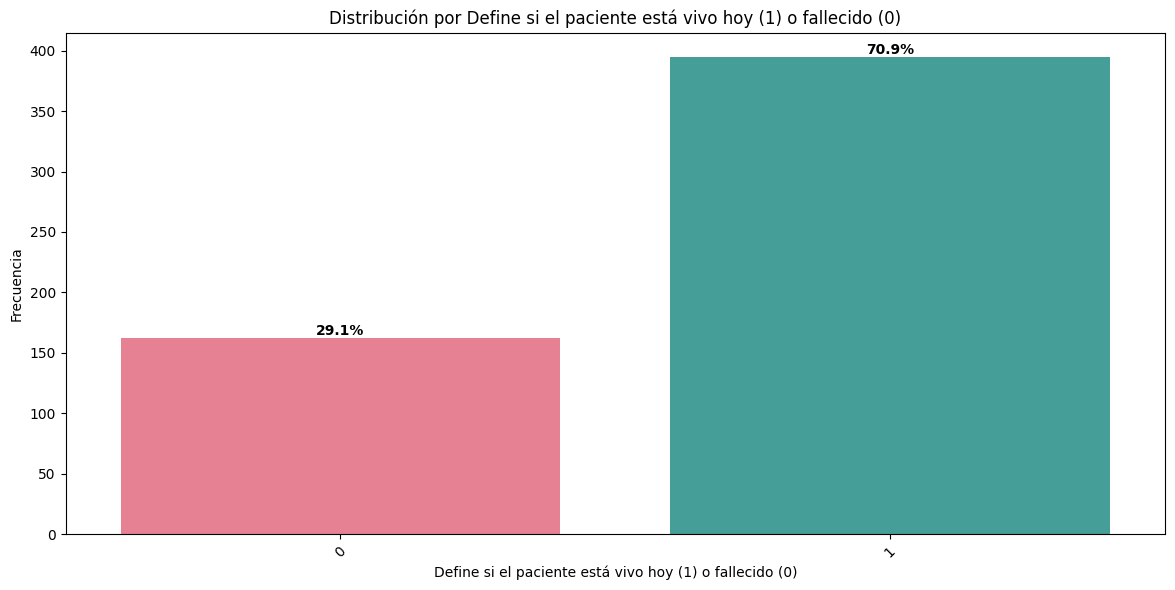

In [972]:
graficar_var_categorica(df_clean, "Vivo_Hoy", "Define si el paciente está vivo hoy (1) o fallecido (0)")

#### ``Fecha_Control/Muerte``


In [973]:
df["Fecha_Control/Muerte"].isna().sum()

np.int64(0)

In [974]:
df["Fecha_Control/Muerte"].value_counts(dropna=False)

,count
Fecha_Control/Muerte,
45291,314
45790,4
45735,3
45743,3
45741,3
...,...
45772,1
45779,1
45556,1


In [975]:
df_clean["Fecha_Control/Muerte"] = pd.to_datetime(df["Fecha_Control/Muerte"]).dt.date

``SOBREVIDA_DIAS``

Sobrevida en días post trasplante

In [976]:
df["SOBREVIDA_DIAS"].value_counts(dropna=False)

,count
SOBREVIDA_DIAS,
1,9
5,5
13,3
7,3
3,3
...,...
3736,1
1566,1
3790,1


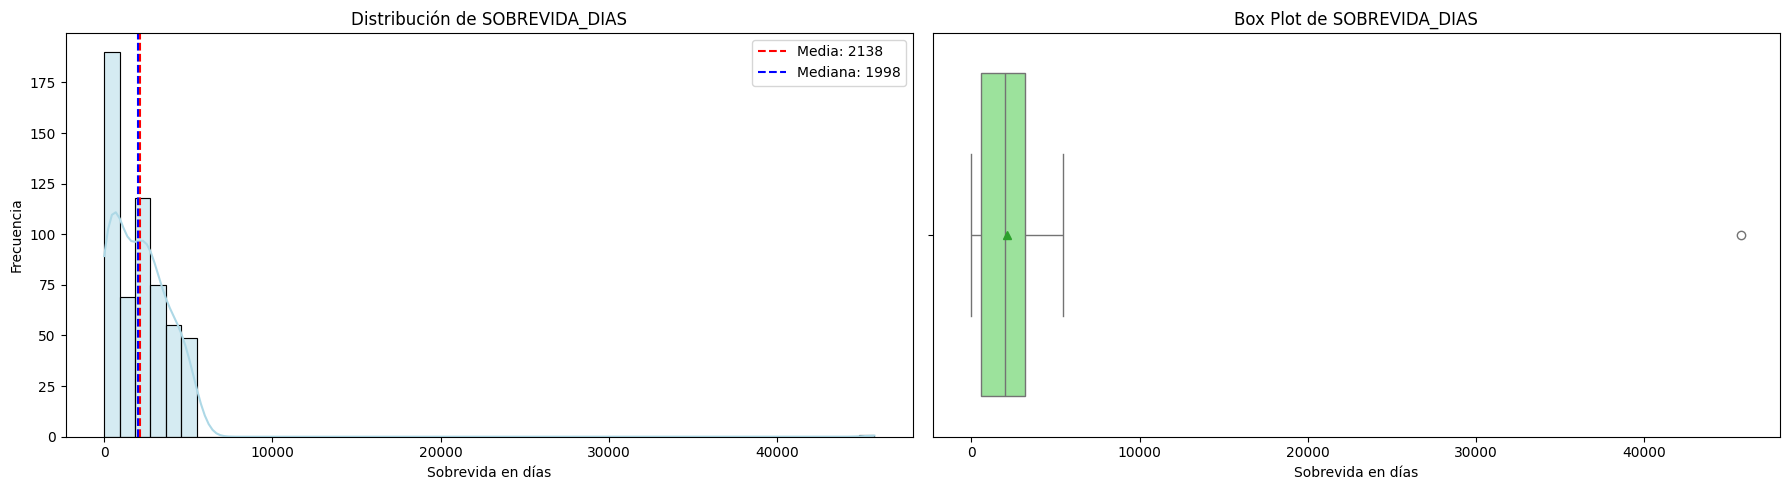

In [977]:
graficar_var_numerica(df_clean, "SOBREVIDA_DIAS", "Sobrevida en días")

#### ``SOBREVIDA_MESES``

Sobrevida en meses post trasplante

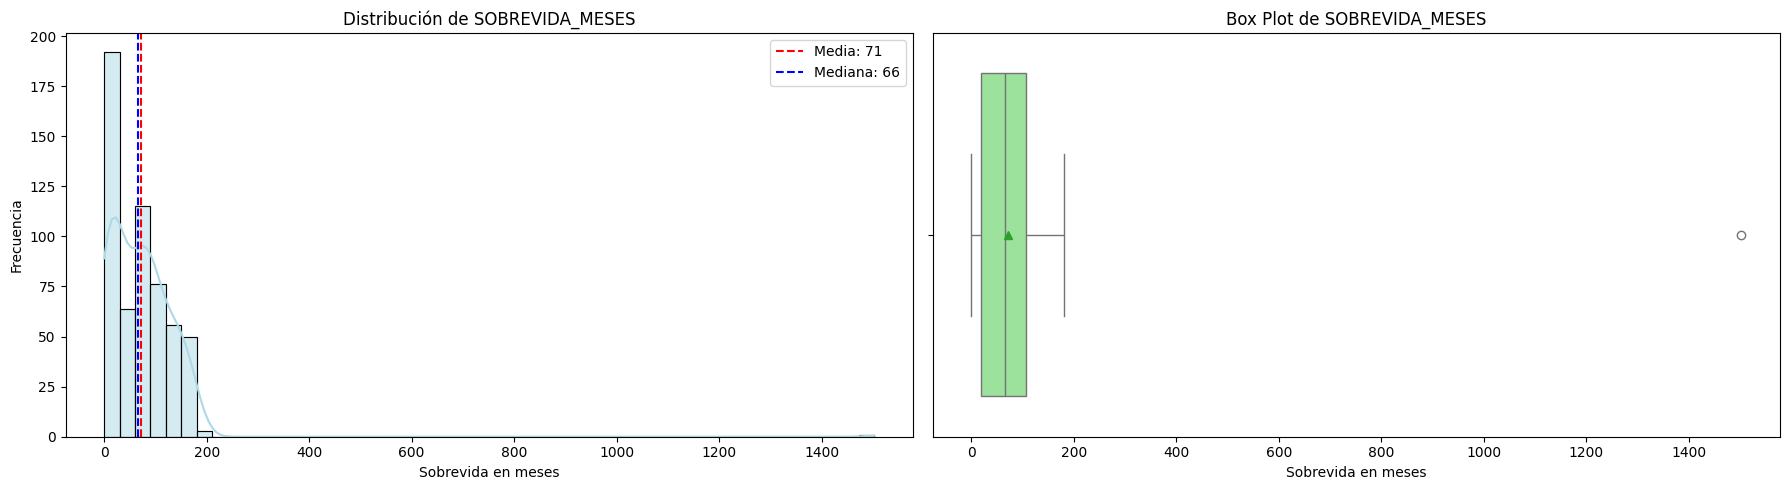

In [978]:
graficar_var_numerica(df_clean, "SOBREVIDA_MESES", "Sobrevida en meses")

#### ``SOBREVIDA_AÑOS``

Sobrevida en años post trasplante

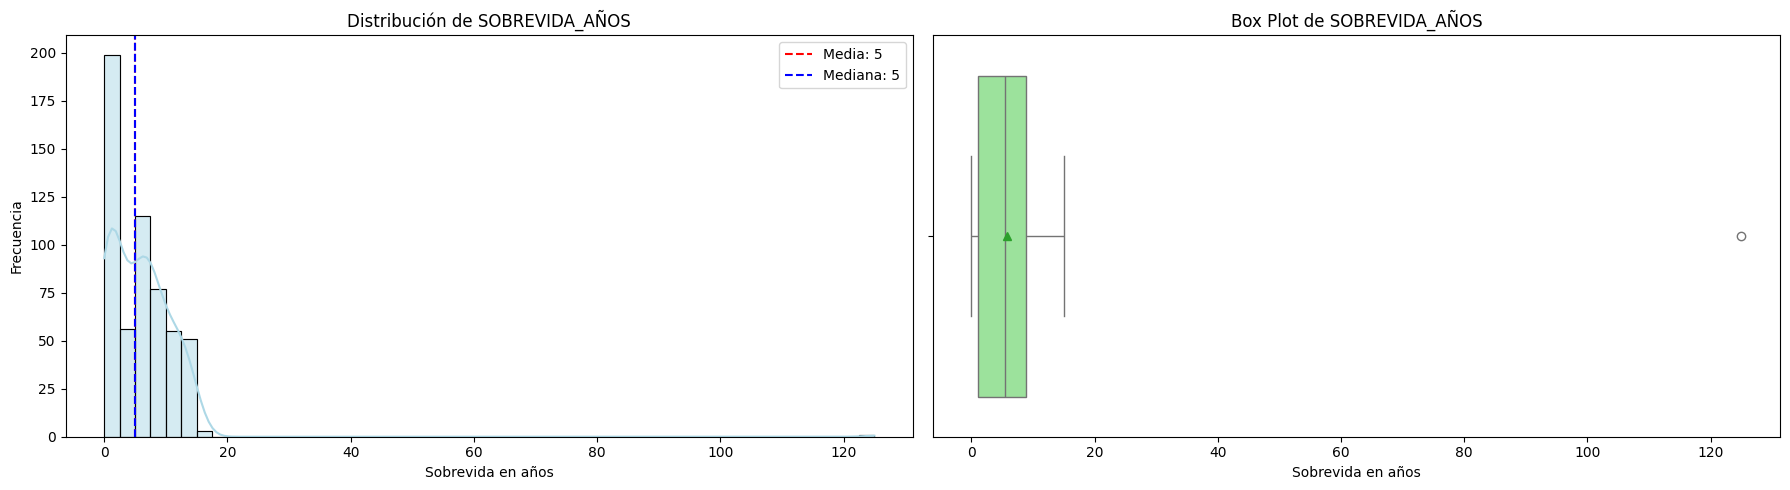

In [979]:
graficar_var_numerica(df_clean, "SOBREVIDA_AÑOS", "Sobrevida en años")

#### ``Dias_Estancia_Hospitalaria``

Días totales de hospitalización

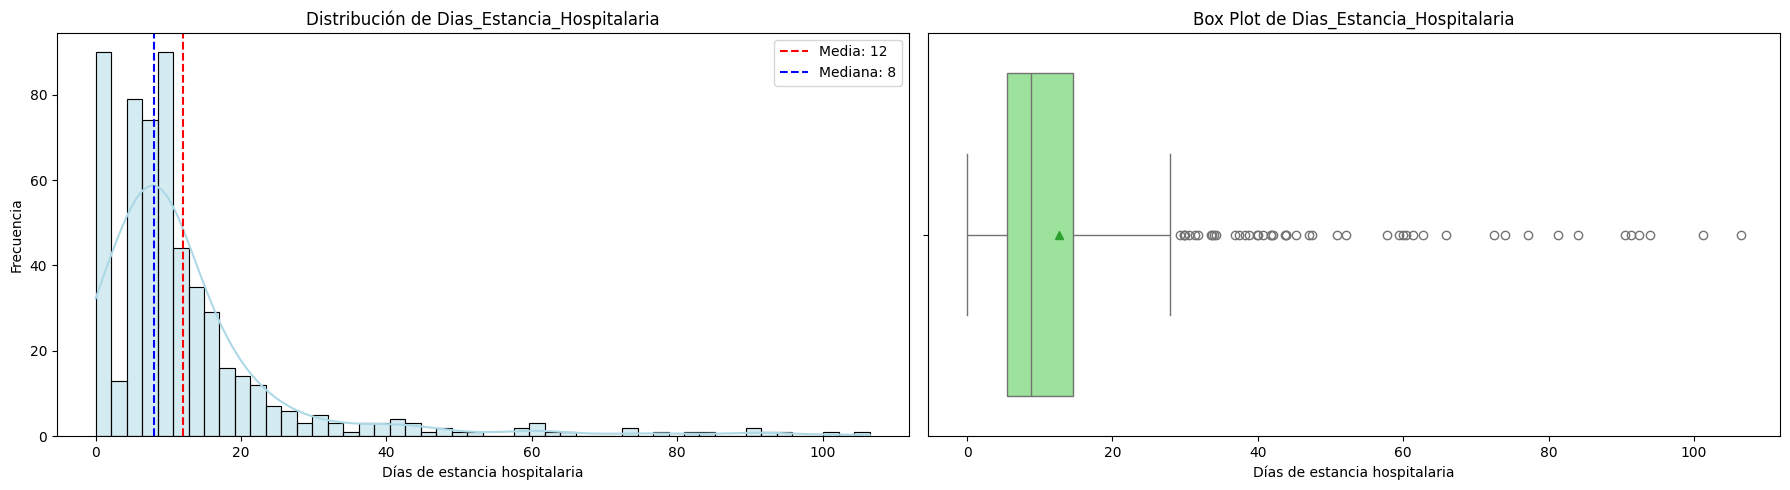

In [980]:
graficar_var_numerica(df_clean, "Dias_Estancia_Hospitalaria", "Días de estancia hospitalaria")

#### ``Días_Hospitalización_UCI``

Días totales de hospitalización en UCI

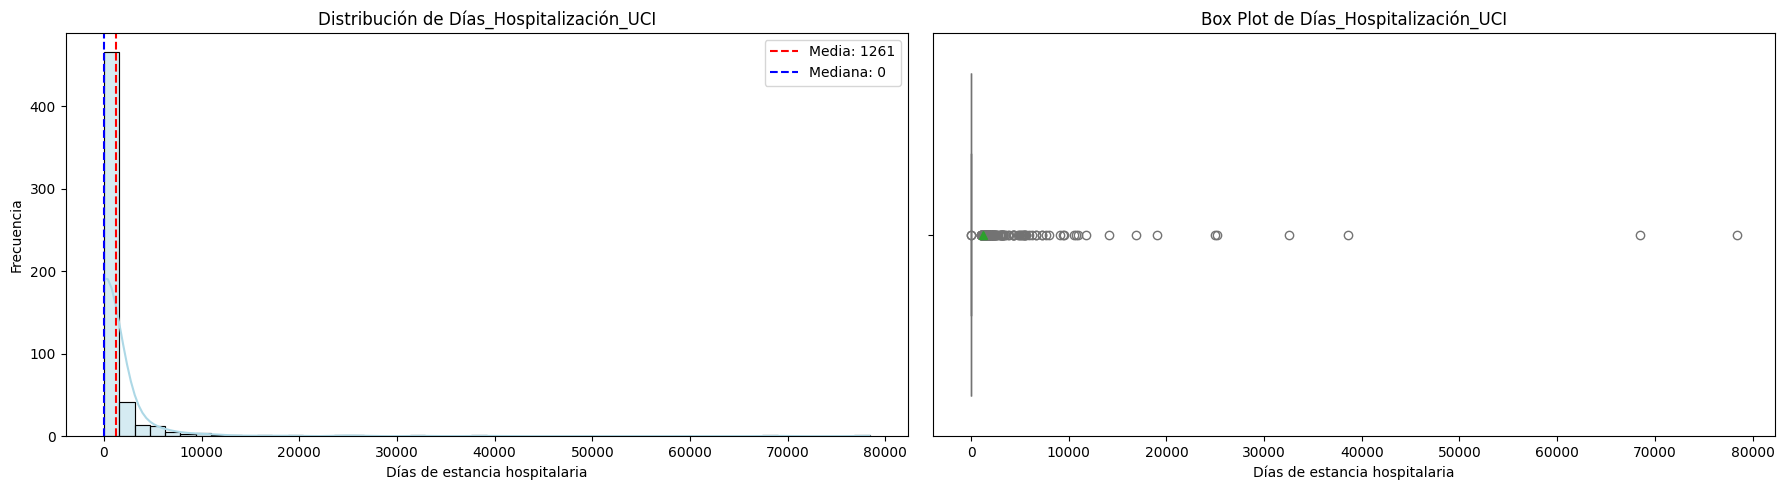

In [981]:
graficar_var_numerica(df_clean, "Días_Hospitalización_UCI", "Días de estancia hospitalaria")

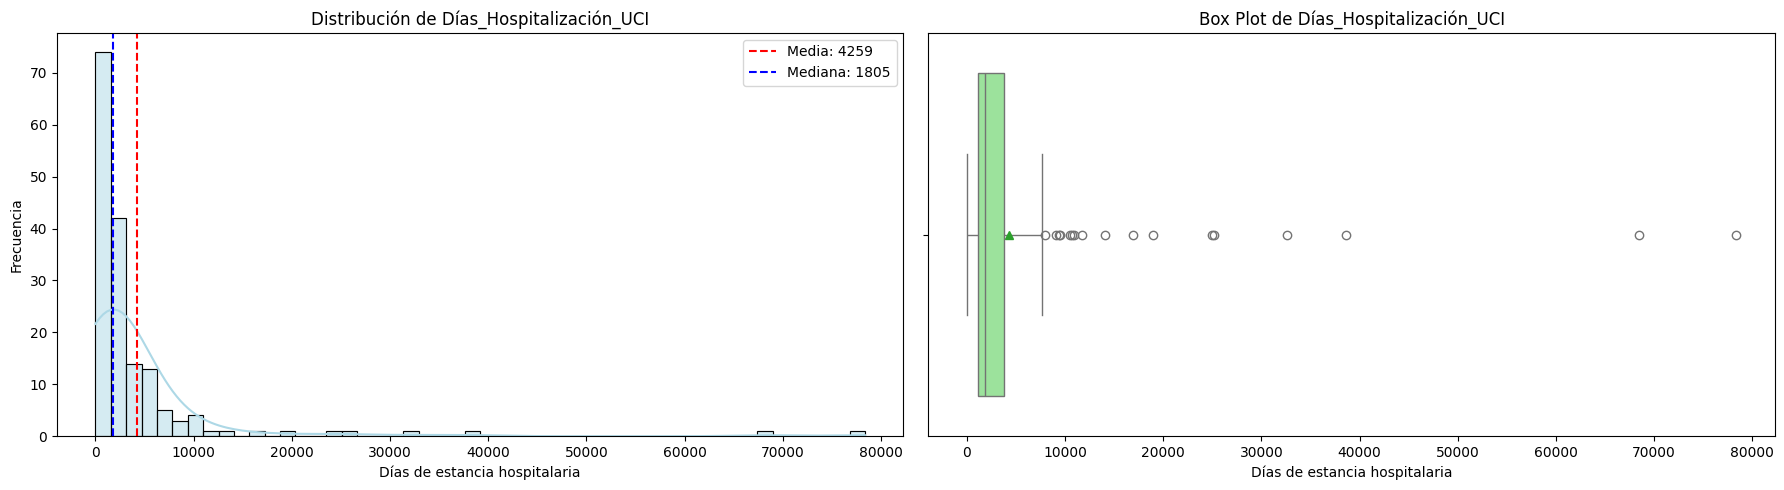

In [982]:
graficar_var_numerica(df_clean[df_clean["Días_Hospitalización_UCI"] > 0], "Días_Hospitalización_UCI", "Días de estancia hospitalaria")

# Guardar versión limpia

In [983]:
df_clean.to_csv("/content/Base_infecciones_POPTH_limpia.csv", index=False)

In [984]:
df_clean.dtypes.value_counts()

,count
int64,23
float64,16
Int64,15
object,6
datetime64[ns],1
category,1
int32,1


In [989]:
df_clean.isna().sum().sort_values(ascending=False)

,0
Fecha_Egreso_UCI,429
Child_Pugh_Score,405
Child_Pugh_Score_Cat,399
Fecha_Egreso_Hospitalario,369
Inmunosupresión_con_Anticuerpos,367
...,...
Fecha_Control/Muerte,0
SOBREVIDA_MESES,0
SOBREVIDA_DIAS,0
SOBREVIDA_AÑOS,0


In [986]:
demograficas = ['#Paciente_Tx', 'Edad', 'Sexo', "Fecha_Tx", 'Etiología_#1', 'Etiología_#2', 'Meld_Score', 'Diabetes_Mellitus', 'Tabaquismo', 'Alcoholismo', 'IMC', "Peso_previo_Cx"]
otras = ["Tipo_Reconstrucción_Biliar", "Dias_Estancia_Hospitalaria", "Retrasplante"]
infeccion = ['Infección_Al_Momento_Tx', "Antibiótico_Profiláctico_VS_Terapéutico", "Antibiotico_previo_al_Tx"]
columnas_de_interes = demograficas + infeccion + otras

# Filtrar columnas con menos de 130 valores nulos
columnas_de_interes = df_clean.columns[df_clean.isna().sum() < 130]


In [987]:
df_temp = df_clean.dropna(subset = columnas_de_interes)
df_temp[columnas_de_interes]

,#Paciente_Tx,Año_Tx,Fecha_Tx,Código anonimizado,Edad,Sexo,Etiología_#1,Etiología_#2,Meld_Score,Diabetes_Mellitus,...,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx,Vivo_Hoy,Fecha_Control/Muerte,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS,Mes_Tx,Inmunosupresor_2_PostTx_1mesPPx
8,9,2009,2009-03-08,P009,66,2,10,0,16.0,0,...,1.0,1,1,0,1970-01-01,2849,94.97,7.91,3,1
15,16,2009,2009-04-29,P016,51,1,10,0,22.0,1,...,1.0,1,1,0,1970-01-01,1929,64.30,5.36,4,1
18,19,2009,2009-06-04,P019,72,1,3,0,14.0,0,...,1.0,1,1,1,1970-01-01,5323,177.43,14.79,6,1
19,20,2009,2009-06-10,P020,57,2,1,0,13.0,0,...,1.0,0,0,0,1970-01-01,253,8.43,0.70,6,1
20,21,2009,2009-06-23,P021,54,1,4,0,22.0,1,...,1.0,1,0,0,1970-01-01,290,9.67,0.81,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,472,2022,2022-03-28,P472,57,2,11,0,28.0,1,...,1.0,2,1,1,1970-01-01,588,19.00,1.00,3,1
472,473,2022,2022-04-07,P473,52,2,11,9,26.0,0,...,1.0,2,1,1,1970-01-01,346,11.00,0.00,4,1
479,480,2022,2022-06-25,P480,49,2,9,0,22.0,0,...,1.0,2,1,1,1970-01-01,995,32.00,2.00,6,1
528,529,2023,2023-11-04,P529,63,2,3,0,22.0,1,...,1.0,2,1,1,1970-01-01,13,0.00,0.00,11,1


In [988]:
df_codebook_new["Dtype"] = df_codebook_new["Column"].map(df_clean.dtypes.astype(str))
# guardar el nuevo diccionario de datos como un archivo JSON
with open(CODEBOOK_PATH, "w", encoding="utf-8") as f:
    json.dump(df_codebook_new.set_index("Column").to_dict(orient="index"), f, ensure_ascii=False, indent=3)